 ### todos


 **general todos**

 [ ] eventually fix the paths for anyone not running this from src directory (remove ...)



 [x] map setup numbers to better names for all plots



 [x] traverse setup folders and concat dfs



 [x] do some significance tests based on results_df



 [ ] combine ALL the run results and do a regression with a lot more parameters!



 **Plots I want this to work on**

 [ ] Time plot?



 [x] Fitness_plot



     [ ] comparing best vs. avg vs best species (needs to be only done once)



 [x] Total components?



 [x] Unique components per generation



 [x] Mutation boxplot effects



 [x] fitness Metrics plots



 [ ] best genome mutation analysis



 [x] Mutation lineplots



 [x] Average metrics?



 [ ] Number species



 [x] Spawn rank histogram



 [x] Scatterplot



 **Do not forget about single-run plots, they should also be in here**

 [ ] best genome lineage



 [ ] species leaders??



 [ ] species stackplot



 [ ] species tree



 [ ] species ridgeline



 [ ] species average fitnesses



 [ ] fitness scatterplot (as implemented in look_at_dfs) - can only do that for one run



 **Other analysis implemented someplace else**

 [ ] ... check the onenote



 **Interesting one-off analysis**

 [ ] Mutation lineage for a selected run



 [ ] Component similarity drift



 [ ] Fitness of components plotting



     - Look at the components in the fittest genome at the end, plot their t-values obtained from the component dict over the generations



 **Those can only be copied from a run**

 [ ] improvements (combine them into something)



 [ ] species leaders??

# Parameters for the analysis file

In [20]:
analysis_plot_fp = "C:/Users/pauls/Documents/GitHubRepos/GeneticPetriNetsThesis/diagrams/analysis_plots/"

 # Selection Strategies

 In this notebook, I will track all the plots used in the Thesis.



 The first step will be evaluating individual selection strategies, with the goal of determining appropriate parameter settings for each selection strategy before comparing the selection strategies against one another.



 For those initial comparisons, I will be sticking to the `running_example.xes` log, but bigger logs will be compared.



 ## Selection strategy - truncation

 First off, analyzing the truncation selection strategy



 The Data is from a run with the following parameter permutations

 * `spawn_cutoff`: 0.1, 0.25, 0.5, 0.75

 * `pop_perc_elite`: 0.01, 0.05

 * `pop_perc_crossover`: 0.0, 0.1, 0.2, 0.3, 0.4



 ### Regression on truncation parameters

 Probably the most influental parameter, it should directly expose the trade-offs of diversity vs. focus during the search. I.e. trading faster convergence for a narrower search. `spawn_cutoff` determines which portion of the population will be moved into the next.



 For every parameter change, all the other parameter changes are also tested, resulting in a total of `4*2*5 = 40` setups. That also means that The spawn cutoff was tested with all `pop_perc_elite` and `pop_perc_crossover` settings. Each setup was run 20 times.



 I did not run a test with 0% elitism. Usually elitism is crucial to ensuring that the best mutations cannot possibly get lost in the unlikely event of not being selected for the next generation. This event cannot occur in truncation selection, as the selection function simply iterates the population in descending order to spawn offspring. However - elitism is definitely crucial for speciation selection; and while extremely unlikely - roulette selection could also in theory loose the best genome in one generation by not selecting it as a parent. To ensure that I can easily compare my results and reduce the number of possible setups, I did not test truncation without elitism.



 To investigate the hypothesis that spawn cutoff has the largest effect on achieved diversity, I rely on the num_components metric which was calculated for every run, as well as the highest achieved fitness and do a regression for both of those target variables. Predictors are the params that were changed, i.e. spawn cutoff, % elite spawns and % crossover spawns.

In [1]:
from importlib import reload # TODO: remove this later
import scripts.helper_scripts.setup_analysis as sa # helper module for fetching setup analysis
# crawl the results data and load it into a dict
res = sa.exec_results_crawler("../analysis/data/truncation_test")


Processing setup directories: 11it [00:00, 101.80it/s]


Found cached results for setup_1
Successfully loaded cached results for setup_1

Found cached results for setup_10
Successfully loaded cached results for setup_10

Found cached results for setup_11
Successfully loaded cached results for setup_11

Found cached results for setup_12
Successfully loaded cached results for setup_12

Found cached results for setup_13
Successfully loaded cached results for setup_13

Found cached results for setup_14
Successfully loaded cached results for setup_14

Found cached results for setup_15
Successfully loaded cached results for setup_15

Found cached results for setup_16
Successfully loaded cached results for setup_16

Found cached results for setup_17
Successfully loaded cached results for setup_17

Found cached results for setup_18
Successfully loaded cached results for setup_18

Found cached results for setup_19
Successfully loaded cached results for setup_19

Found cached results for setup_2
Successfully loaded cached results for setup_2

Found c

Processing setup directories: 31it [00:00, 78.13it/s] 

Successfully loaded cached results for setup_23

Found cached results for setup_24
Successfully loaded cached results for setup_24

Found cached results for setup_25
Successfully loaded cached results for setup_25

Found cached results for setup_26
Successfully loaded cached results for setup_26

Found cached results for setup_27
Successfully loaded cached results for setup_27

Found cached results for setup_28
Successfully loaded cached results for setup_28

Found cached results for setup_29
Successfully loaded cached results for setup_29

Found cached results for setup_3
Successfully loaded cached results for setup_3

Found cached results for setup_30
Successfully loaded cached results for setup_30

Found cached results for setup_31
Successfully loaded cached results for setup_31

Found cached results for setup_32
Successfully loaded cached results for setup_32

Found cached results for setup_33
Successfully loaded cached results for setup_33

Found cached results for setup_34
Succes

Processing setup directories: 43it [00:00, 74.92it/s]

Successfully loaded cached results for setup_37

Found cached results for setup_38
Successfully loaded cached results for setup_38

Found cached results for setup_39
Successfully loaded cached results for setup_39

Found cached results for setup_4
Successfully loaded cached results for setup_4

Found cached results for setup_40
Successfully loaded cached results for setup_40

Found cached results for setup_5
Successfully loaded cached results for setup_5

Found cached results for setup_6
Successfully loaded cached results for setup_6

Found cached results for setup_7
Successfully loaded cached results for setup_7

Found cached results for setup_8
Successfully loaded cached results for setup_8

Found cached results for setup_9
Successfully loaded cached results for setup_9


In [2]:
regression_result = sa.run_regression(res, ["spawn_cutoff", "pop_perc_elite", "pop_perc_crossover"]);



Regression Results for num_components
--------------------------------------------------
R-squared: 0.8626
Adjusted R-squared: 0.8621

Standardized Coefficients:
spawn_cutoff           949.3926 (p=0.0000)
pop_perc_elite        -106.7737 (p=0.0000)
pop_perc_crossover    -432.3445 (p=0.0000)

Regression Results for max_fitness
--------------------------------------------------
R-squared: 0.0110
Adjusted R-squared: 0.0073

Standardized Coefficients:
spawn_cutoff             0.0073 (p=0.0139)
pop_perc_elite          -0.0040 (p=0.1755)
pop_perc_crossover       0.0029 (p=0.3354)


 Turns out that 86% of the variance in num_components can be explained by the selected parameters. All three predictors have significant effects on the number of components, with the largest effect being the positive effect of increasing the cutoff. Increasing the number of elite spawns, which are simply cloning the best genome without mutations (with the goal to increase the fraction of elite genomes in the spawnpool so they will mutate in the next generation) leads as expected to a decrease in diversity.

 Crossover also has a pretty strong negative effect on the number of components discovered, which does make sense, because crossover effectively replaces one component in one genome with that of another genome, thus reducing the total number of unique components in the genepool. Furthermore, crossover genomes do not undergo any mutations.



 On the other hand, the effects of the tested parameters are pretty minimal on the achieved maximum fitness, with none being significant. This is because for this small log there is almost no correlation between diversity and max fitness achieved - as will be seen later in **TODO**: DO A SCATTER OF ALL THE RUNS AND CALC COMPONENT ~ FITNESS CORR. + test log size increases maybe change in the relation of diversity x fitness



 When it comes to the highest achievable fitness, there are bigger knobs to turn - other selection strategies, mutation rates and of course the fitness function itself.





 ### Interaction cutoff ~ elitism on absolute fitness and number of components at the end of run

 The barcharts below plot the average max fitness of each run, along with the avg. num of components that were discovered, when filtering for runs with both elitism and all 4 cutoff settings. The different crossover settings that were used for each of those parameter configurations are averaged out, i.e. each one of those bars includes data from all 5 crossover settings.

An error occurred: unable to append to a DataFrame of width 44 with a DataFrame of width 47
this was most likely because there are missing columns in one of the dataframes, will use diagonal join
An error occurred: unable to append to a DataFrame of width 47 with a DataFrame of width 44
this was most likely because there are missing columns in one of the dataframes, will use diagonal join
An error occurred: unable to append to a DataFrame of width 44 with a DataFrame of width 47
this was most likely because there are missing columns in one of the dataframes, will use diagonal join
An error occurred: unable to append to a DataFrame of width 44 with a DataFrame of width 47
this was most likely because there are missing columns in one of the dataframes, will use diagonal join
An error occurred: unable to append to a DataFrame of width 44 with a DataFrame of width 47
this was most likely because there are missing columns in one of the dataframes, will use diagonal join
An error occurred: u

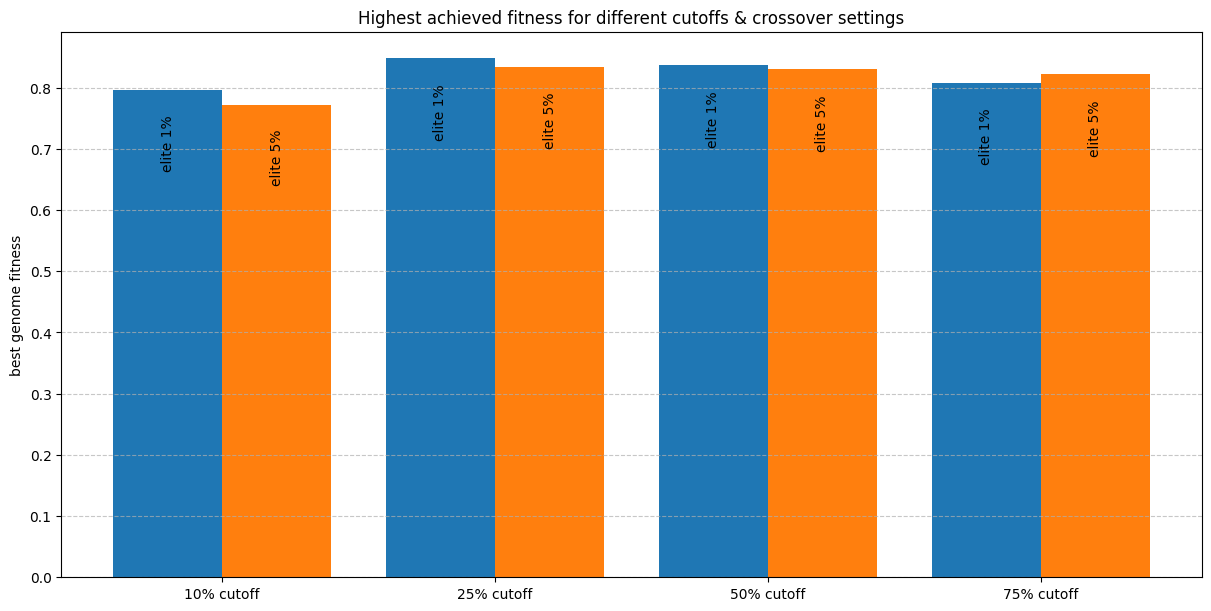

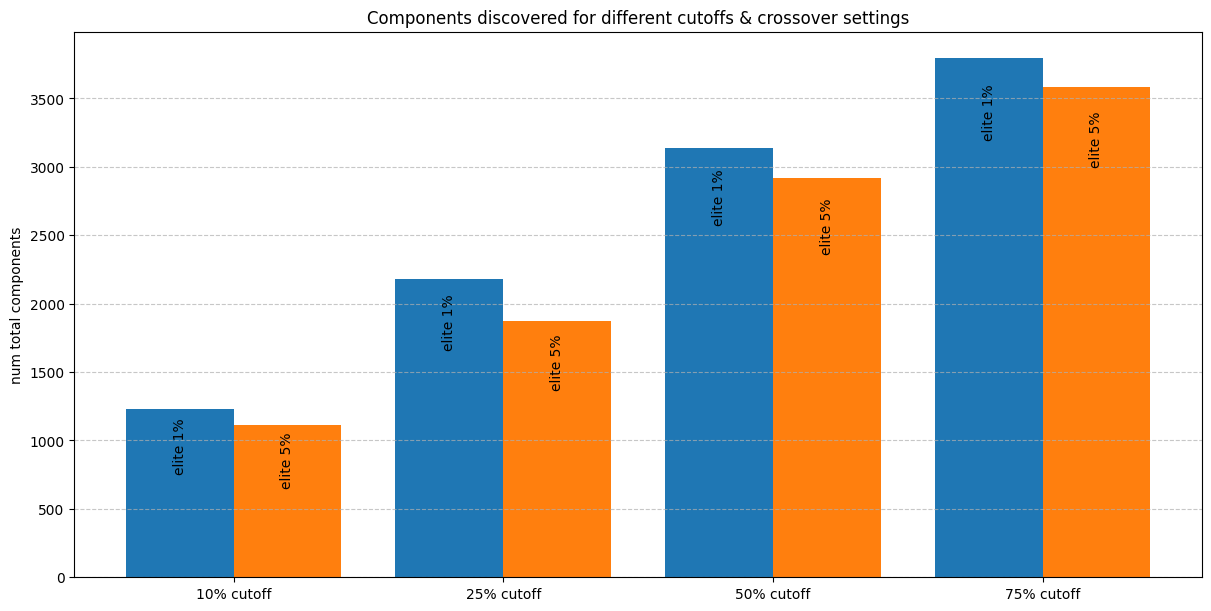

In [3]:
reload(sa)
# TODO: update text above

cutoff_elite_search = {
    "cutoff 10% & elite 1%": {"spawn_cutoff": 0.1, "pop_perc_elite":  0.01}, "cutoff 10% & elite 5%": {"spawn_cutoff": 0.1, "pop_perc_elite":  0.05},
    "cutoff 25% & elite 1%": {"spawn_cutoff": 0.25, "pop_perc_elite": 0.01}, "cutoff 25% & elite 5%": {"spawn_cutoff": 0.25, "pop_perc_elite": 0.05},
    "cutoff 50% & elite 1%": {"spawn_cutoff": 0.50, "pop_perc_elite": 0.01}, "cutoff 50% & elite 5%": {"spawn_cutoff": 0.50, "pop_perc_elite": 0.05},
    "cutoff 75% & elite 1%": {"spawn_cutoff": 0.75, "pop_perc_elite": 0.01}, "cutoff 75% & elite 5%": {"spawn_cutoff": 0.75, "pop_perc_elite": 0.05}
}


elite_plt_layout = [
    ["cutoff 10% & elite 1%", "cutoff 10% & elite 5%"],
    ["cutoff 25% & elite 1%", "cutoff 25% & elite 5%"],
    ["cutoff 50% & elite 1%", "cutoff 50% & elite 5%"],
    ["cutoff 75% & elite 1%", "cutoff 75% & elite 5%"]
]

elite_data_sources = sa.search_and_aggregate_param_results(res, cutoff_elite_search)
strip_first_param = lambda l: l.split('&')[1].strip().split('\n')[0] # lambda to be applied on labels
_ = sa.generalized_barplot(elite_plt_layout, elite_data_sources, "best_genome_fitness", title="Highest achieved fitness for different cutoffs & crossover settings", group_titles=["10% cutoff", "25% cutoff", "50% cutoff", "75% cutoff"], label_lambda=strip_first_param)
_ = sa.generalized_barplot(elite_plt_layout, elite_data_sources, "num_total_components", title="Components discovered for different cutoffs & crossover settings", group_titles=["10% cutoff", "25% cutoff", "50% cutoff", "75% cutoff"], label_lambda=strip_first_param)


 This again shows how none of the settings really have an impact on the achieved mean fitness. At the end, I will compare all setups, i.e. all parameter permutations to identify the best settings within my sample and compare that to the analysis here. However elitism clearly exhibits a negative effect on the total number of components. At really high cutoffs of 75%, elitism ensures that the proportion of good genomes is higher in the gene pool, resulting to a slight boost in fitness compared to a 1% elitism rate. Overall - when aggregating the different crossover settings and looking just at elitism and crossover, the first barchart indicates that a cutoff rate of about 25% is beneficial for fitness when using the current small log, as the search becomes more focused.



 ### Interaction cutoff ~ crossover on absolute fitness and number of components at the end of run

 I will now do the same visualization, this time filtering by cutoff and crossover rate, and both elitism settings will be averaged out.

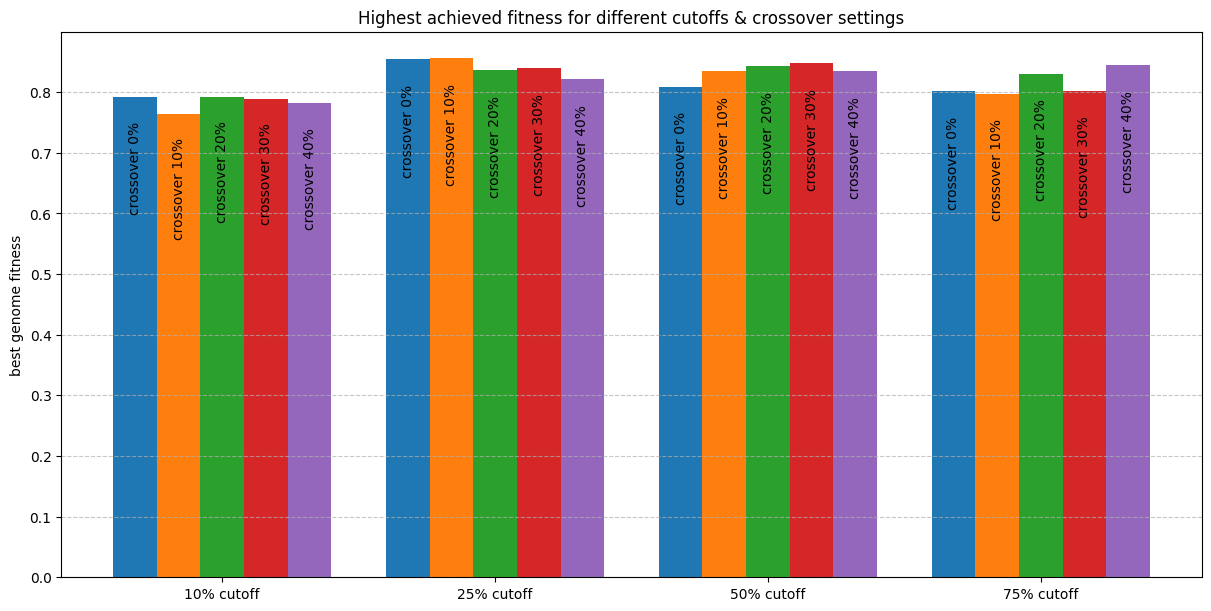

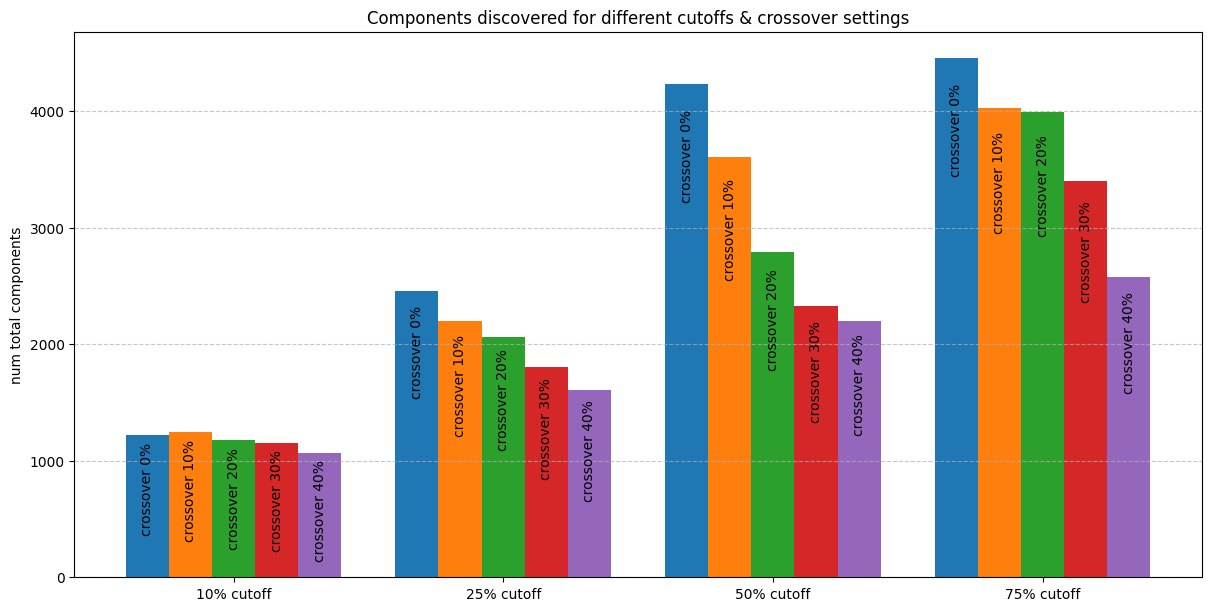

In [4]:
reload(sa)
cutoff_crossover_search = {
    "cutoff 10% & crossover 0%": {"spawn_cutoff": 0.10, "pop_perc_crossover": 0.0}, "cutoff 10% & crossover 10%": {"spawn_cutoff": 0.10, "pop_perc_crossover": 0.1}, "cutoff 10% & crossover 20%": {"spawn_cutoff": 0.10, "pop_perc_crossover": 0.2}, "cutoff 10% & crossover 30%": {"spawn_cutoff": 0.10, "pop_perc_crossover": 0.3}, "cutoff 10% & crossover 40%": {"spawn_cutoff": 0.10, "pop_perc_crossover": 0.4},
    "cutoff 25% & crossover 0%": {"spawn_cutoff": 0.25, "pop_perc_crossover": 0.0}, "cutoff 25% & crossover 10%": {"spawn_cutoff": 0.25, "pop_perc_crossover": 0.1}, "cutoff 25% & crossover 20%": {"spawn_cutoff": 0.25, "pop_perc_crossover": 0.2}, "cutoff 25% & crossover 30%": {"spawn_cutoff": 0.25, "pop_perc_crossover": 0.3}, "cutoff 25% & crossover 40%": {"spawn_cutoff": 0.25, "pop_perc_crossover": 0.4},
    "cutoff 50% & crossover 0%": {"spawn_cutoff": 0.50, "pop_perc_crossover": 0.0}, "cutoff 50% & crossover 10%": {"spawn_cutoff": 0.50, "pop_perc_crossover": 0.1}, "cutoff 50% & crossover 20%": {"spawn_cutoff": 0.50, "pop_perc_crossover": 0.2}, "cutoff 50% & crossover 30%": {"spawn_cutoff": 0.50, "pop_perc_crossover": 0.3}, "cutoff 50% & crossover 40%": {"spawn_cutoff": 0.50, "pop_perc_crossover": 0.4},
    "cutoff 75% & crossover 0%": {"spawn_cutoff": 0.75, "pop_perc_crossover": 0.0}, "cutoff 75% & crossover 10%": {"spawn_cutoff": 0.75, "pop_perc_crossover": 0.1}, "cutoff 75% & crossover 20%": {"spawn_cutoff": 0.75, "pop_perc_crossover": 0.2}, "cutoff 75% & crossover 30%": {"spawn_cutoff": 0.75, "pop_perc_crossover": 0.3}, "cutoff 75% & crossover 40%": {"spawn_cutoff": 0.75, "pop_perc_crossover": 0.4},
}

crossover_plt_layout = [
    ["cutoff 10% & crossover 0%", "cutoff 10% & crossover 10%", "cutoff 10% & crossover 20%", "cutoff 10% & crossover 30%", "cutoff 10% & crossover 40%"],
    ["cutoff 25% & crossover 0%", "cutoff 25% & crossover 10%", "cutoff 25% & crossover 20%", "cutoff 25% & crossover 30%", "cutoff 25% & crossover 40%"],
    ["cutoff 50% & crossover 0%", "cutoff 50% & crossover 10%", "cutoff 50% & crossover 20%", "cutoff 50% & crossover 30%", "cutoff 50% & crossover 40%"],
    ["cutoff 75% & crossover 0%", "cutoff 75% & crossover 10%", "cutoff 75% & crossover 20%", "cutoff 75% & crossover 30%", "cutoff 75% & crossover 40%"]
]


crossover_data_sources = sa.search_and_aggregate_param_results(res, cutoff_crossover_search)
strip_first_param = lambda l: l.split('&')[1].strip().split('\n')[0] # lambda to be applied on labels
_ = sa.generalized_barplot(crossover_plt_layout, crossover_data_sources, "best_genome_fitness", title="Highest achieved fitness for different cutoffs & crossover settings", group_titles=["10% cutoff", "25% cutoff", "50% cutoff", "75% cutoff"], label_lambda=strip_first_param)
_ = sa.generalized_barplot(crossover_plt_layout, crossover_data_sources, "num_total_components", title="Components discovered for different cutoffs & crossover settings", group_titles=["10% cutoff", "25% cutoff", "50% cutoff", "75% cutoff"], label_lambda=strip_first_param)


 The fitness barcharts indicate a bit of a tradeoff: Generally, a low cutoff of 25% is beneficial, combined with a low crossover rate of 0-10% percent. However there seems to be a second path to high fitness values, which is choosing a high cutoff but then focusing the search by also using a high crossover rate. Since crossover for truncation selection uses a tournament approach for finding 2 mates (current tournament size = 10), there is increased selection from the top genomes. This can also be seen in the spawn rank plots [below](#truncation-spawn-plots). I.e. when using 40% crossover spawns, 40% of the next generation will be selected by a tournament.

 ### Cutoff ~ Crossover - fitness plot

 In the next step, I want to analyze how truncation selection convergences towards it's optimum in the different parameter settings.

 First, I will plot the maximum fitness in each generation, averaged across all runs sharing the same cutoff & crossover settings



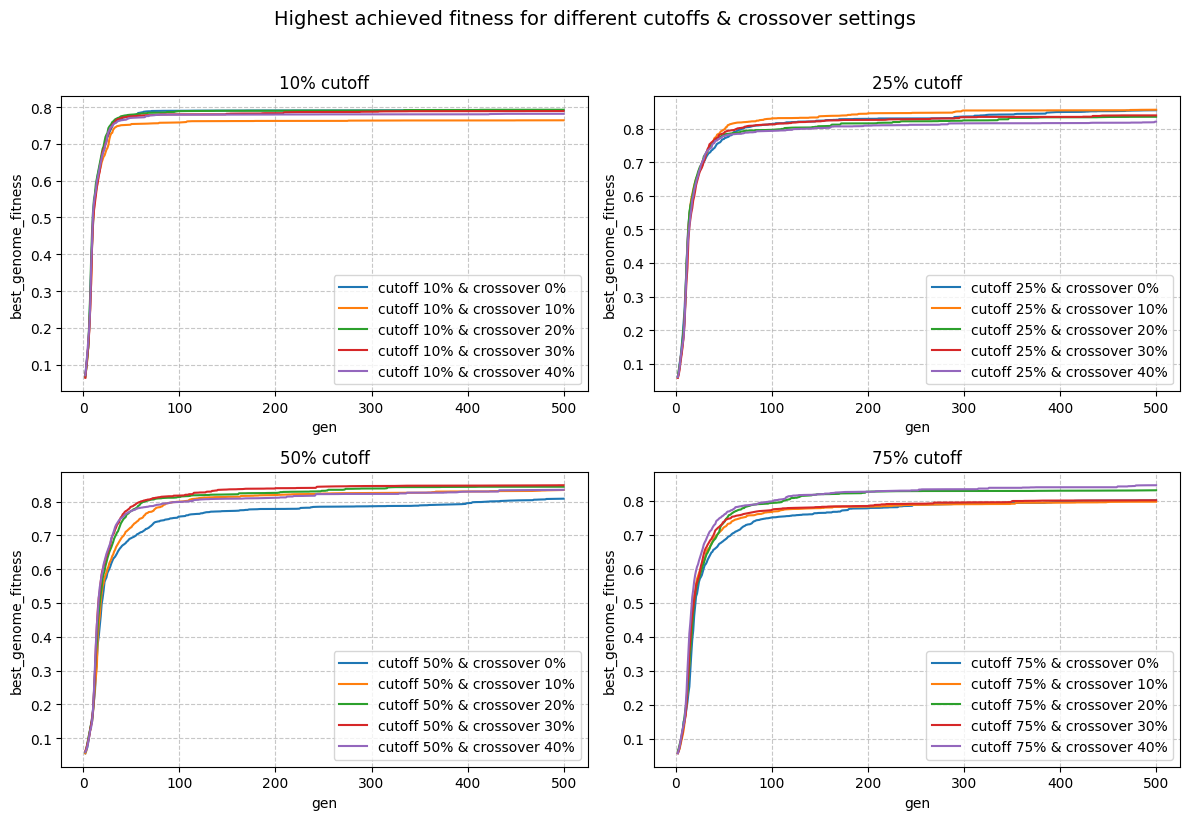

In [5]:
_ = sa.generalized_lineplot(crossover_plt_layout, crossover_data_sources, "best_genome_fitness", title="Highest achieved fitness for different cutoffs & crossover settings", subplt_titles=["10% cutoff", "25% cutoff", "50% cutoff", "75% cutoff"])


 In all of the selection strategy test setups, a fitness function was used that also considers the `num_arcs` metric, where a perfect score of 1.0 is not sensible to achieve - thus the overall fitness cannot reach 1.0.



 Even though fitness seems to plateau on these graphs after ~100 gens, there is often a long tail of optimizations that should not be discarded - even though it is barely visible in these zoomed-out graphs. Examples of such improvements include removing one superfluous arc, leading to a slightly better `num_arcs` score.



 While there is not much of a difference between the fitness plots, the 75% cutoff (4. Quadrant) is very interesting.

 Here, a higher crossover rate is relatively beneficial, and both the 40% and 20% crossover achieve the highest fitness scores.



 The benefit of crossover to fitness will be later investigated in more detail in the section on mutations (**TODO**: add a reference to this section here).



 ### Cutoff ~ Crossover - diversity & convergence



 Now, I want to look at the interaction between cutoff and crossover when converging on the final set of components.

 For this, I will plot the number of components discovered in each generation on average to see how quickly the search widens (again aggregating the two elitism settings for each cutoff/crossover combination).

 Then I will plot the number of unique components, as selection pressure discards most components that are not useful.

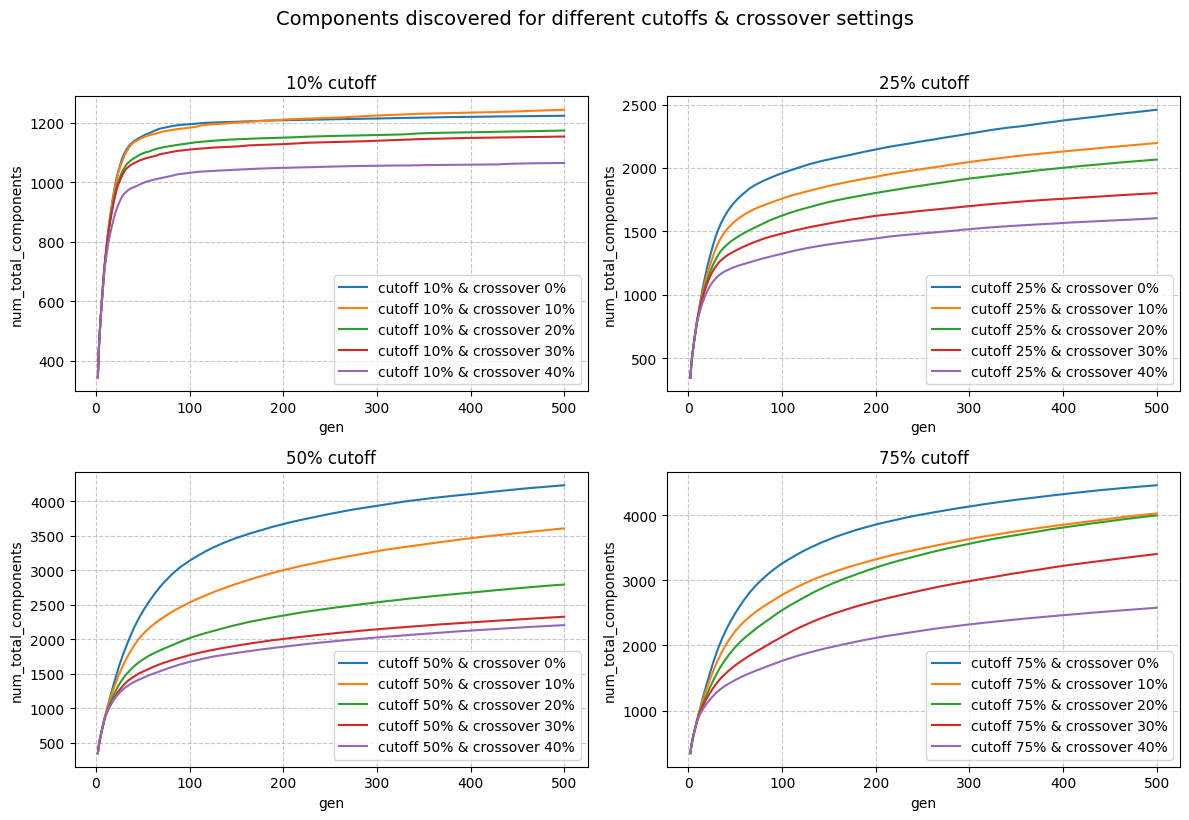

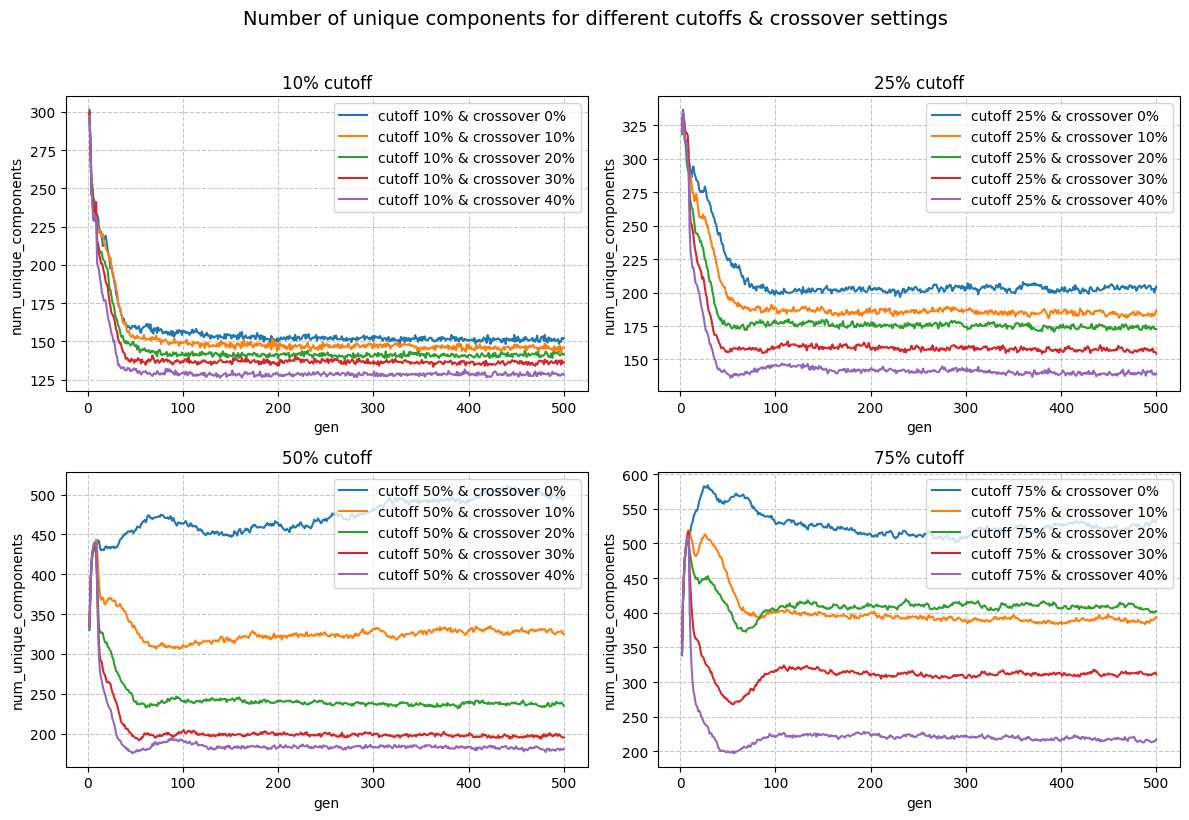

In [6]:
from copy import deepcopy
reload(sa)

# crossover components
_ = sa.generalized_lineplot(crossover_plt_layout, crossover_data_sources, "num_total_components", title="Components discovered for different cutoffs & crossover settings", subplt_titles=["10% cutoff", "25% cutoff", "50% cutoff", "75% cutoff"])
_ = sa.generalized_lineplot(crossover_plt_layout, crossover_data_sources, "num_unique_components", title="Number of unique components for different cutoffs & crossover settings", subplt_titles=["10% cutoff", "25% cutoff", "50% cutoff", "75% cutoff"], legend_loc="upper right")


 **num components**

 * Here the effect of the cutoff parameter can be seeen dramatically. As indicated in the regression, a low cutoff leads to much fewer components. However only a really low cutoff of 10% leads to an early plateau, all other cutoff levels continue to grow the number of components discovered, albeit more slowly for the lower cutoffs.

 * Crossovers decreasing effect is also clearly visible here



 **unique components**

 * Independent of the chosen cutoff setting, all graphs show that there are roughly ~300 components in the first generation. All graphs generally decrease in the number of unique components and then plateau (one exception: 0% crossover, 50% cutoff - at least for the observed number of generations). The difference is how long it takes until this stagnation starts

     * With a low spawn cutoff (10% & 25%), the diversity starts to decrease pretty much at the start.

     * With a higher cutoff (50% & 75%), the diversity continues to rise for longer. and there are more unique components both at the peak and also towards the end of the run.

     * I think the decline in unique componenets starts as soon as the population starts to improve. Because it takes much longer to filter for good genomes with a high cutoff, the selection pressure on components is lower for a longer amount of time. That it takes longer to improve in fitness with a high cutoff is self-evident, but it can also be seen in the next graphs which plot fitness.



 * The negative effect of crossover on diversity becomes very visible, especially in the 4th. Quadrant. Crossover is only enabled after 10 generations, after which pretty much all setups except the 0% crossover start to immediately decline, and based on the crossover rate, the decline in the number of unique components is stronger the higher the chosen crossover.



 **Calculating the total number of possible components:**

 I think the total number of possible components can be calculated by considering all the connection that a place may have to transitions (not considering nets with hidden transitions here). For each transition there are three possibilities when connecting to a place:

 * no connection

 * outgoing

 * incoming

 The algorithm prevents symmetric connections between places and transitions, thus the number of possible connections and thus also components should be:



 $3^{\sum transitions} = 3^{8} = 6561$



 The setups with >= 50% cutoffs thus reach about half the search space with a population size of 500 within 500 generations, i.e. 250.000 models (though a lot of them share components or are elite spawns). This shows that the selection pressure does indeed work to stop the algorithm from just testing every random connection.





 ### Cutoff ~ elitism - diversity, convergence & fitness

 After investigating the relation of crossover and cutoff, lets do the same for elitism.

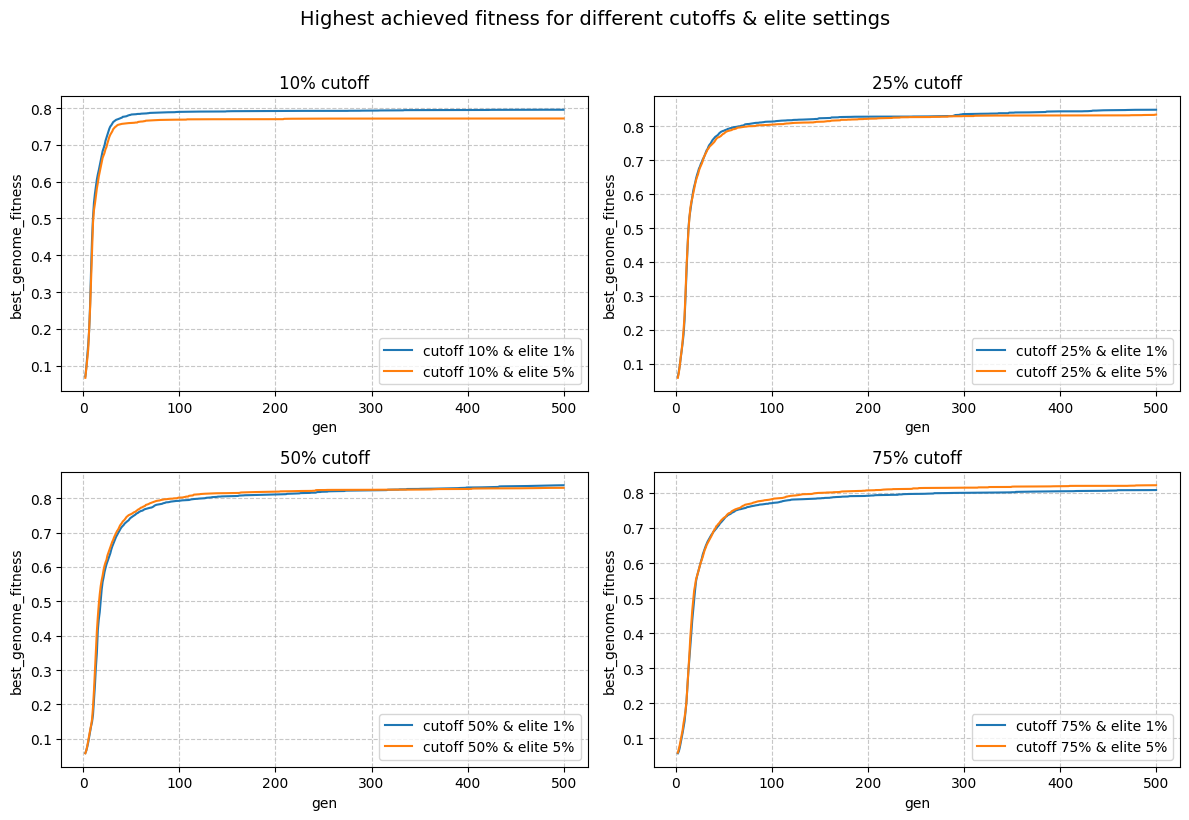

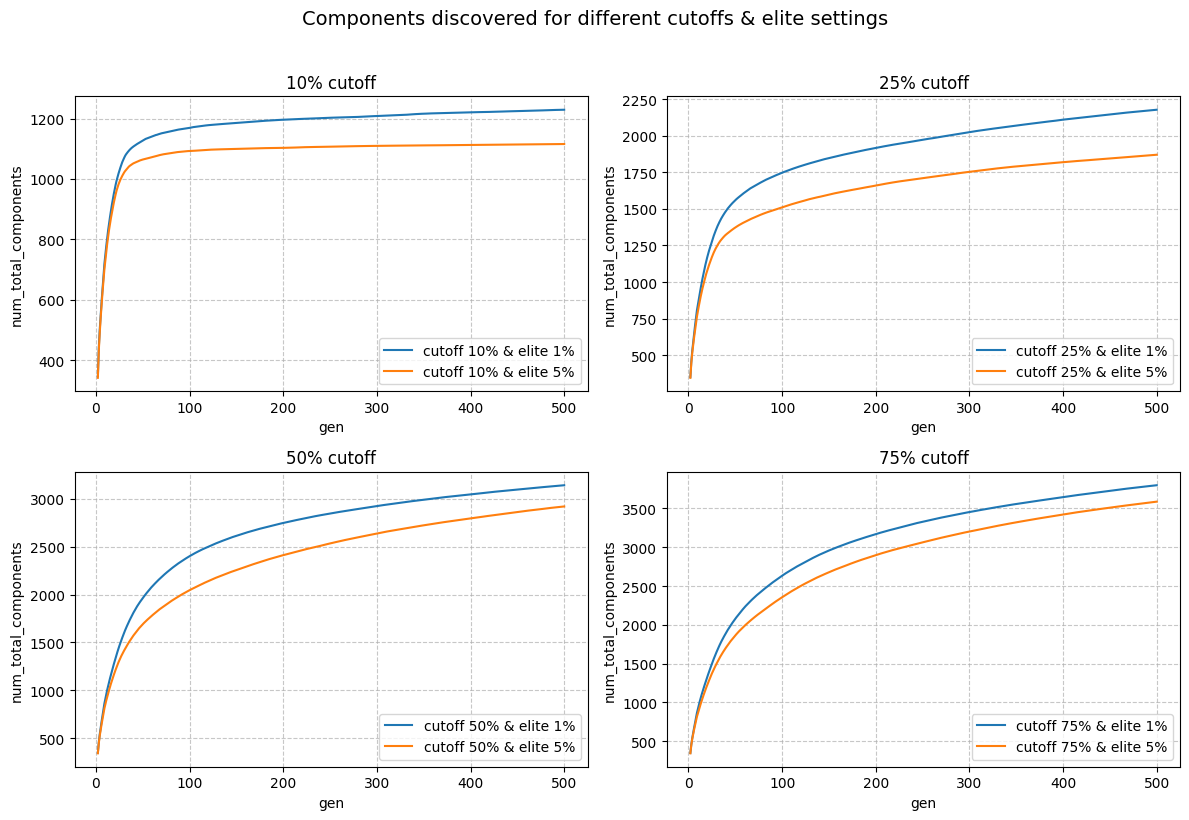

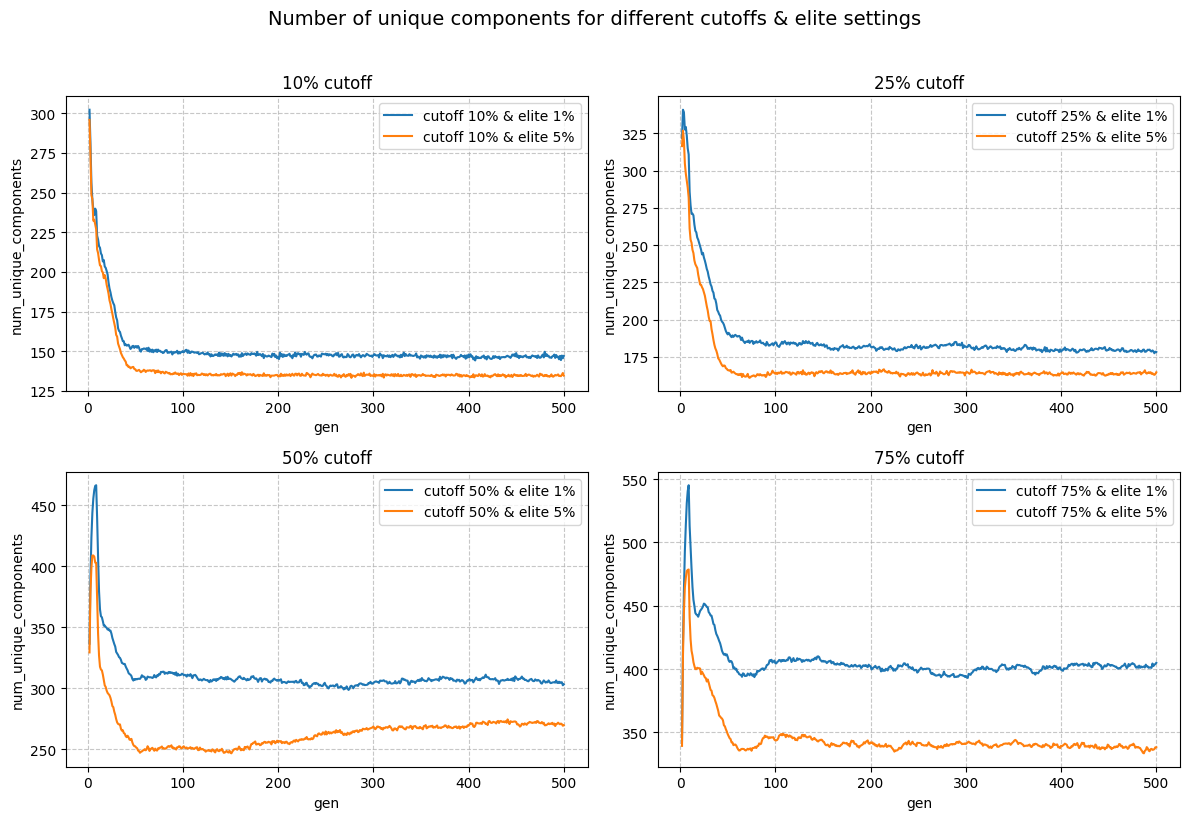

In [7]:
_ = sa.generalized_lineplot(elite_plt_layout, elite_data_sources, "best_genome_fitness", title="Highest achieved fitness for different cutoffs & elite settings", subplt_titles=["10% cutoff", "25% cutoff", "50% cutoff", "75% cutoff"])
_ = sa.generalized_lineplot(elite_plt_layout, elite_data_sources, "num_total_components", title="Components discovered for different cutoffs & elite settings", subplt_titles=["10% cutoff", "25% cutoff", "50% cutoff", "75% cutoff"])
_ = sa.generalized_lineplot(elite_plt_layout, elite_data_sources, "num_unique_components", title="Number of unique components for different cutoffs & elite settings", subplt_titles=["10% cutoff", "25% cutoff", "50% cutoff", "75% cutoff"], legend_loc="upper right")


 This time, the plots tell a consistent story:



 **fitness:**

 * cutoffs 0.1, 0.25, 0.5: lower elitism -> very slightly higher fitness

 * cutoff 0.75: higher elitism -> very slightly higher fitness



 **num components:**

 * lower elitism -> more components discovered



 **unique components:**

 * lower elitism -> more components preserved for longer

 ### Truncation spawn plots

 The following plots show the distribution of spawns each fitness rank gets. I.e. I rank the previous generation by fitness in descending order, then check the current generations parent ids and increment the number of spawns the parents fitness rank got. This means that it is just the parents position in the fitness ranking matters, and the plot effectively shows what fraction of the entire population gets to procreate.



 The spawn rank plots shown here are from setups using 1% elitism, all 4 cutoff settings, as well as either 0% or 30% crossover, resulting in 8 plots.

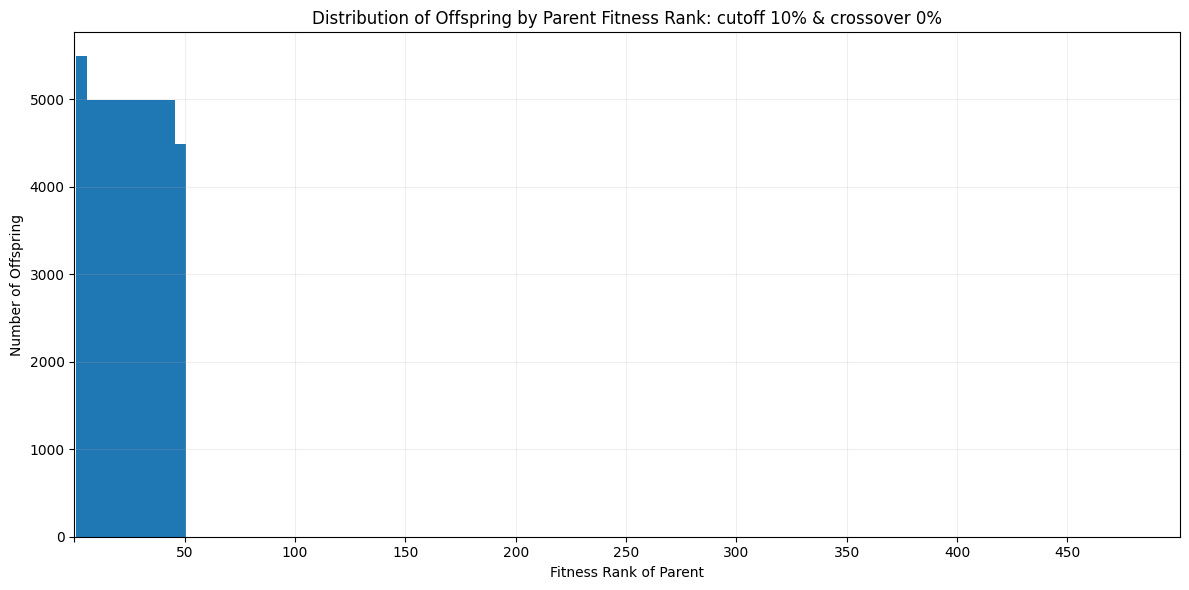

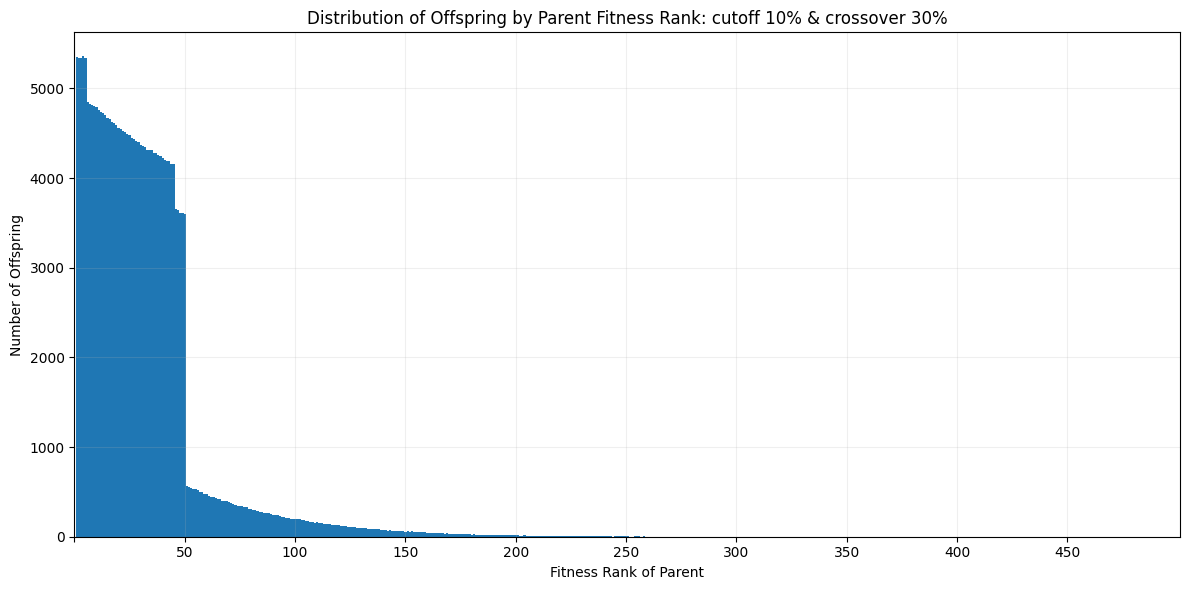

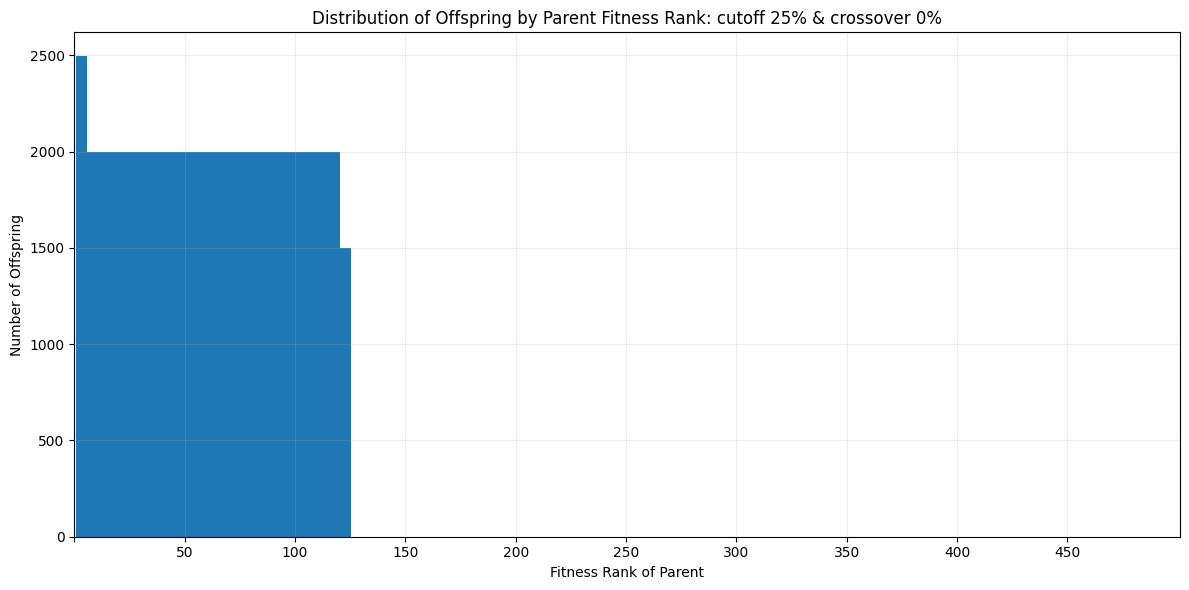

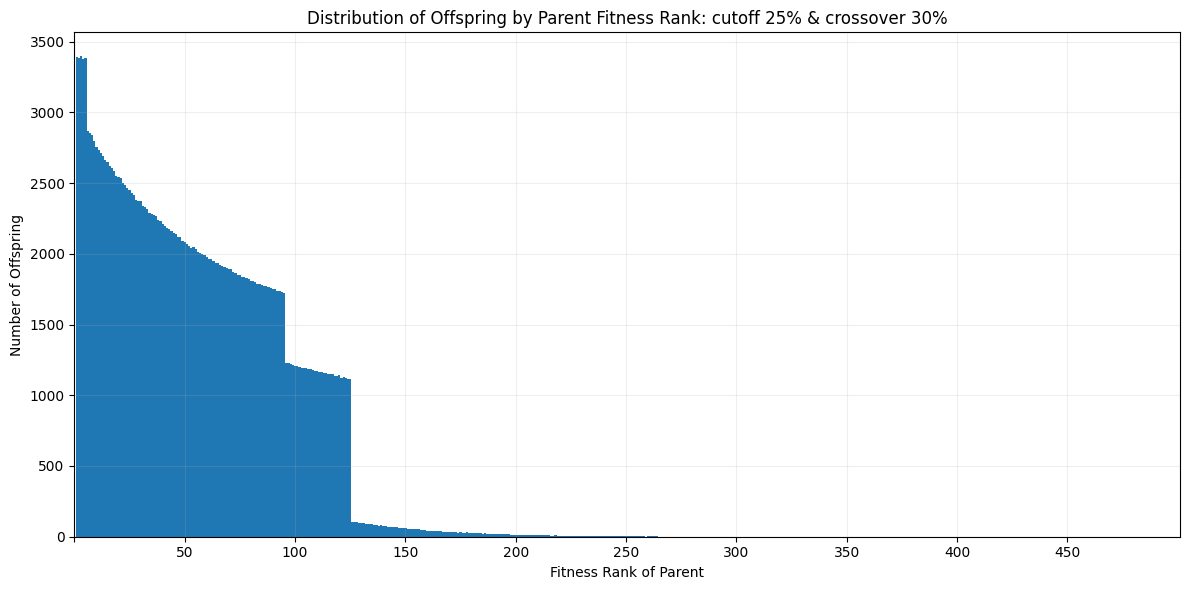

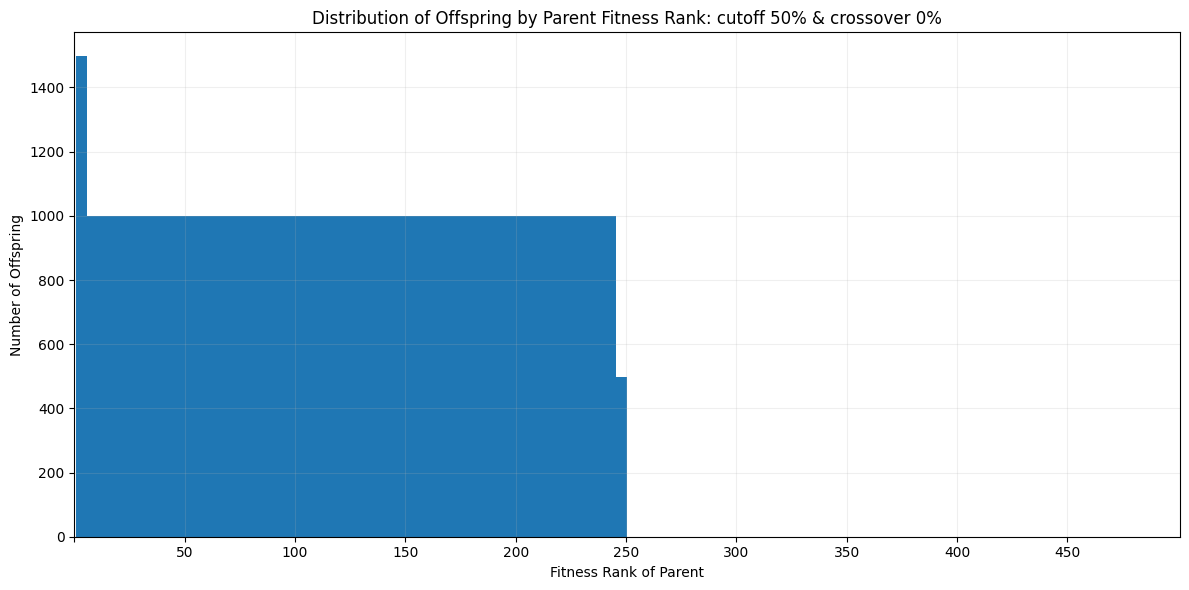

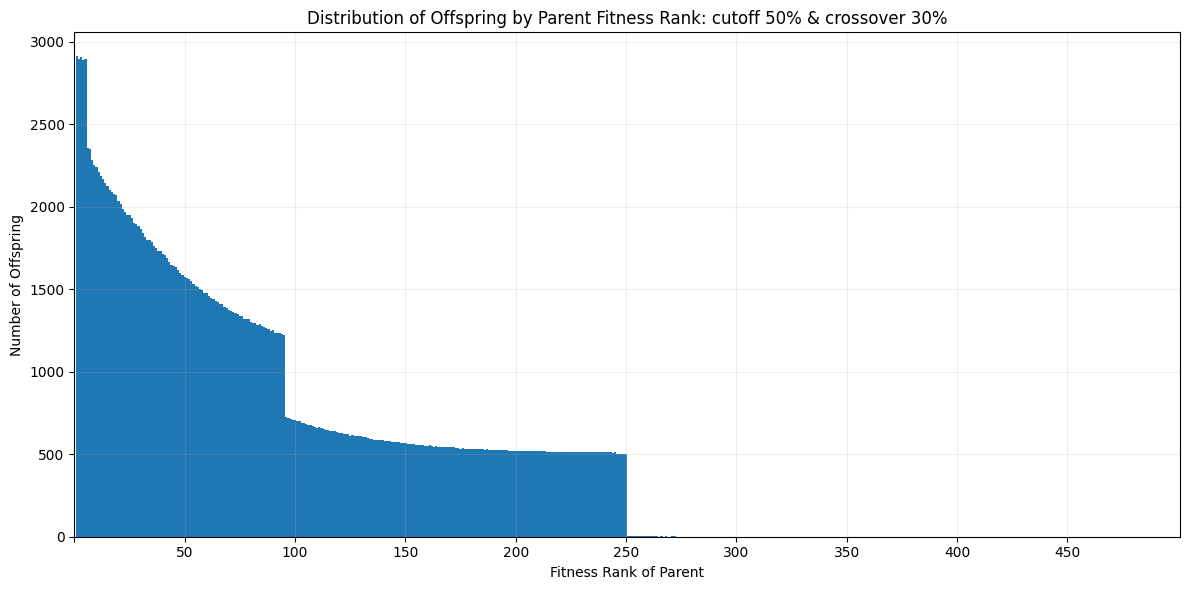

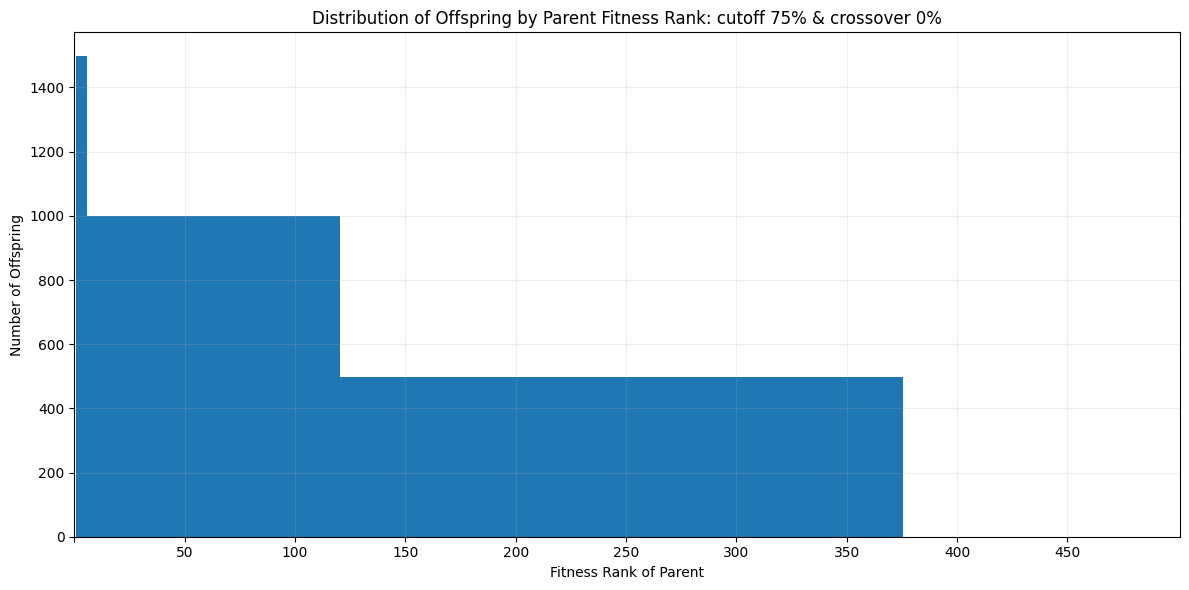

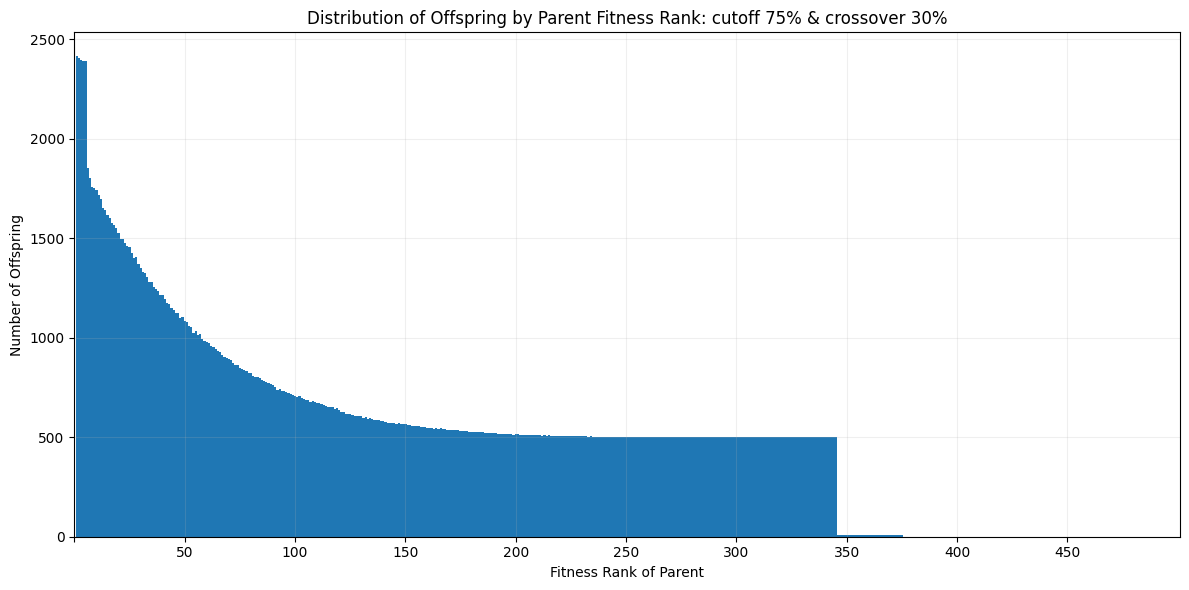

In [8]:
from copy import deepcopy
reload(sa)

chosen_setups = [
    "cutoff 10% & crossover 0%", "cutoff 10% & crossover 30%",
    "cutoff 25% & crossover 0%", "cutoff 25% & crossover 30%",
    "cutoff 50% & crossover 0%", "cutoff 50% & crossover 30%",
    "cutoff 75% & crossover 0%", "cutoff 75% & crossover 30%"
]

# using a fixed 0.01 elitism rate
search_params = {}
for d_id in chosen_setups:
    data = deepcopy(cutoff_crossover_search[d_id])
    data["pop_perc_elite"] = 0.01
    search_params[d_id] = data

# filtering for the setups containing these settings and plotting their aggregated spawn ranks
t = 'Distribution of Offspring by Parent Fitness Rank: '
search_res = sa.search_setups(res, search_params)
for s_name, s_id in sorted(search_res.items(), key= lambda x: x[0]):
    rs_data = res["setups"][s_id[0]]['spawn_rank_agg']
    sa.plot_offspring_distribution(rs_data, title=t+s_name)


 **Spawn rank plot observations:**

 The first two plots show a 10% cutoff. With no crossover, it is really only the first 50 genomes that get to spawn. The first spike in the barplot is the result of the 5 elites. The small chip at the end of the bar is because the iteration of the remaining asex spawns could not quite finish.



 When using crossover, the distribution caused by tournament selection is stacked on top of the normal cutoff selection. With a low cutoff of just 10%, the tail of crossover distribution extends out of the truncated section of the population.



 This basic pattern continues for all other cutoff plots as well. With 25% cutoff, exactly the top 125 genomes get to spawn offspring, at 50% It is exactly half the population at 250, and with 75%, 375 members of the population get to spawn.



 At 75%, the effect of iterating with modulo over the population becomes very visible. The first spawn loop iteration spawns 375 genomes. Add to that 5 elite spawns, that leaves 500 - 380 = 120 spawns for the second iteration when using no crossover. With crossover of 30%, the asex spawns are only 500*0.7=350 to begin with, allowing for just about that many asex spawns, and there is no visible step in the histogram. Thus crossover further intensivies elitism, because the second iteration of the spawn loop after all selected genomes had their first asex spawn becomes shorter.



 Another thing that can be seen in those spawn rank plots is that with an increasing fraction of the population that gets to spawn into the next generation, the delta between the number of offspring the elites get relative to the rest of the spawning population becomes even more pronounced, as a higher cutoff leads to fewer spawns per member that makes the cutoff.

 ### Truncation - Overall results comparison

 Lastly, I will look at the maximum fitness achieved by each setup - aggregated across all 20 runs and sorted by the mean of the aggregate to identify the best setups.

In [9]:
max_fitness_results = sa.get_best_setups(res["final_report"])
max_fitness_results.head(10)


shape: (10, 5)
┌───────────┬──────────────┬─────────────┬────────────────┬─────────────┐
│ setupname ┆ mean_fitness ┆ max_fitness ┆ median_fitness ┆ std_fitness │
│ ---       ┆ ---          ┆ ---         ┆ ---            ┆ ---         │
│ str       ┆ f64          ┆ f64         ┆ f64            ┆ f64         │
╞═══════════╪══════════════╪═════════════╪════════════════╪═════════════╡
│ setup_12  ┆ 0.874216     ┆ 0.903509    ┆ 0.903509       ┆ 0.060692    │
│ setup_11  ┆ 0.869983     ┆ 0.903509    ┆ 0.893939       ┆ 0.056047    │
│ setup_40  ┆ 0.861852     ┆ 0.903509    ┆ 0.891304       ┆ 0.057745    │
│ setup_24  ┆ 0.86062      ┆ 0.903509    ┆ 0.903509       ┆ 0.074118    │
│ setup_22  ┆ 0.852567     ┆ 0.903509    ┆ 0.888986       ┆ 0.069148    │
│ setup_28  ┆ 0.85086      ┆ 0.903509    ┆ 0.888986       ┆ 0.063484    │
│ setup_14  ┆ 0.849953     ┆ 0.903509    ┆ 0.886667       ┆ 0.061867    │
│ setup_25  ┆ 0.844953     ┆ 0.903509    ┆ 0.888986       ┆ 0.06832     │
│ setup_16  ┆ 0.840538     ┆ 0.903509    ┆ 0.883536       ┆ 0.071115    │
│ setup_17  ┆ 0.839285     ┆ 0.903509    ┆ 0.865553       ┆ 0.071367    │
└───────────┴──────────────┴─────────────┴────────────────┴─────────────┘

 **Disclaimer about fitness values**

 As already suggested by the linear regression - the effects of the tested parameters on fitness are not that big in absolute numbers. However, we have to consider that the range of possible fitness in my normalized fitness function is just 0-1, so so a difference in mean fitness of about 3,5% between the best and 10th. best should be considered when selecting parameters. Especially because the fitness function is also weighted more heavily towards the aggregated replay fitness which alone does not tell the complete story about a model's quality. And while the num-arcs score cannot reach perfect fitness, even small differences of one or two arcs more or less can have a huge impact on both a models performance on unseen trace variants not in the log, as well as readability.



 Thus I want to pay attention to these results, even though the numeric differences are pretty small.



 The parameter configurations for each setup can be obtained from the `data/truncation_test/param_changes.txt` file.



 **Results**

 * All but 4 selection strategies managed to discover the optimum process model for the simple log (max fitness = 0.903509), which is encouraging.

 * The best two setups according to their mean achieved fitness (12 & 11) both use 25% cutoff and 1% elitism, with setup 12 using 10% crossover spawns and 11 using no crossover. This seems consistent with the testing thus far, and this result can also be seen in the [barplots showing the mean fitness](#interaction-cutoff--crossover-on-absolute-fitness-and-number-of-components-at-the-end-of-run).

 * The 3rd best setup follows the radically different strategy of using a 75% spawn cutoff but with 40% crossover and 5% elitism, indicating that the crossover's tournament selection method almost acts as a sort of elitism, buffering against the fitness decline that results from using a high cutoff as is the case with setups 31-40.

 * Setup 24 offers a middle ground, using 50% cutoff, but also 30% crossover (1% elites). Setup 22 is simillar, but it uses just 10% elitism

 * the rest of the top 10 uses either 25% or 50% cutoff. None of the 10% cutoff setups are present in the top ten, and the only 75% cutoff that made the cut is setup 40.

 ### Truncation selection - summarized findings

 Since all the parameters are in theory continuous, I could not test every possible value - nor would that have been productive. It seems that discarding about 75% of the population while keeping a very small number of elites and crossover spawns yields the best results for truncation selection.



 At least for this small log, there does not really seem to be a relation between total search space coverage (i.e. total num components discovered) and achieved fitness, which is why a more focused search yields the best results. This does make sense, there is a combinatorial explosion of possible components, and with the simple log just consisting of 8 unique tasks and no necessity for hidden transitions, it is encouraging that a search space coverage of less than 50% percent ([total components: ~6.500](#cutoff--crossover---diversity--convergence)) is generally a good path for finding the optimum.



 Next, I will investigate the roulette selection strategy.

 ## Selection strategy - roulette

 For the roulette selection strategy there is no cutoff that needs to be manually set. The likelihood of spawning an offspring is directly dependant on a genomes fitness relative to the rest of the population. Numpys weighted random choice function is used, the weights being calculatd on a genomes share of fitness relative to the total population.

 The "roulette" analogy comes from spinning a roulette wheel, where the segments sizes are adjusted according to the fitness.

 Except for cutoff, the same parameter permutations were used:

 * `pop_perc_elite`: 0.01, 0.05

 * `pop_perc_crossover`: 0.0, 0.1, 0.2, 0.3, 0.4



 resulting in 2 * 5 = just 10 setups.



 ### Regression on roulette parameters

 Again, the first step is a regression on the chosen parameters. I expect the parameters to have very similar effects to those they had with truncation selection.

In [10]:
# crawl the results data and load it into a dict
roulette_res = sa.exec_results_crawler("../analysis/data/roulette_test")


Processing setup directories: 13it [00:00, 2599.69it/s]


Found cached results for setup_1
Successfully loaded cached results for setup_1

Found cached results for setup_10
Successfully loaded cached results for setup_10

Found cached results for setup_2
Successfully loaded cached results for setup_2

Found cached results for setup_3
Successfully loaded cached results for setup_3

Found cached results for setup_4
Successfully loaded cached results for setup_4

Found cached results for setup_5
Successfully loaded cached results for setup_5

Found cached results for setup_6
Successfully loaded cached results for setup_6

Found cached results for setup_7
Successfully loaded cached results for setup_7

Found cached results for setup_8
Successfully loaded cached results for setup_8

Found cached results for setup_9
Successfully loaded cached results for setup_9


In [11]:
roulette_regression = sa.run_regression(roulette_res, ["pop_perc_elite", "pop_perc_crossover"]);



Regression Results for num_components
--------------------------------------------------
R-squared: 0.8761
Adjusted R-squared: 0.8749

Standardized Coefficients:
pop_perc_elite        -359.6100 (p=0.0000)
pop_perc_crossover    -258.3556 (p=0.0000)

Regression Results for max_fitness
--------------------------------------------------
R-squared: 0.0890
Adjusted R-squared: 0.0798

Standardized Coefficients:
pop_perc_elite           0.0167 (p=0.0005)
pop_perc_crossover       0.0125 (p=0.0094)


 **num components**

 Very similar R-Squared for the number of components. Both predictors for num_components are significant. This time elitism had a slightly more negative effect than crossover, while for truncation, the negative effect of crossover was 4 times stronger than elitism. But increasing both parameters predictably decreases the number of components.



 **max fitness**

 Both parameters have a (very small) positive effect on fitness of about 1% each. Only elitism's effect is significant though. This is also in contrast to truncation selection, where elitism has a negative effect on fitness (at least when using more than 1%).



 **On crossover**

 It should be noted here that crossover in the roulette selection functions differently than in the truncation and speciation selection methods. Both use a tournament selection to find mates, whereas the roulette selection method simply uses the weighted probabilities again for selecting two mates. Thus a difference in the effectiveness of crossover for roulette could be at least partially explained by the difference in how parents are selected for crossover.

 ### Interaction crossover ~ elitism on absolute fitness and number of components at the end of run

 This time, there are only two parameters that were tested, meaning I can easily visualize their effects using simple barplots. Thus there are also no aggregations of the other parameter settings as was the case with elitism/crossover in truncation visualizations.

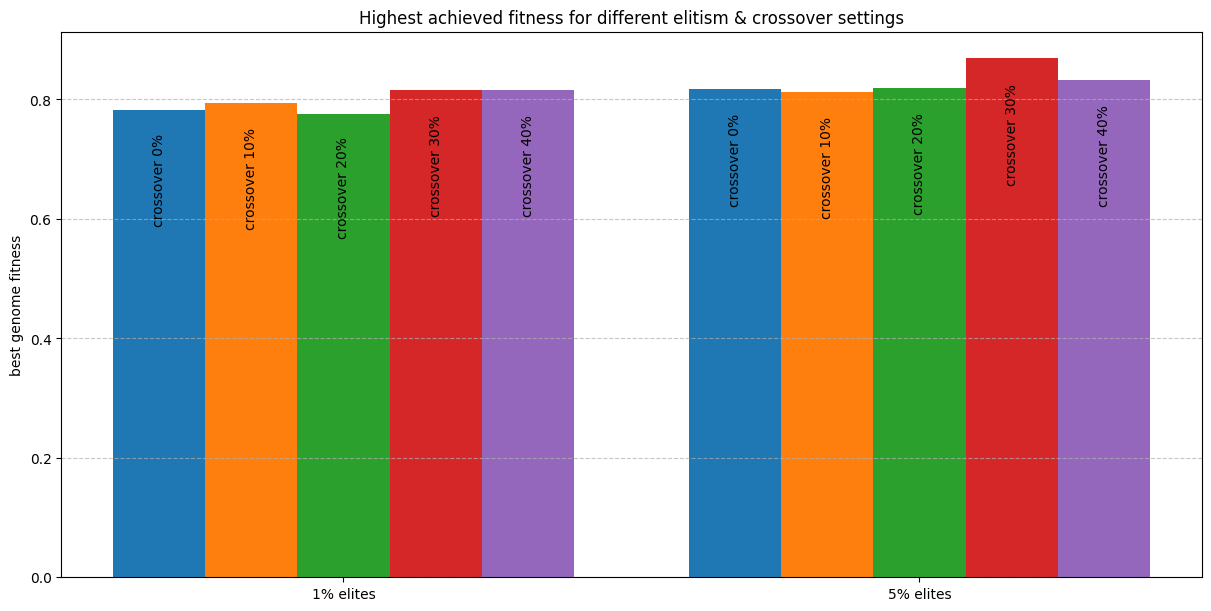

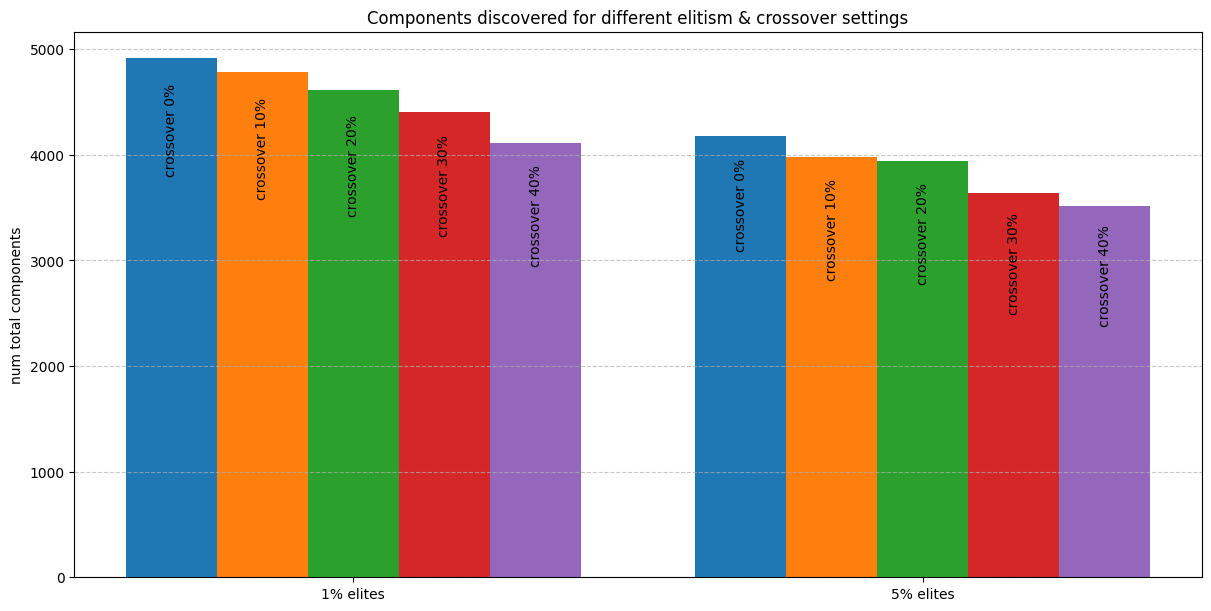

In [12]:
roulette_search = {
    "crossover 0% & elite 1%": {"pop_perc_crossover": 0.0 , "pop_perc_elite": 0.01}, "crossover 0% & elite 5%": {"pop_perc_crossover": 0.0 , "pop_perc_elite": 0.05}, 
    "crossover 10% & elite 1%": {"pop_perc_crossover": 0.10, "pop_perc_elite": 0.01}, "crossover 10% & elite 5%": {"pop_perc_crossover": 0.10 , "pop_perc_elite": 0.05}, 
    "crossover 20% & elite 1%": {"pop_perc_crossover": 0.20, "pop_perc_elite": 0.01}, "crossover 20% & elite 5%": {"pop_perc_crossover": 0.20, "pop_perc_elite": 0.05}, 
    "crossover 30% & elite 1%": {"pop_perc_crossover": 0.30, "pop_perc_elite": 0.01}, "crossover 30% & elite 5%": {"pop_perc_crossover": 0.30, "pop_perc_elite": 0.05}, 
    "crossover 40% & elite 1%": {"pop_perc_crossover": 0.40, "pop_perc_elite": 0.01}, "crossover 40% & elite 5%": {"pop_perc_crossover": 0.40, "pop_perc_elite": 0.05}, 
}


roulette_plt_layout = [
    ["crossover 0% & elite 1%", "crossover 10% & elite 1%", "crossover 20% & elite 1%", "crossover 30% & elite 1%", "crossover 40% & elite 1%"],
    ["crossover 0% & elite 5%", "crossover 10% & elite 5%", "crossover 20% & elite 5%", "crossover 30% & elite 5%", "crossover 40% & elite 5%"]
]

 
strip_second_param = lambda l: l.split('&')[0].strip().split('\n')[0] # lambda to be applied on labels
roulette_data_sources = sa.search_and_aggregate_param_results(roulette_res, roulette_search)
_ = sa.generalized_barplot(roulette_plt_layout, roulette_data_sources, "best_genome_fitness", title="Highest achieved fitness for different elitism & crossover settings", group_titles=["1% elites", "5% elites"], label_lambda=strip_second_param)
_ = sa.generalized_barplot(roulette_plt_layout, roulette_data_sources, "num_total_components", title="Components discovered for different elitism & crossover settings", group_titles=["1% elites", "5% elites"], label_lambda=strip_second_param)



 Again, an inverse relation between the fitness and number of components discovered can be seen. While higher elitism leads to fewer components discovered, it also leads to higher fitness. But the fitness difference is not much. Overall the components plot also suggests that roulette selection selects from a much larger subset of the population, as it averaged a relatively high number of components discovered in 500 generations. The 0% crossover, 1% elites combination leads to close to 5.000 components discovered, which is roughly 75% percent of possible components.

 ### elitism ~ crossover - fitness

 First, lets look at the fitness progression when using the different crossover and fitness settings

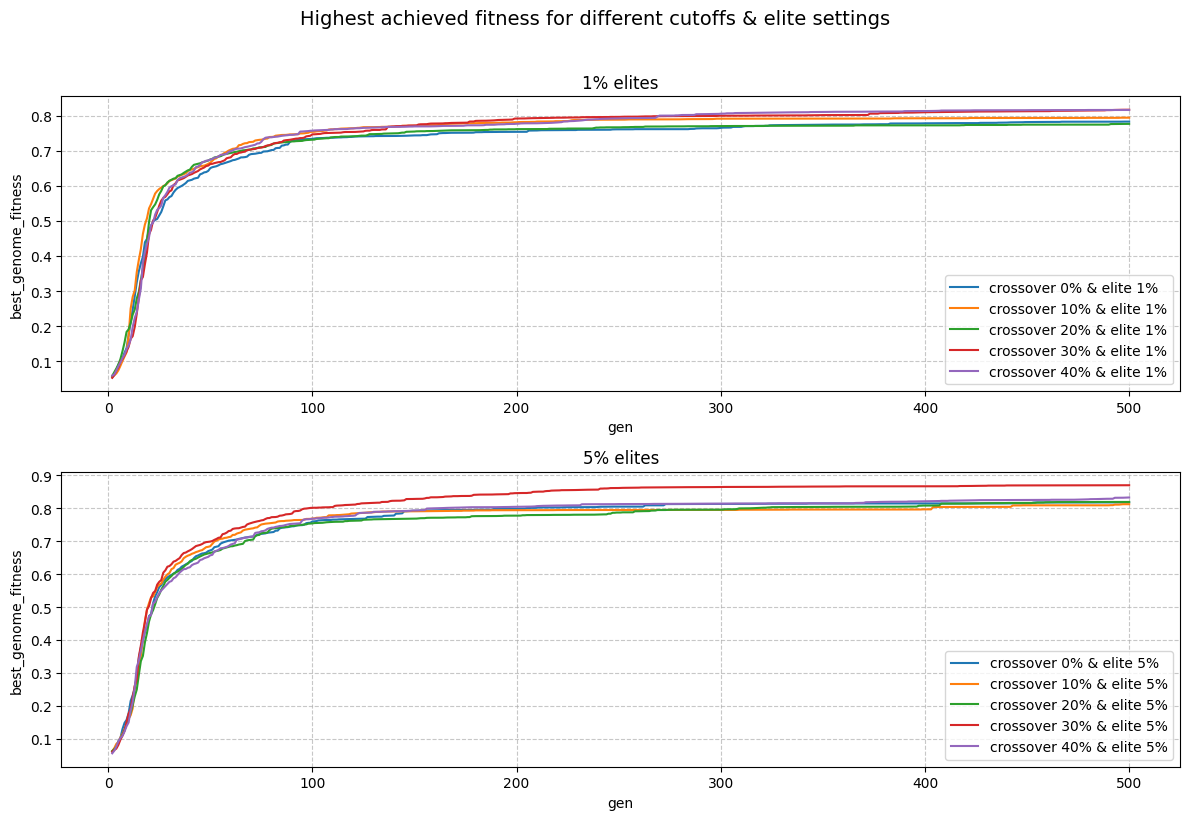

In [13]:
_ = sa.generalized_lineplot(roulette_plt_layout, roulette_data_sources, "best_genome_fitness", title="Highest achieved fitness for different cutoffs & elite settings", subplt_titles=["1% elites", "5% elites"])


 Not much of a difference, though it becomes visible that with a higher degree of elitism, roulette convergess earlier on a high fitness. Also, the only notable setup difference here is the much better fitness performance of 30% crossover when using 5% elitism, whose line is pretty seperated from the other setups. It also seems that this setup was the best overall, as can be seen in the barcharts above. The setup comparison at the end will reveal just how much better this setup is than all other tested setups.

 ### elitism ~ crossover - diversity, convergence

 Next I will look again at the search space coverage and convergence on a set of components.

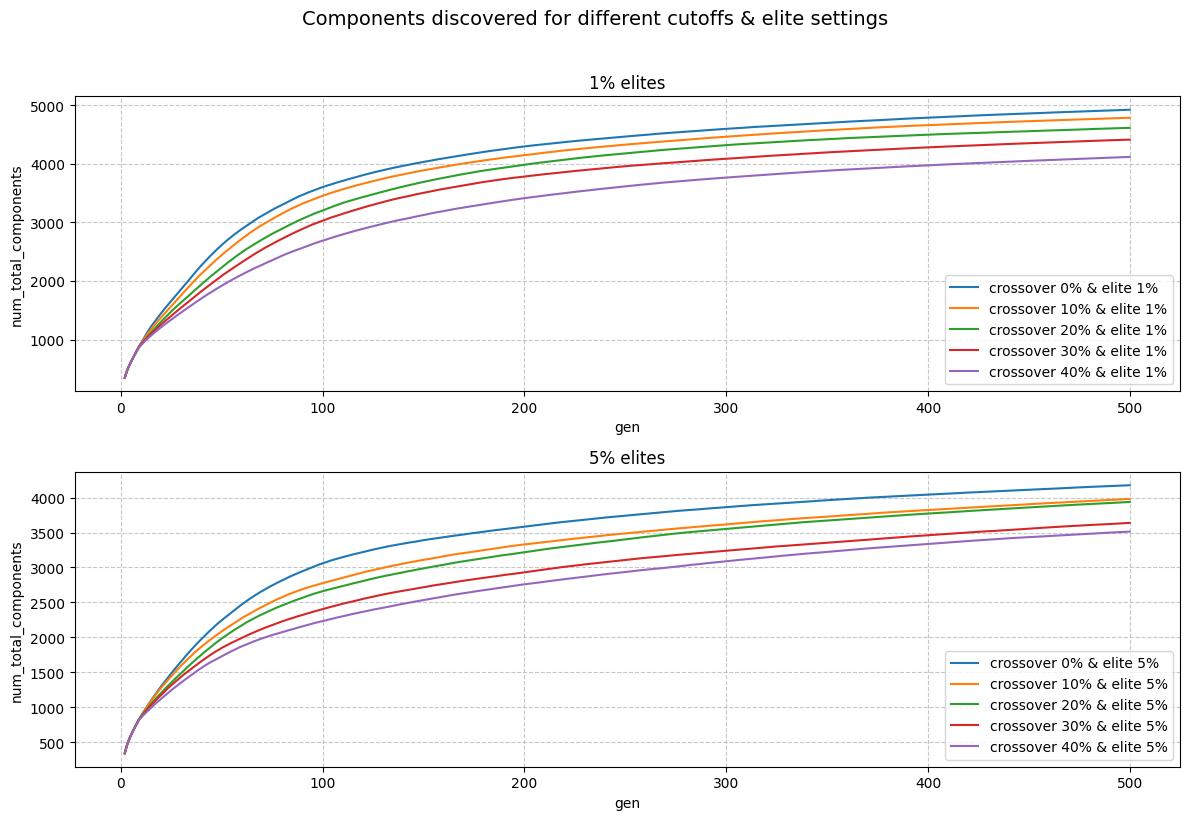

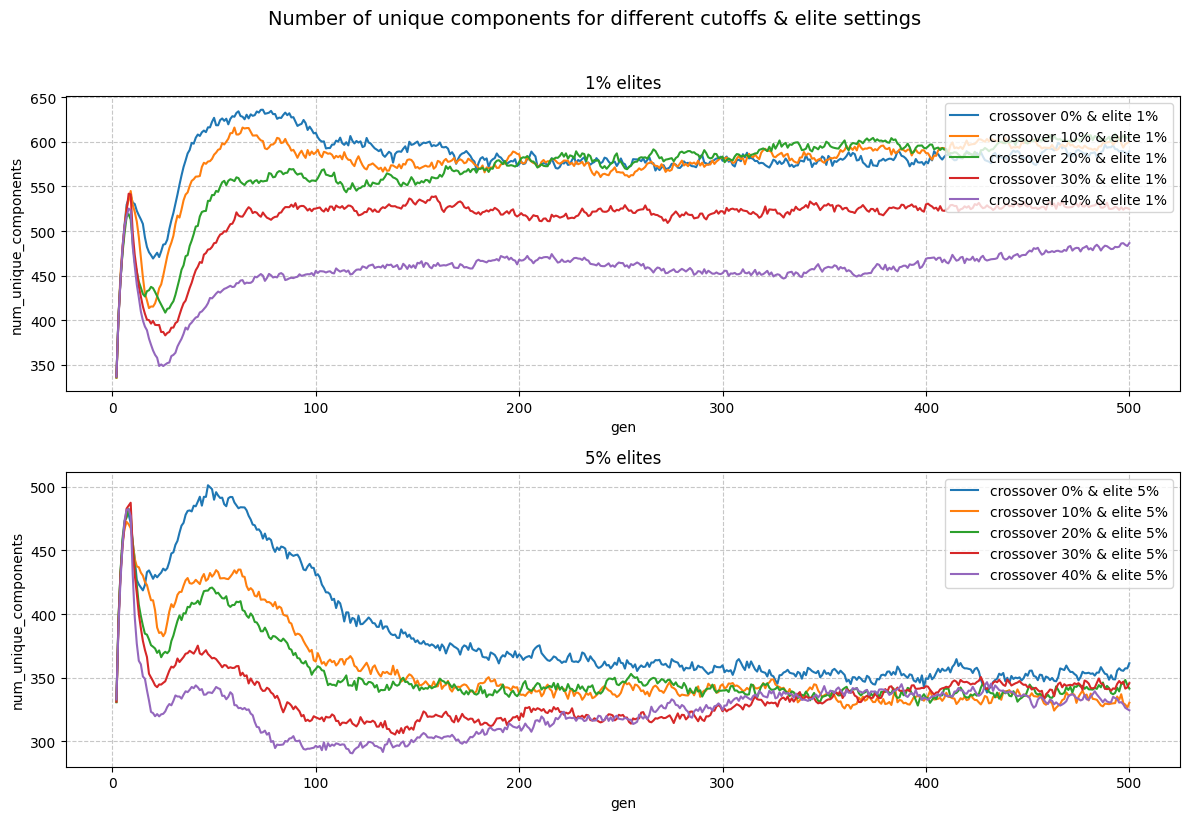

In [14]:
_ = sa.generalized_lineplot(roulette_plt_layout, roulette_data_sources, "num_total_components", title="Components discovered for different cutoffs & elite settings", subplt_titles=["1% elites", "5% elites"])
_ = sa.generalized_lineplot(roulette_plt_layout, roulette_data_sources, "num_unique_components", title="Number of unique components for different cutoffs & elite settings", subplt_titles=["1% elites", "5% elites"], legend_loc="upper right")


 **num components discovered**

 The graphs make the negative relation between crossover and total number of components discovered visible, both for 1% and 5% elitism, increasing the number of crossover spawns leads to fewer components.



 **num unique components per generation**

 Higher crossover rates generally lead to a lower number of unique components. However the effect of elitism on the number of unique components seems stronger, even though it is only a 4% increase, compared to the total 40% delta between highest and lowest crossover rates. At 5% elitism, after 300 generations it barely makes a difference which crossover setting is used, they all plateau at around ~350 components.



 Also, the the curve of unique components per generation is interesting. Since 5% elitism generally leads to quicker convergence on good genomes (as can be seen in the [fitness graphs](#elitism--crossover---fitness)), the decline of unqiue compoents starts earlier in the bottom graph using 5% elitism.

 ### Roulette spawn plots

 As for truncation selection, here I plot the spawn ranks of different setups. Again, I only visualize the setups with 1% elitism

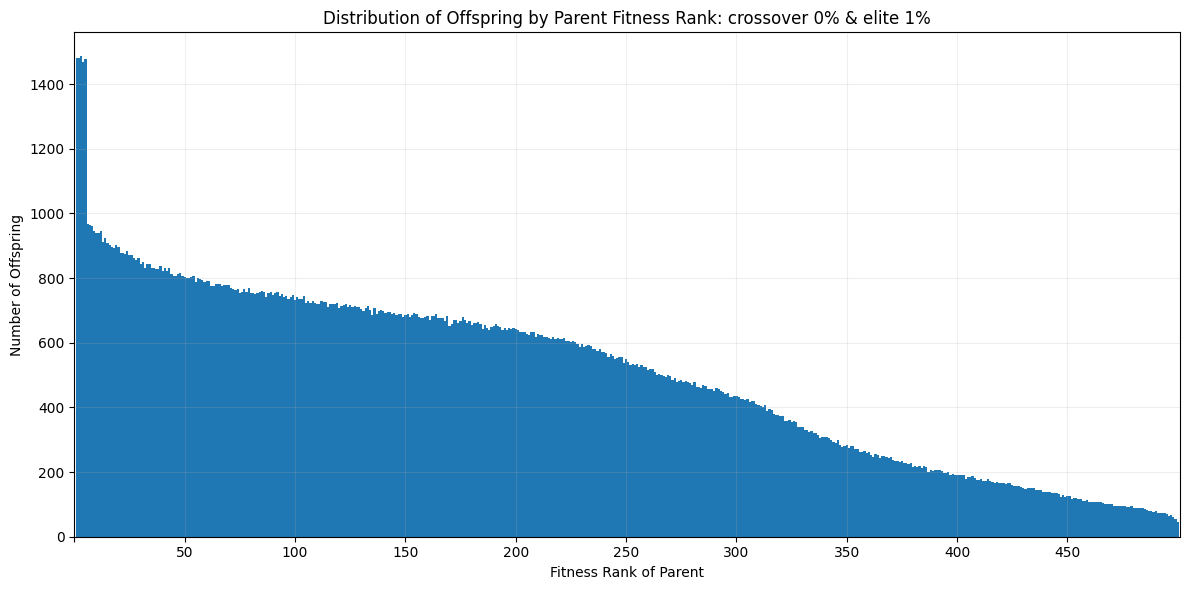

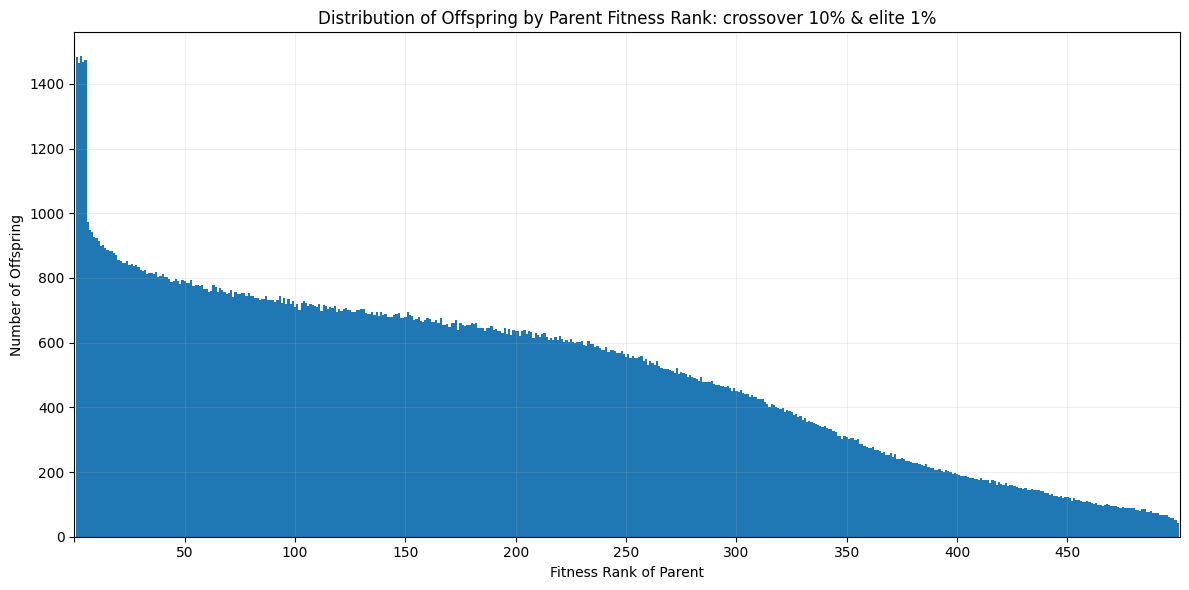

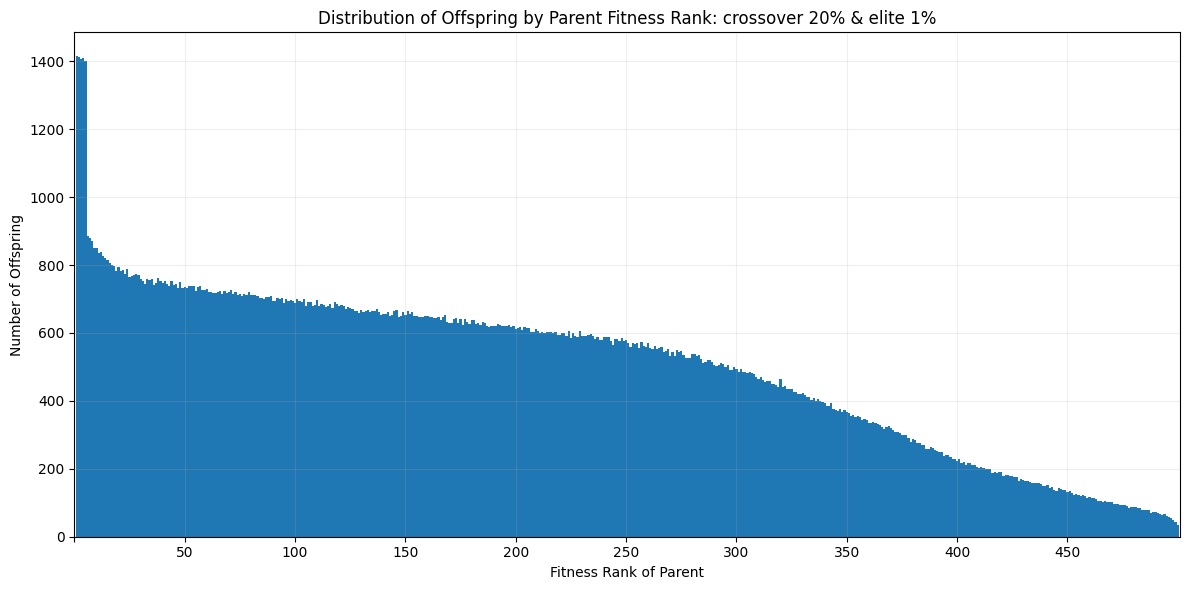

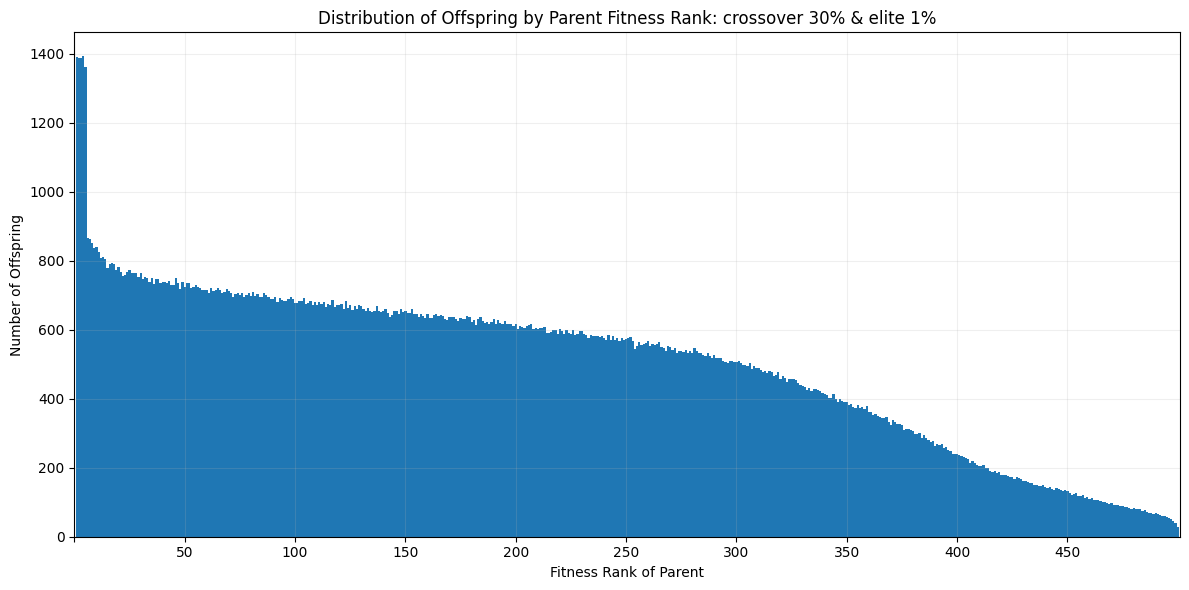

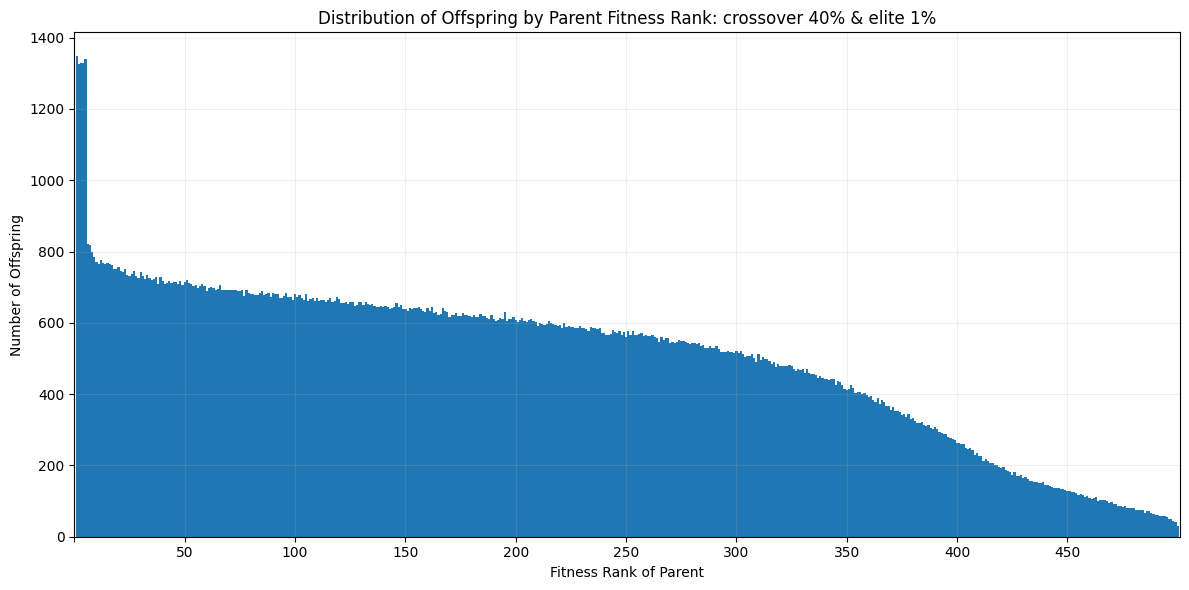

In [15]:
# only plotting 1% elitism
roulette_sr = ["crossover 0% & elite 1%", "crossover 10% & elite 1%", "crossover 20% & elite 1%", "crossover 30% & elite 1%", "crossover 40% & elite 1%"]
roulette_sr_search = {n: roulette_search[n] for n in roulette_sr}

t = 'Distribution of Offspring by Parent Fitness Rank: '
for s_name, s_id in sorted(sa.search_setups(roulette_res, roulette_sr_search).items(), key= lambda x: x[0]):
    rs_data = roulette_res["setups"][s_id[0]]['spawn_rank_agg']
    sa.plot_offspring_distribution(rs_data, title=t+s_name)


 **Spawn rank plot observations**

 On first glance, there is hardly any difference between the plots. However, when looking at them in detail, one can see that with increasing crossover rates, the distribution becomes less heavy on the left side, e.g. with 0% crossover, almost all of the top 50 genomes get to spawn more than 800 offspring over a whole run, while at 40% crossover - with exception of the elite spawns - the top 50 spawn less than 800 genomes on average.



 It thus seems that roulette-based crossover's spawn selection distribution is flatter. Thats about it for the differences between the plots.



 Compared to truncation selection, the roulette's spawn selections' tail reaches all the way to the end of the distribution. It is also a reflection of the distribution of relative fitness among the population, as this is what determines the spawns. Looking at it from this lense, we can see that for the first ~350 genomes, the fitness decreases, but only slightly. After that, the rate of the decline increases a bit. This does not really suggest that the first ~350 genomes are that much fitter than the last ~150 - I would assume they are all pretty bad. **TODO: add reference to best vs. avg. fitness comparisons**. However it does show that the fitness differences within most of the population are pretty small.

 ### Roulette - Overall results comparison

 As a last step, I want to identify the best setup.

 As the fitness plot already shows, the best setup uses 30% crossover with 5% elitism.

In [16]:
roulette_fitness_results = sa.get_best_setups(roulette_res["final_report"])
roulette_fitness_results


shape: (10, 5)
┌───────────┬──────────────┬─────────────┬────────────────┬─────────────┐
│ setupname ┆ mean_fitness ┆ max_fitness ┆ median_fitness ┆ std_fitness │
│ ---       ┆ ---          ┆ ---         ┆ ---            ┆ ---         │
│ str       ┆ f64          ┆ f64         ┆ f64            ┆ f64         │
╞═══════════╪══════════════╪═════════════╪════════════════╪═════════════╡
│ setup_9   ┆ 0.870063     ┆ 0.903509    ┆ 0.894065       ┆ 0.053811    │
│ setup_10  ┆ 0.832869     ┆ 0.903509    ┆ 0.856967       ┆ 0.072317    │
│ setup_8   ┆ 0.819275     ┆ 0.903509    ┆ 0.837828       ┆ 0.069322    │
│ setup_6   ┆ 0.817839     ┆ 0.896825    ┆ 0.814547       ┆ 0.067619    │
│ setup_4   ┆ 0.816489     ┆ 0.903509    ┆ 0.812495       ┆ 0.063141    │
│ setup_5   ┆ 0.815801     ┆ 0.903509    ┆ 0.824509       ┆ 0.071996    │
│ setup_7   ┆ 0.812401     ┆ 0.903509    ┆ 0.810001       ┆ 0.072702    │
│ setup_2   ┆ 0.793853     ┆ 0.903509    ┆ 0.767175       ┆ 0.070014    │
│ setup_1   ┆ 0.782706     ┆ 0.880952    ┆ 0.794814       ┆ 0.058586    │
│ setup_3   ┆ 0.776247     ┆ 0.903509    ┆ 0.741472       ┆ 0.067357    │
└───────────┴──────────────┴─────────────┴────────────────┴─────────────┘

 **Results**

 * Only the top 3 setups managed to discover the optimum process model for the simple log (max fitness = 0.903509), and there is overall a much bigger difference among the setups when compared to truncation selection. The best setup is 4% better than the second best and almost 10% better than the worst.

 * The setups using 5% elitism (6-10) dominate the charts, the best setup with 1% elitism is setup 4 with 1% elitism and 30% crossover in place 5. The only 5% elitism setup that ranks among the 1%ers is setup 7, with a crossover rate of 10% - all other 5%ers do much better.

 * Maybe it would have been interesting to test with more than 5% elitism, but this made the comparison to truncation easier, and vastly reduced the number of setups that I needed to run & test. Also, more than 5% elitism does seem a bit excessive and the results from truncation did not suggest to me that there would have been a benefit in increasing elitism much for the roulette strategy. I think the best setup (9) using 5% elitism with a 30% crossover rate hits the sweet spot

 ### Roulette selection - summarized findings

 In contrast to the truncation selection method, when using roulette there is a clear benefit to elitism. There is also a benefit in using crossover, though that benefit seems to be very unique to the 5% elitism 30% crossover combination. Why it is exactly this combination that hits the sweetspot and not say 5%elite and 20% or 40% crossover is unclear to me at the moment, but it does seem important to have a moderate amount of crossover to mix with the elitism.



 Overall, the efficiency difference between the best truncation & roulette setups does not seem to be that much, with both having very comparable mean, median and stdev values.

 ## Speciation selection



 Didn't change

 * `elitism`: True; False

 * `enough_gens_to_change_things` because this should be more a part of mutation tests and I don't want to f*ck with different mutation rates/ annealing anyways

 * The multipliers for young/old age



 Change

 * `species_boundary`: 0.8, 0.9, 0.95

 * `pop_perc_crossover`: 0.0, 0.1, 0.2, 0.3, 0.4

 * `spawn_cutoff`: 0.1, 0.25, 0.5, 0.75

 * `species_component_pool_size`: 1, 5, 10

 * `allowed_gens_no_improvement`: 50, inf





 This results in 3 * 5 * 4 * 3 * 2 = 360 setups

In [17]:
from importlib import reload # TODO: remove this later
import scripts.helper_scripts.setup_analysis as sa # helper module for fetching setup analysis
reload(sa)
# crawl the results data and load it into a dict
speciation_res = sa.exec_results_crawler("../analysis/data/speciation_test")


Processing setup directories: 370it [00:00, 2565.92it/s]


Found cached results for setup_1
Successfully loaded cached results for setup_1

Found cached results for setup_10
Successfully loaded cached results for setup_10

Found cached results for setup_100
Successfully loaded cached results for setup_100

Found cached results for setup_101
Successfully loaded cached results for setup_101

Found cached results for setup_102
Successfully loaded cached results for setup_102

Found cached results for setup_103
Successfully loaded cached results for setup_103

Found cached results for setup_104
Successfully loaded cached results for setup_104

Found cached results for setup_105
Successfully loaded cached results for setup_105

Found cached results for setup_106
Successfully loaded cached results for setup_106

Found cached results for setup_107
Successfully loaded cached results for setup_107

Found cached results for setup_108
Successfully loaded cached results for setup_108

Found cached results for setup_109
Successfully loaded cached results 

In [18]:
import polars as pl
reload(sa)
speciation_predictors = [
    "species_boundary", "pop_perc_crossover", "spawn_cutoff",
    "species_component_pool_size", "allowed_gens_no_improvement"
    ]

speciation_regression = sa.run_regression(speciation_res, speciation_predictors)



Regression Results for num_components
--------------------------------------------------
R-squared: 0.9313
Adjusted R-squared: 0.9313

Standardized Coefficients:
species_boundary       -13.1653 (p=0.0000)
pop_perc_crossover    -260.3900 (p=0.0000)
spawn_cutoff           927.5552 (p=0.0000)
species_component_pool_size   -30.1037 (p=0.0000)
allowed_gens_no_improvement   -71.9840 (p=0.0000)

Regression Results for max_fitness
--------------------------------------------------
R-squared: 0.0887
Adjusted R-squared: 0.0881

Standardized Coefficients:
species_boundary        -0.0003 (p=0.4135)
pop_perc_crossover       0.0096 (p=0.0000)
spawn_cutoff            -0.0026 (p=0.0000)
species_component_pool_size     0.0008 (p=0.0443)
allowed_gens_no_improvement     0.0000 (p=0.9828)


 Still it seems like the only parameters that have a big impact in terms of components discovered are pop perc crossover and the spawn cutoff.



 And there is barely any effect on the fitness based on chosen parameters.

 This could also just be because the algorithm converges to the same maximum fitness very often, and if it does not reach the maximum fitness, it comes close enough that the floating point deltas barely register as effect.

 Still I can use the significance values to at least see that again the crossover and spawn cutoff are the only ones that really have a measurable impact (even if it is just a very small one).

 The component pool size also has a barely significant impact, taking a p of 0.05.



 I am especially surprised that species extinction has no impact on the fitness at all.

 And extinction of species also leads to lower diversity.

 ### Investigating the effects of num species



 All the params influence how genomes may speciate, and thus the number of species.

 In the following plots, I want to look at the effects of species on performance of the algorithm.

 Because the number of species may fluctuate within a run, I am relying on the number of species in the last generation.



 #### Correlation num species ~ max achieved fitness

 First, A scatterplot of num species vs. max achieved fitness for all setups.

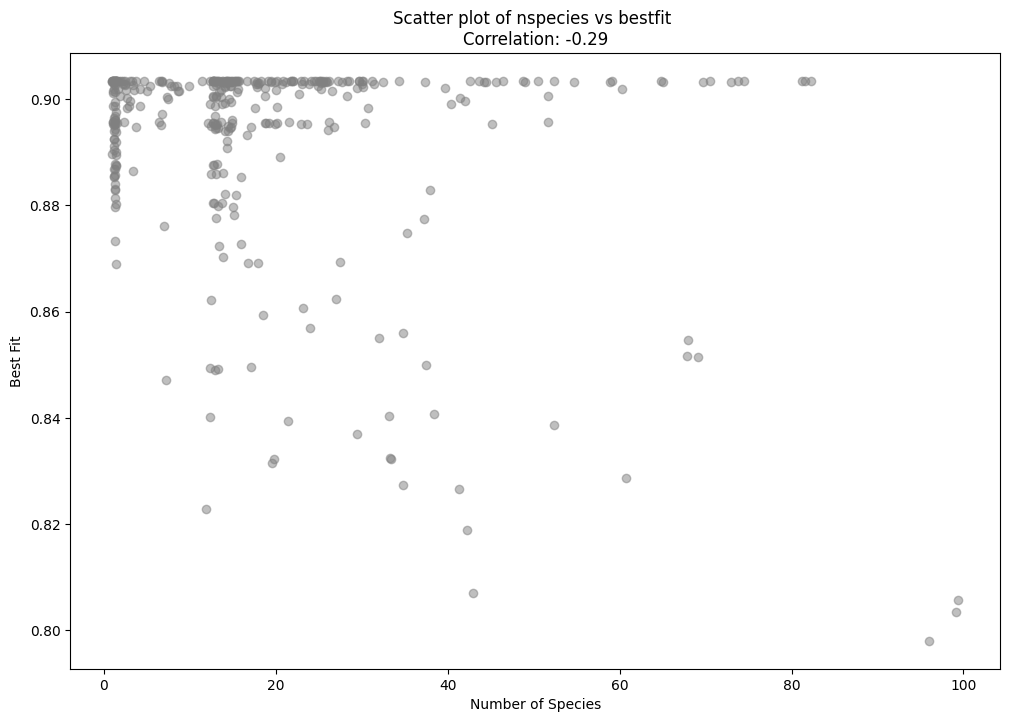

Correlation coefficient: -0.29
P-value: 1.4442724635047046e-08


In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

final_report = speciation_res["final_report"]

nspecies, bestspec, bestfit, nuniquecomp = [], [], [], []
matching_params = []

for sname in final_report["setupname"].unique():
    snum = int(sname.split("_")[1])
    # average stats in the last generation
    last_gen = speciation_res["setups"][snum]["gen_info_agg"][-1]
    nspecies.append(last_gen["num_total_species"][0])
    bestspec.append(last_gen["best_species_avg_fitness"][0])
    bestfit.append(last_gen["best_genome_fitness"][0])
    nuniquecomp.append(last_gen["num_unique_components"][0])
    # params
    p = speciation_res["setups"][snum]["params"]
    matching_params.append({k: p[k] for k in speciation_predictors})

bestfit = np.array(bestfit)
nspecies = np.array(nspecies)
correlation_coefficient, p_value = pearsonr(nspecies, bestfit)

# Plot the scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(nspecies, bestfit, color='grey', alpha=0.5)
plt.title(f'Scatter plot of nspecies vs bestfit \nCorrelation: {correlation_coefficient:.2f}')
plt.xlabel('Number of Species')
plt.ylabel('Best Fit')
plt.show()

print(f'Correlation coefficient: {correlation_coefficient:.2f}')
print(f'P-value: {p_value}')


 It does not seem like there is really any strong correlation between the number of species and the maximum achieved fitness.

 The correlation does seem to be significant though.

 Maybe a non-linear relation, i.e. setups with super small num of species reach lower fitness, but then there is a sweetspot of num species after which the fitness drops again.

 Most observations have 0-20 species.

 Also it is hard to visually differentiate here the super tiny floating-point differences between setups.



 #### Correlation num species ~ best species fitness

 If there are more species, does this lead to a lower maximum achieved species fitness?

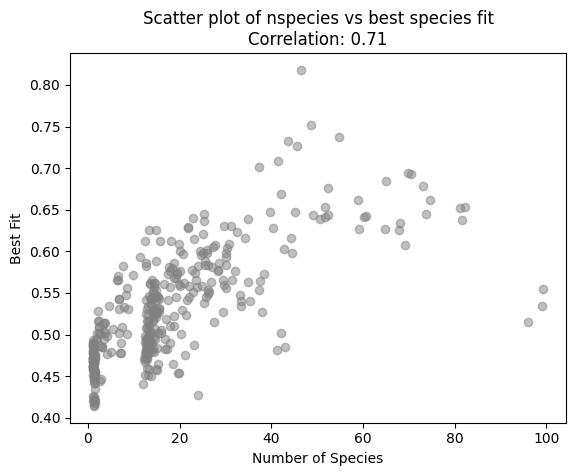

Correlation coefficient: 0.71
P-value: 2.7412345789655757e-56


In [20]:
correlation_coefficient, p_value = pearsonr(nspecies, bestspec)

plt.scatter(nspecies, bestspec, color='grey', alpha=0.5)
plt.title(f'Scatter plot of nspecies vs best species fit\nCorrelation: {correlation_coefficient:.2f}')
plt.xlabel('Number of Species')
plt.ylabel('Best Fit')
plt.show()

print(f'Correlation coefficient: {correlation_coefficient:.2f}')
print(f'P-value: {p_value}')


 While the correlation is significant and positive, it does seem to be nonlinear, with a peak around 50 species.

 However the best species average fitness tells us nothing about the overall maximum fitness.

 For completeness sake, lets check if the best average species fitness correlates with a higher fitness

 #### Correlation num species ~ num unqiue components

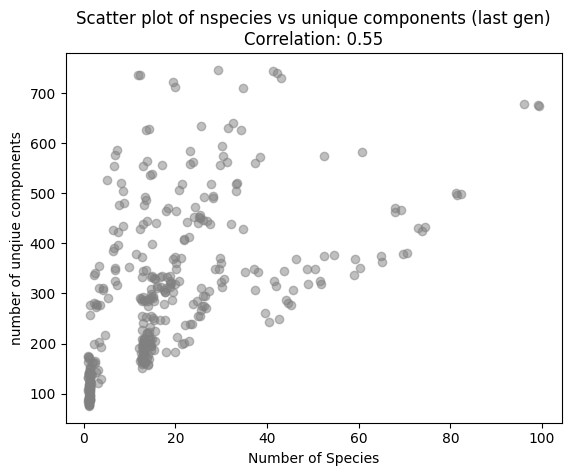

Correlation coefficient: 0.55
P-value: 1.4757861792039134e-29


In [21]:
correlation_coefficient, p_value = pearsonr(nspecies, nuniquecomp)

plt.scatter(nspecies, nuniquecomp, color='grey', alpha=0.5)
plt.title(f'Scatter plot of nspecies vs unique components (last gen)\nCorrelation: {correlation_coefficient:.2f}')
plt.xlabel('Number of Species')
plt.ylabel('number of unqiue components')
plt.show()

print(f'Correlation coefficient: {correlation_coefficient:.2f}')
print(f'P-value: {p_value}')


 While there are other factors which influence the number of unique components (my measure of diversity), **the diversity in the population increases with the number of species**.

 No increase in the number of species leads to a decrease in unique components,  which means that **speciation increases diversity**.

 The p value is also significant.



 #### Correlation Best avg species fit ~ max fit

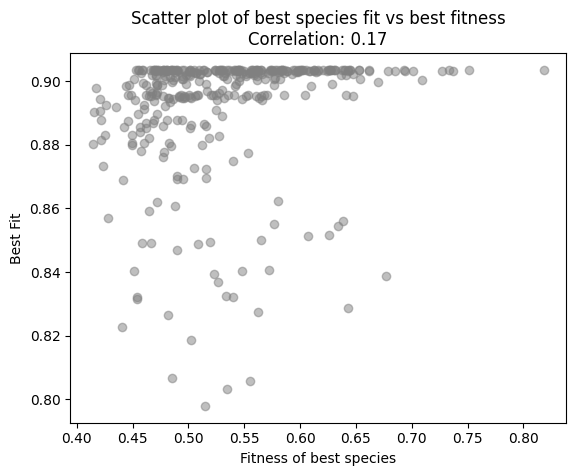

Correlation coefficient: 0.17
P-value: 0.0009345991793022897


In [22]:
correlation_coefficient, p_value = pearsonr(bestspec, bestfit)

plt.scatter(bestspec, bestfit, color='grey', alpha=0.5)
plt.title(f'Scatter plot of best species fit vs best fitness\nCorrelation: {correlation_coefficient:.2f}')
plt.xlabel('Fitness of best species')
plt.ylabel('Best Fit')
plt.show()

print(f'Correlation coefficient: {correlation_coefficient:.2f}')
print(f'P-value: {p_value}')


 Not really interesting. How many species are there in out setups even?

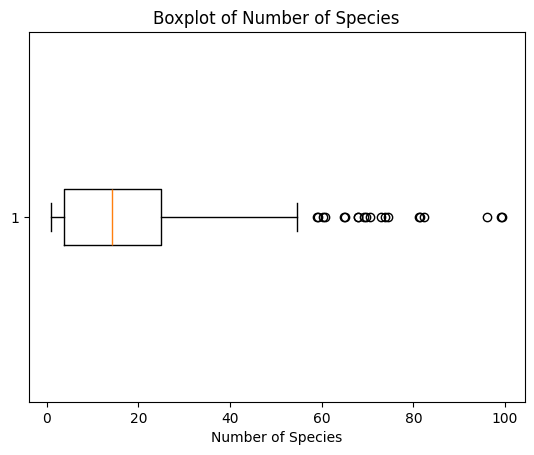

Five-number summary of Number of Species:
Minimum: 1.0
First Quartile (Q1): 3.75
Median: 14.175
Third Quartile (Q3): 24.924999999999997
Maximum: 99.35


In [23]:
plt.boxplot(nspecies, vert=False)
plt.title('Boxplot of Number of Species')
plt.xlabel('Number of Species')
plt.show()

# Calculate the five-number summary
min_val = np.min(nspecies)
q1 = np.percentile(nspecies, 25)
median = np.median(nspecies)
q3 = np.percentile(nspecies, 75)
max_val = np.max(nspecies)

# Print the five-number summary
print("Five-number summary of Number of Species:")
print(f"Minimum: {min_val}")
print(f"First Quartile (Q1): {q1}")
print(f"Median: {median}")
print(f"Third Quartile (Q3): {q3}")
print(f"Maximum: {max_val}")


 Okay, so the last quartile reaches to a bit less than fifty, with the median at 14. Left skewed distribution.

 But this is not really that interesting, it just depends on the parameters I have chosen.



 #### How parameters affect the number of species in the last gen

 Here I will look at how the different paramters affect the number of species in the last generation.

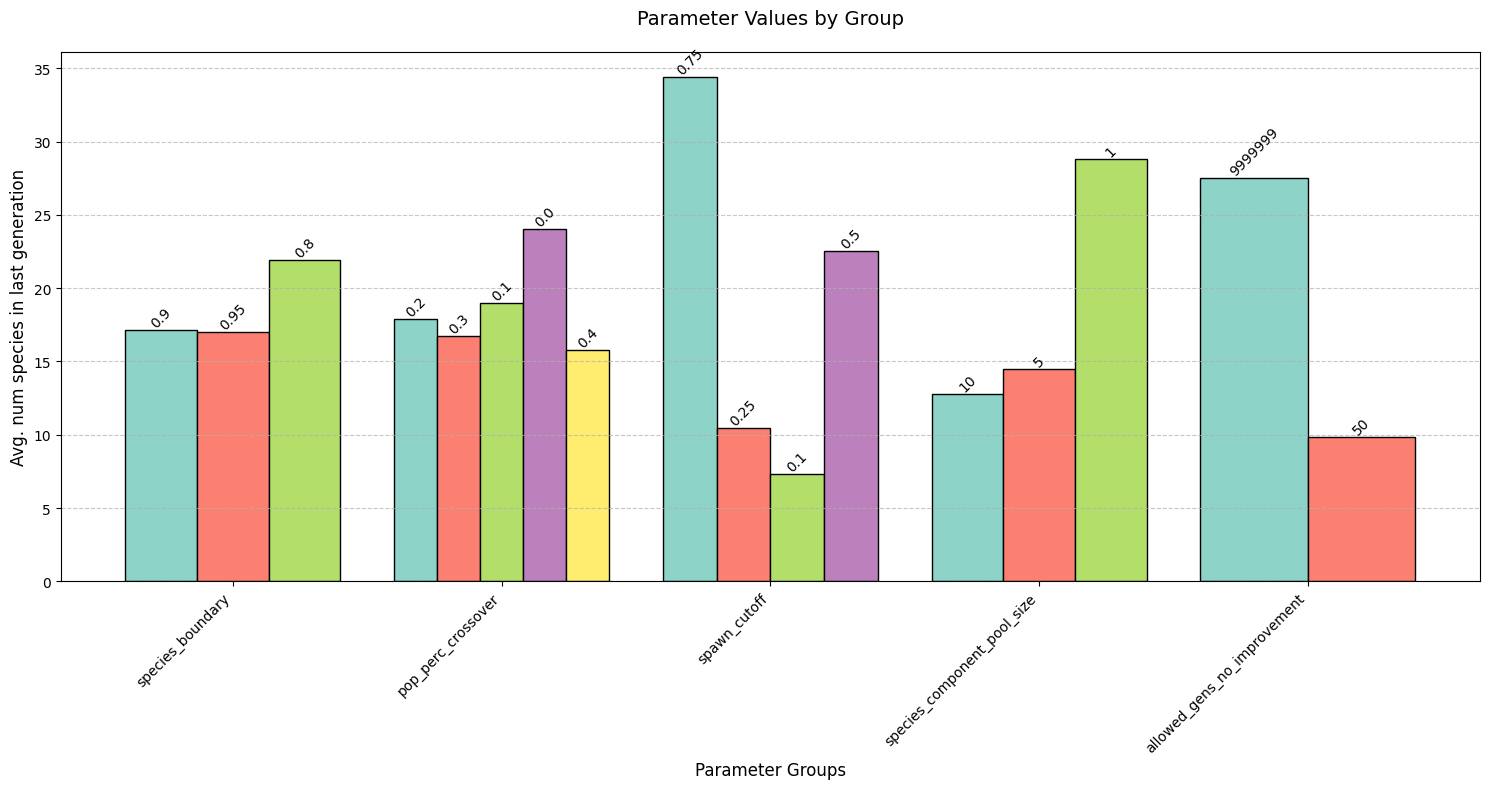

In [24]:
from statistics import mean
from pprint import pprint

pres = {p: {} for p in speciation_predictors}

for params, nspec in zip(matching_params, nspecies):
    for p, val in params.items():
        if val not in pres[p]:
            pres[p][val] = [nspec]
        else:
            pres[p][val].append(nspec)

for p in pres:
    for val in pres[p]:
        l = pres[p][val]
        pres[p][val] = mean(l)

data = pres

plt.figure(figsize=(15, 8))
ax = plt.gca()

# Define color palette for bars within groups
colors = plt.cm.Set3(np.linspace(0, 1, max(len(subdict) for subdict in data.values())))

# Calculate positions for groups and bars
comparison_groups = list(data.keys())
group_positions = np.arange(len(comparison_groups))
bar_width = 0.8  # Total width for each group
    
# Plot bars for each group
for i, (group_name, group_data) in enumerate(data.items()):
    # Calculate number of bars in this group
    n_bars = len(group_data)
    individual_bar_width = bar_width / n_bars
    
    # Get the keys and values
    keys = list(group_data.keys())
    values = list(group_data.values())
    
    # Calculate positions for individual bars within group
    bar_positions = np.linspace(
        group_positions[i] - bar_width/2 + individual_bar_width/2,
        group_positions[i] + bar_width/2 - individual_bar_width/2,
        n_bars
    )
    
    # Plot bars with different colors and black edges
    bars = plt.bar(bar_positions, values, 
                  width=individual_bar_width,
                  color=colors[:n_bars],
                  edgecolor='black',
                  linewidth=1)
    
    # Add key labels on top of each bar
    for bar, key in zip(bars, keys):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{key}',  # Show key instead of value
                ha='center', va='bottom', rotation=45)

# Customize the plot
plt.title('Parameter Values by Group', pad=20, size=14)
plt.xlabel('Parameter Groups', size=12)
plt.ylabel('Avg. num species in last generation', size=12)

# Set x-axis ticks and labels
plt.xticks(group_positions, comparison_groups, rotation=45, ha='right')

# Add grid for better readability
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()



 seems the parameters with the biggest effect on the number of species in the last generation are the spawn cutoff, component pool size and allowed gens no improvement.



 ### Speciation - overall results

 This time, I'm looking at the run results first before further comparing the many parameters present.

In [25]:
speciation_fitness_results = sa.get_best_setups(speciation_res["final_report"])
n_full_converge = len(speciation_fitness_results.filter(pl.col("std_fitness")==0))
print("number of setups where every run converged to max fit:\n", n_full_converge)
speciation_fitness_results.head(105)


number of setups where every run converged to max fit:
 103


shape: (105, 5)
┌───────────┬──────────────┬─────────────┬────────────────┬─────────────┐
│ setupname ┆ mean_fitness ┆ max_fitness ┆ median_fitness ┆ std_fitness │
│ ---       ┆ ---          ┆ ---         ┆ ---            ┆ ---         │
│ str       ┆ f64          ┆ f64         ┆ f64            ┆ f64         │
╞═══════════╪══════════════╪═════════════╪════════════════╪═════════════╡
│ setup_153 ┆ 0.903509     ┆ 0.903509    ┆ 0.903509       ┆ 0.0         │
│ setup_293 ┆ 0.903509     ┆ 0.903509    ┆ 0.903509       ┆ 0.0         │
│ setup_308 ┆ 0.903509     ┆ 0.903509    ┆ 0.903509       ┆ 0.0         │
│ setup_34  ┆ 0.903509     ┆ 0.903509    ┆ 0.903509       ┆ 0.0         │
│ setup_68  ┆ 0.903509     ┆ 0.903509    ┆ 0.903509       ┆ 0.0         │
│ …         ┆ …            ┆ …           ┆ …              ┆ …           │
│ setup_155 ┆ 0.903509     ┆ 0.903509    ┆ 0.903509       ┆ 0.0         │
│ setup_232 ┆ 0.903509     ┆ 0.903509    ┆ 0.903509       ┆ 0.0         │
│ setup_81  ┆ 0.903509     ┆ 0.903509    ┆ 0.903509       ┆ 0.0         │
│ setup_118 ┆ 0.903175     ┆ 0.903509    ┆ 0.903509       ┆ 0.001494    │
│ setup_297 ┆ 0.903175     ┆ 0.903509    ┆ 0.903509       ┆ 0.001494    │
└───────────┴──────────────┴─────────────┴────────────────┴─────────────┘

 ok this is kinda crazy... The top 103 setups converged in all 20 runs to the same maximum fitness. That is actually way better than the other selection strategies.



 ### Which params lead to perfect convergence?



 The below plot filters the setups based on the stdev of the fitness of all their runs.

 If a setup achieved the same fitness across all runs, it's stdev is 0.

 This only happens when all 20 runs reach the maximum fitness.

 Thus I split the results dataframe in two sets, one where all runs had stdev 0 (i.e. they reached max fitness), and those that did not.

 **disclaimer:** Of course this is far from perfect, because a setup might have a really high fraction of perfect runs but just does not make the cut, e.g. 19/20.

 Probably every one of the setups will at some point not reach the maximum fitness (I tried setup 34 for 40 runs, it achieved 39/40 runs max fitness).



 In short, this plot shows the fraction of setups that converged perfectly based on param setting



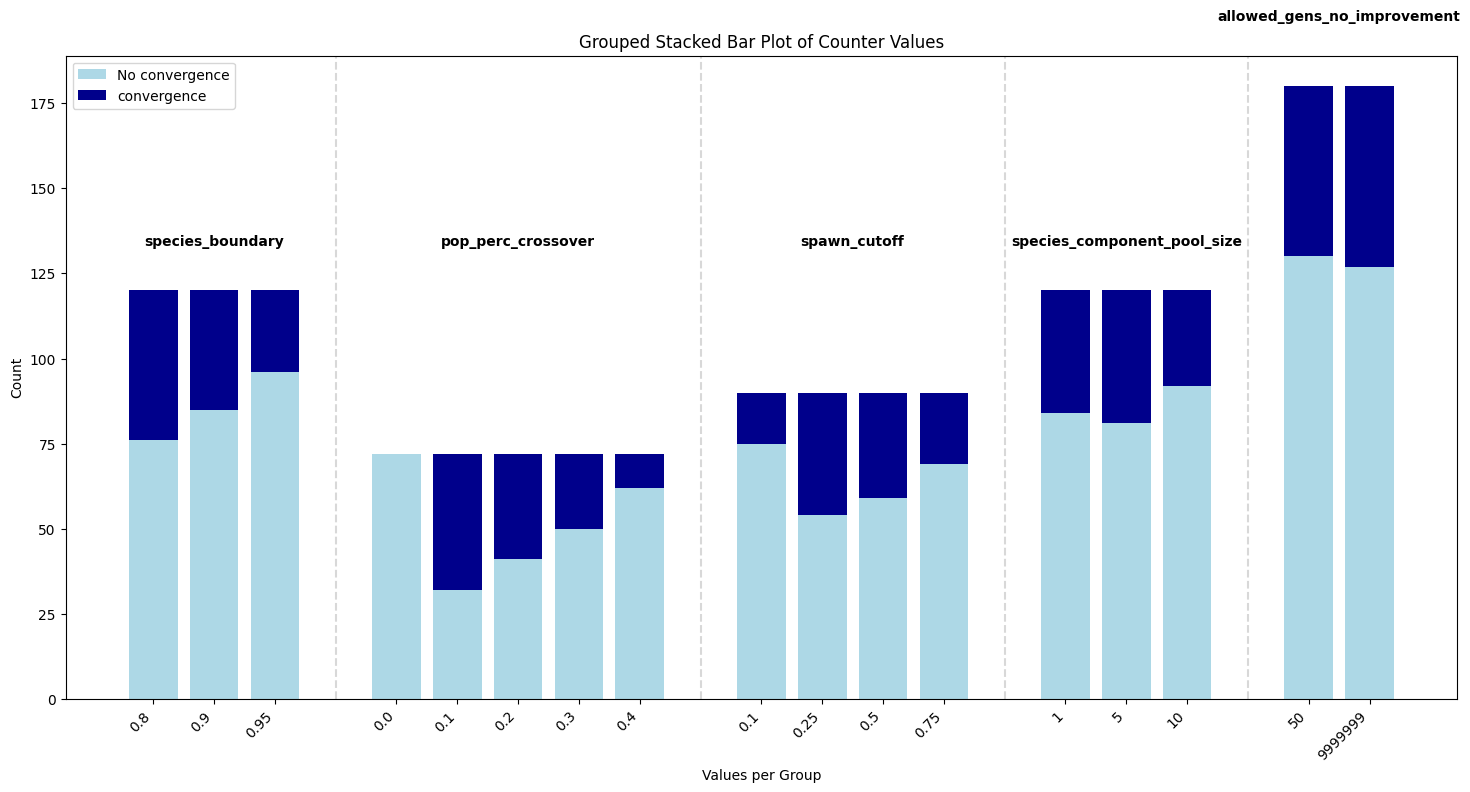

In [26]:
from collections import Counter

# takes in aggregated results df
def get_params_for_setups(df):
    used_params = {p: Counter() for p in speciation_predictors}
    for row in df.iter_rows(named=True):
        snum = int(row["setupname"].split("_")[1])
        cur_params = speciation_res["setups"][snum]["params"]
        # add all the used param values
        # also add frequencies
        for pred in speciation_predictors:
            used_params[pred][cur_params[pred]] += 1
    return used_params

conv_params = get_params_for_setups(speciation_fitness_results.filter(pl.col("std_fitness")==0))
noconv_params = get_params_for_setups(speciation_fitness_results.filter(pl.col("std_fitness")!=0))

def plot_stacked_counters(dict1, dict1_name, dict2, dict2_name):
    plt.figure(figsize=(15, 8))

    group_names = list(dict1.keys())

    current_x = 0
    xticks = []
    xtick_labels = []

    for group_name in group_names:
        # Get all unique keys in both counters for this group
        all_keys = sorted(set(list(dict1[group_name].keys()) + list(dict2[group_name].keys())))
        
        # Get values for each counter, using 0 if key doesn't exist
        values1 = [dict1[group_name].get(k, 0) for k in all_keys]
        values2 = [dict2[group_name].get(k, 0) for k in all_keys]
        
        # Create bars
        x = np.arange(len(all_keys)) + current_x
        plt.bar(x, values1, width=0.8, 
                label=f'{dict1_name}' if current_x == 0 else "", 
                color='lightblue')
        plt.bar(x, values2, width=0.8, bottom=values1, 
                label=f'{dict2_name}' if current_x == 0 else "", 
                color='darkblue')
        
        # Add group label above bars
        group_center = x.mean()
        plt.text(group_center, plt.ylim()[1] * 1.05, group_name, 
                ha='center', va='bottom', fontsize=10, fontweight='bold')
        
        # Store positions for xticks
        xticks.extend(x)
        xtick_labels.extend([str(k) for k in all_keys])
        
        # Update current_x for next group
        current_x = x[-1] + 2

    # Add vertical lines between groups
    group_boundaries = []
    current_x = 0
    for group_name in group_names:
        keys = sorted(set(list(dict1[group_name].keys()) + list(dict2[group_name].keys())))
        current_x += len(keys)
        if current_x < len(xticks):
            group_boundaries.append((xticks[current_x-1] + xticks[current_x])/2)
            
    for boundary in group_boundaries:
        plt.axvline(x=boundary, color='gray', linestyle='--', alpha=0.3)

    # Customize the plot
    plt.xlabel('Values per Group')
    plt.ylabel('Count')
    plt.title('Grouped Stacked Bar Plot of Counter Values')
    plt.xticks(xticks, xtick_labels, rotation=45, ha='right')
    plt.legend()
    plt.subplots_adjust(top=0.85)
    plt.tight_layout()
    
    return plt.gcf()

fig = plot_stacked_counters(noconv_params, "No convergence", conv_params, "convergence")
plt.show()



 when comparing the frequencies, it seems like the parameter that matters the most is pop_perc_crossover.

 Some crossover is needed for full convergence, but increasing beyond 10% crossover does not yield better results.

 This non-linear relation cannot be captured by the linear regression, which indicates only modest performance increase with increasing crossover rates.

 This does not reflect the actual data, where going beyond 10% is detrimental.



 furthermore, a low species boundary of 0.8 is beneficial, however the component pool size does not seem to be very important, which is curious because those two parameters both influence the number of species.

 For the spawn-cutoff within species there also seems to be a nonlinear relationship, where a very low cutoff of 10% is worse than the best value of 25% - after which the ratio of non-converging setups increases again.

 Species extinction does not seem to have a big effect.



 If I eye-ball the perfect setup based on this information, it would be speciation selection with:

 * species_boundary: 0.8

 * pop_perc_crossover: 0.1

 * spawn_cutoff: 0.25

 * species_component_pool_size: 5

 * allowed_gens_no_improvement: inf



 which would correspond to Setup 34 in those runs

 ### Interaction species boundary ~ component pool size on absolute fitness and number of components at the end of run

 This time, there are only two parameters that were tested, meaning I can easily visualize their effects using simple barplots. Thus there are also no aggregations of the other parameter settings as was the case with elitism/crossover in truncation visualizations.

An error occurred: unable to append to a DataFrame of width 47 with a DataFrame of width 50
this was most likely because there are missing columns in one of the dataframes, will use diagonal join
An error occurred: unable to append to a DataFrame of width 47 with a DataFrame of width 50
this was most likely because there are missing columns in one of the dataframes, will use diagonal join
An error occurred: unable to append to a DataFrame of width 50 with a DataFrame of width 47
this was most likely because there are missing columns in one of the dataframes, will use diagonal join
An error occurred: unable to append to a DataFrame of width 47 with a DataFrame of width 50
this was most likely because there are missing columns in one of the dataframes, will use diagonal join
An error occurred: unable to append to a DataFrame of width 47 with a DataFrame of width 50
this was most likely because there are missing columns in one of the dataframes, will use diagonal join
An error occurred: u

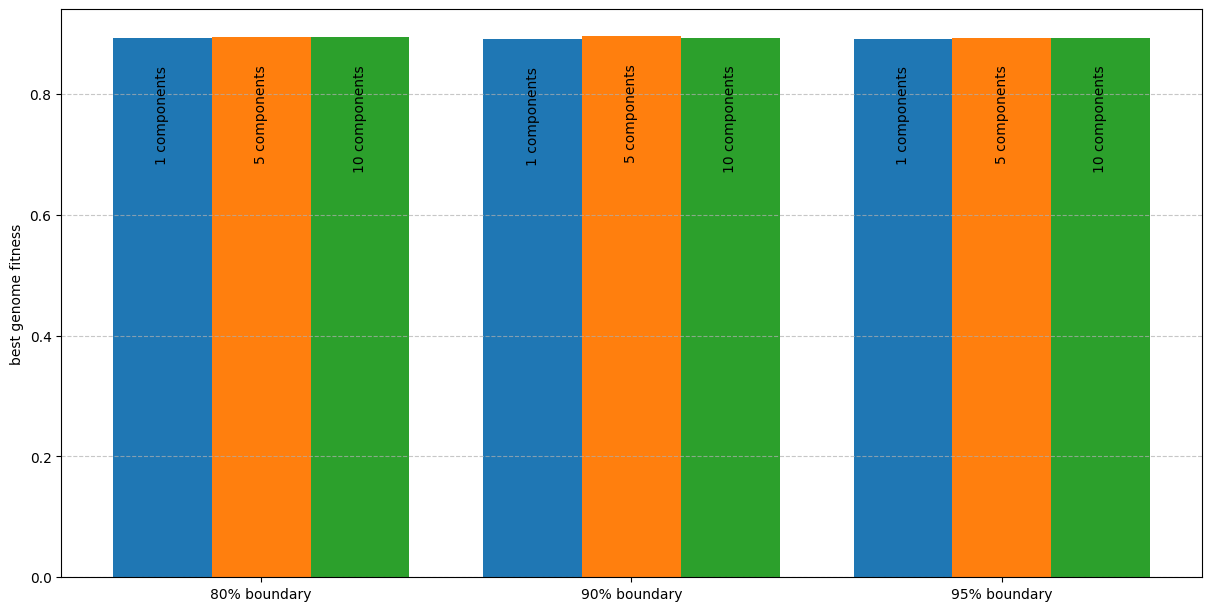

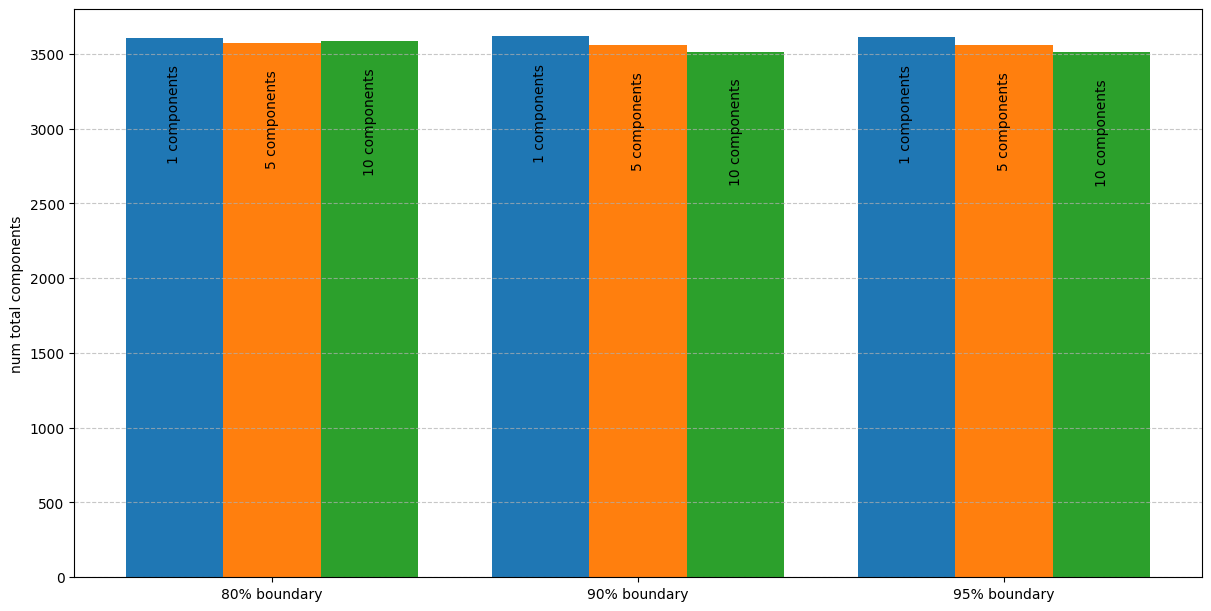

In [27]:
speciation_search1 = {
    "boundary 80% &  1 components": {"species_boundary": 0.80, "species_component_pool_size": 1}, "boundary 80% &  5 components": {"species_boundary": 0.80, "species_component_pool_size": 5}, "boundary 80% & 10 components": {"species_boundary": 0.80, "species_component_pool_size": 10},
    "boundary 90% &  1 components": {"species_boundary": 0.90, "species_component_pool_size": 1}, "boundary 90% &  5 components": {"species_boundary": 0.90, "species_component_pool_size": 5}, "boundary 90% & 10 components": {"species_boundary": 0.90, "species_component_pool_size": 10},
    "boundary 95% &  1 components": {"species_boundary": 0.95, "species_component_pool_size": 1}, "boundary 95% &  5 components": {"species_boundary": 0.95, "species_component_pool_size": 5}, "boundary 95% & 10 components": {"species_boundary": 0.95, "species_component_pool_size": 10}
}


speciation_plt_layout1 = [
    ["boundary 80% &  1 components", "boundary 80% &  5 components", "boundary 80% & 10 components"],
    ["boundary 90% &  1 components", "boundary 90% &  5 components", "boundary 90% & 10 components"],
    ["boundary 95% &  1 components", "boundary 95% &  5 components", "boundary 95% & 10 components"]
]

 
strip_first_param = lambda l: l.split('&')[1].strip().split('\n')[0] # lambda to be applied on labels
speciation_data_sources1 = sa.search_and_aggregate_param_results(speciation_res, speciation_search1)
grp_titles1 = ["80% boundary", "90% boundary", "95% boundary"]
_ = sa.generalized_barplot(speciation_plt_layout1, speciation_data_sources1, "best_genome_fitness", title="", group_titles=grp_titles1, label_lambda=strip_first_param)
_ = sa.generalized_barplot(speciation_plt_layout1, speciation_data_sources1, "num_total_components", title="", group_titles=grp_titles1, label_lambda=strip_first_param)


 while the boundary and component pool size certainly affect the number of species, neither seem to really have an effect on either fitness or the number of components.

 I would have intuited that a lower number of species -> bigger species -> more selection pressure within a species (spawn cutoff) -> lower diversity/fewer components.

 But it seems like this is not the case.



 The only other thing I noticed is that even when averaging out the crossover rates (as is the case here), I expected speciation to discover more components.



 Maybe the lineplots are interesting...



 ### boundary ~ component pool size - fitness

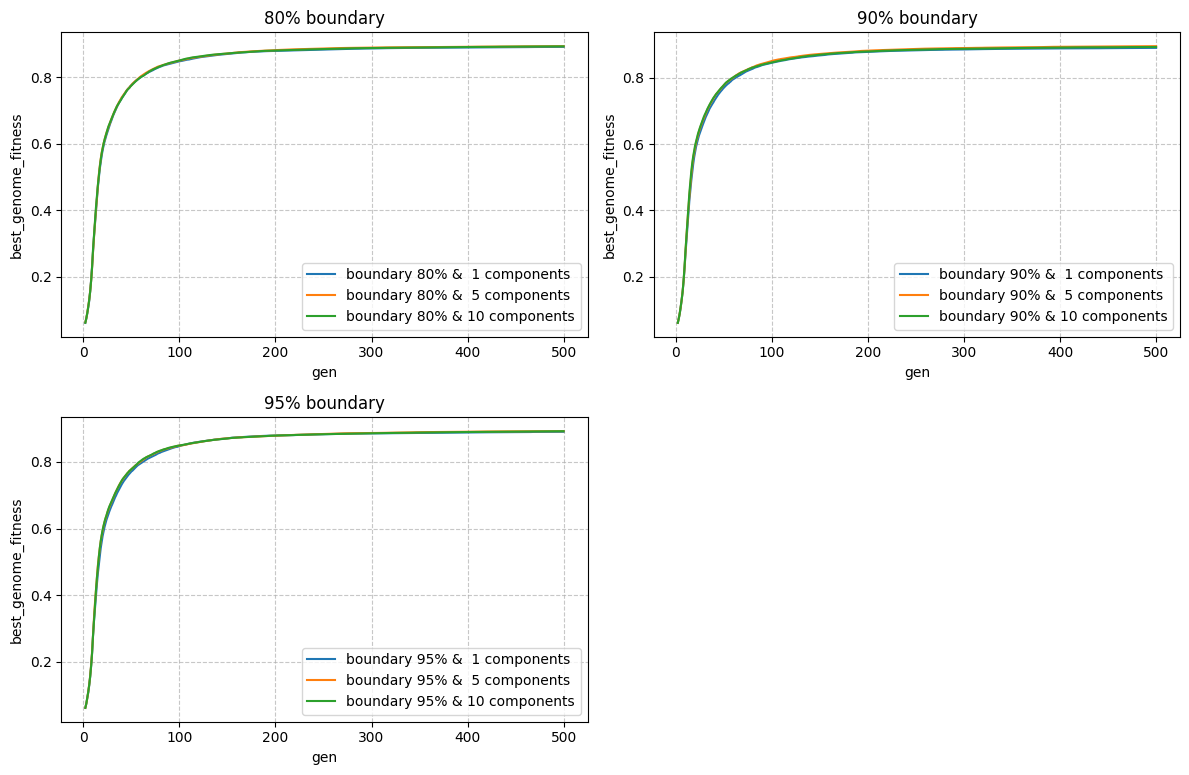

In [28]:
_ = sa.generalized_lineplot(speciation_plt_layout1, speciation_data_sources1, "best_genome_fitness", title="", subplt_titles=grp_titles1)


 nothing of note here, the fitness curve looks the same



 ### boundary ~ component pool size - components & species

 lets look at the number of components and number of unique components with different boundary and component pool sizes



 I will also plot the number of species over time

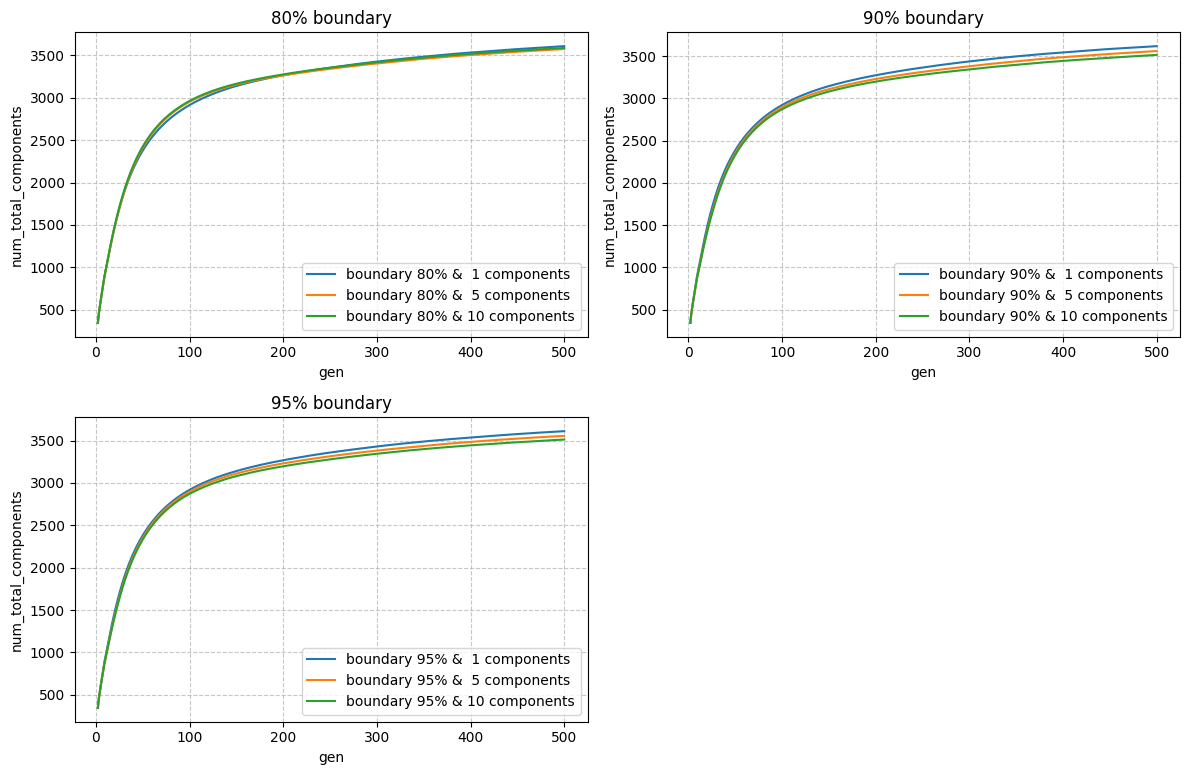

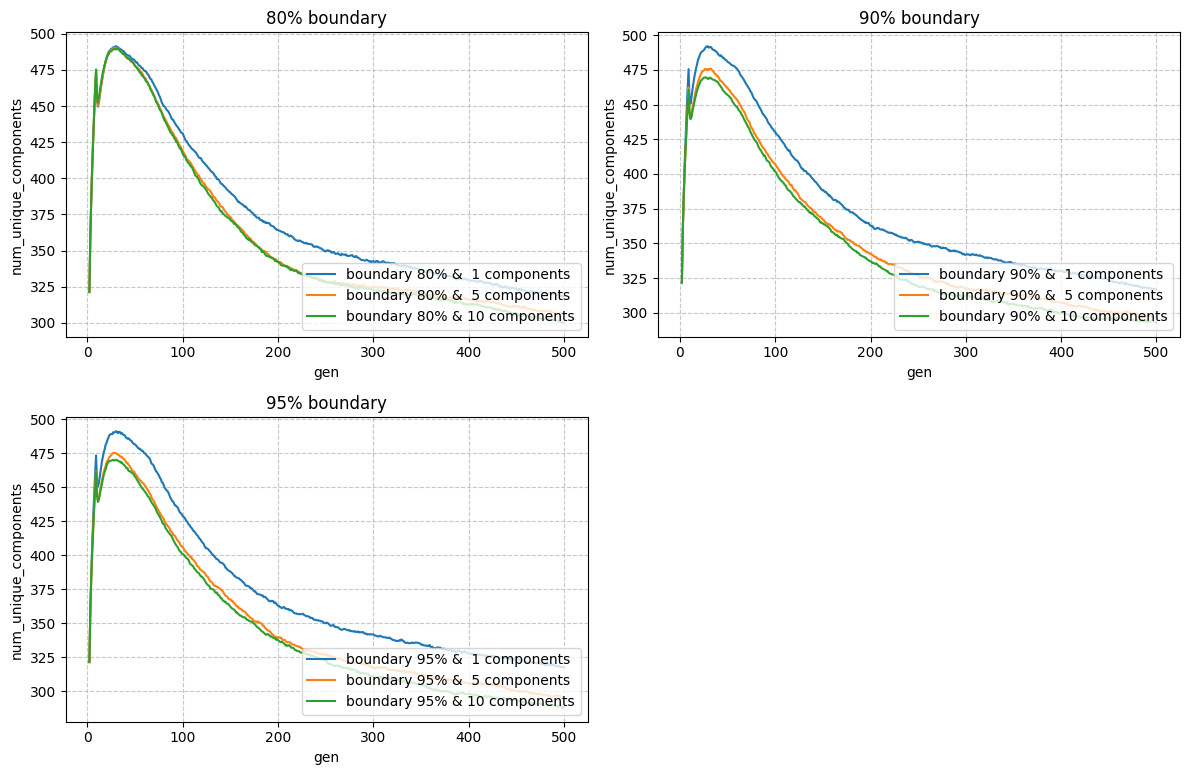

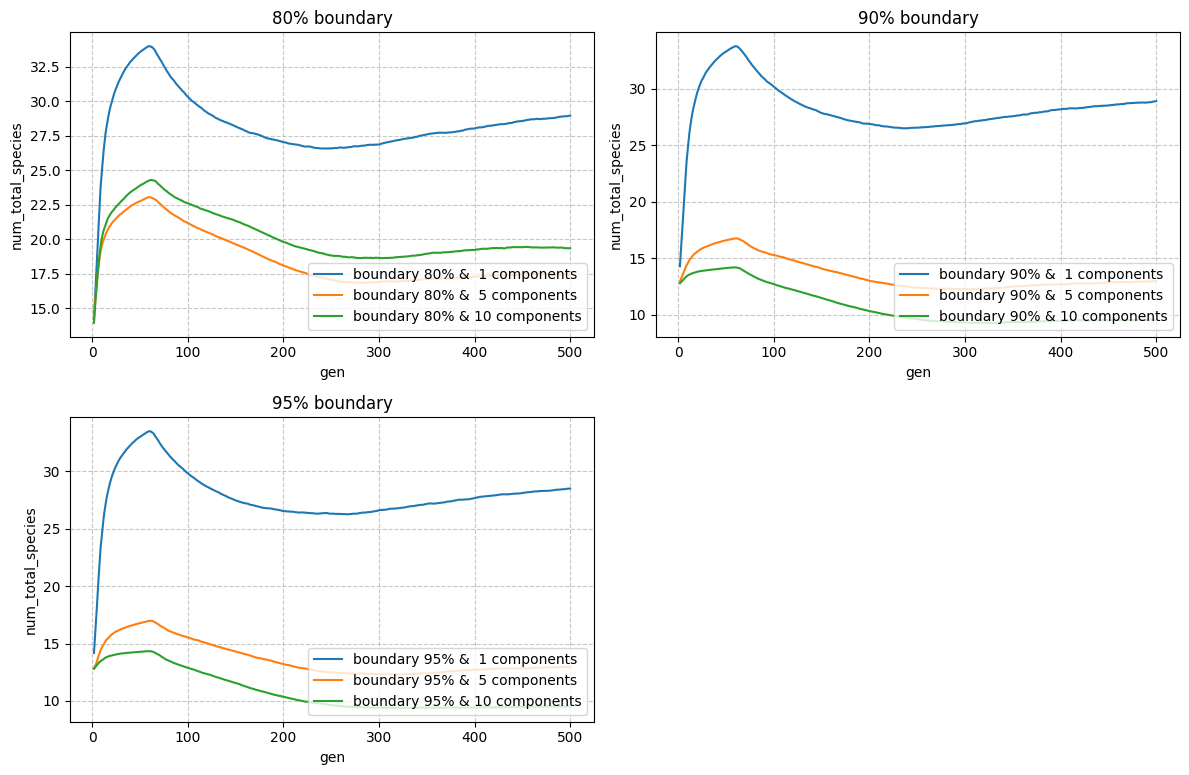

In [29]:
_ = sa.generalized_lineplot(speciation_plt_layout1, speciation_data_sources1, "num_total_components", title="", subplt_titles=grp_titles1)
_ = sa.generalized_lineplot(speciation_plt_layout1, speciation_data_sources1, "num_unique_components", title="", subplt_titles=grp_titles1)
_ = sa.generalized_lineplot(speciation_plt_layout1, speciation_data_sources1, "num_total_species", title="", subplt_titles=grp_titles1)


 **Total num components**

 None of the graphs for the total number of components show a big difference.



 **Num unique components**

 Here the only visible change is that a component pool of size 1 preserves a higher number of unique components for longer.

 A component pool size of one means that a new genome that is spawned is only compared to the species representative (=leader, i.e. genome with the highest fitness in the species).

 With higher component pool sizes, a higher number of genomes is randomly chosen (+ the leader) to compare to, thus increasing the likelihood that the genome will be compatible with it's current species (or any other species).



 **Num total species**

 Interestingly, the boundary does not really affect the peak number of species when just using one representative to compare to, however it does affect the 5 and 10 representative setups more.

 For a boundary of 80%, the peak of 5/10 lies at around 23 species, for 90% and 95% it sits around 15.

 However the most notable result here is that comparing to just one genome does lead to an increase in species, as the 1 component/blue line has quite a lot of separation to the the other two setups.

 ### Interaction crossover ~ cutoff on absolute fitness and number of components at the end of run

 This time, there are only two parameters that were tested, meaning I can easily visualize their effects using simple barplots. Thus there are also no aggregations of the other parameter settings as was the case with elitism/crossover in truncation visualizations.

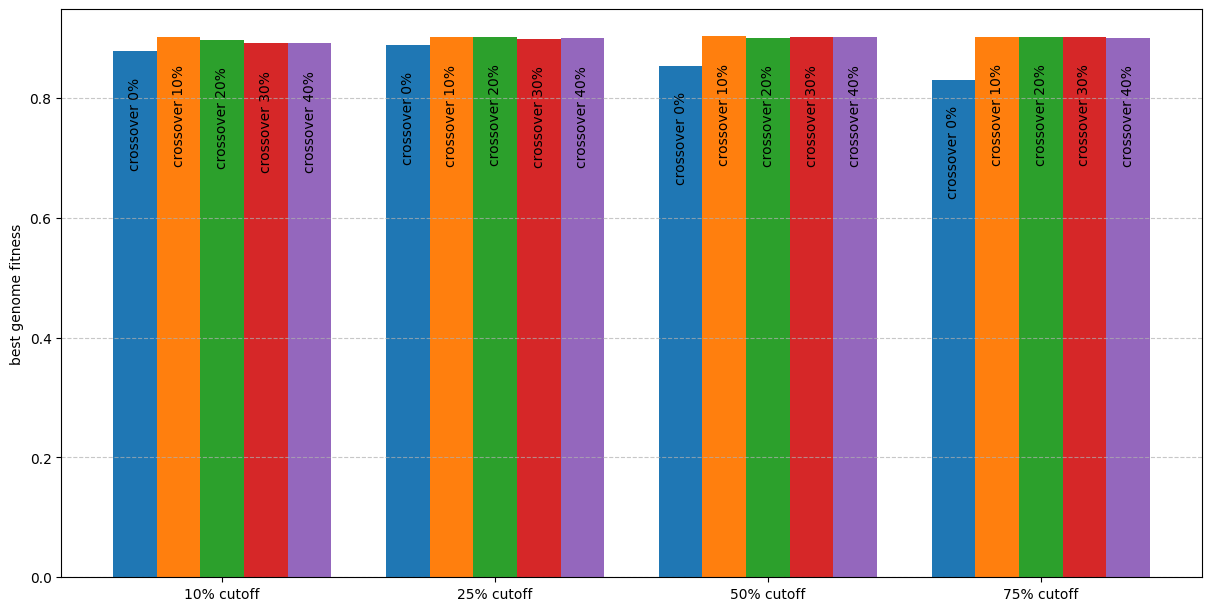

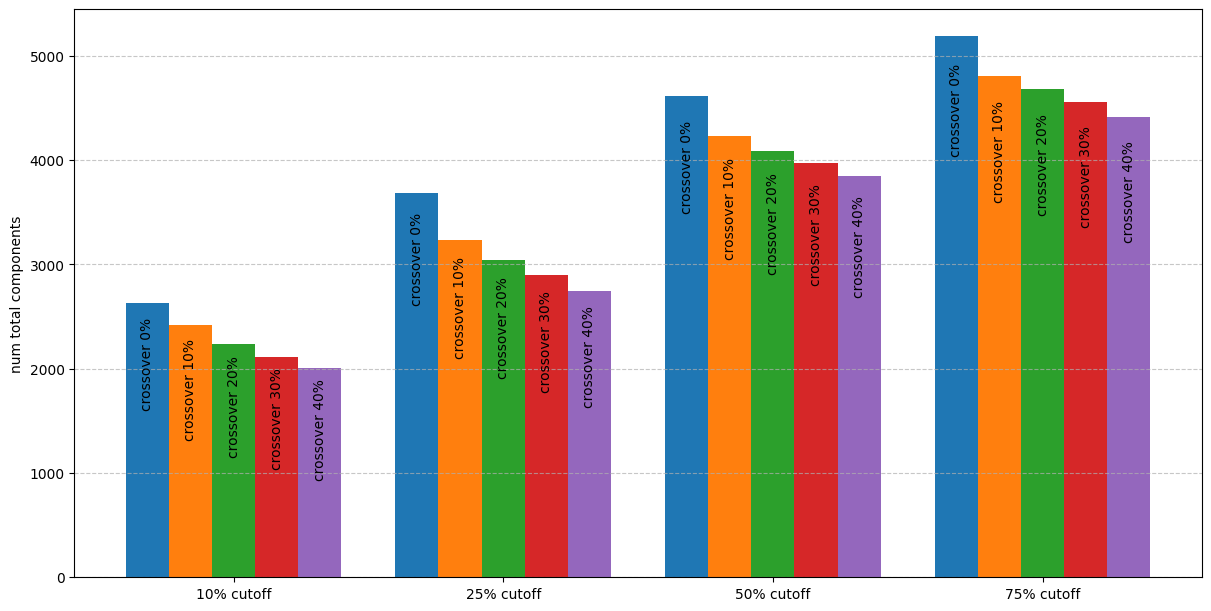

In [30]:
speciation_search2 = {
    "cutoff 10% & crossover 0%": {"spawn_cutoff": 0.10, "pop_perc_crossover": 0.0}, "cutoff 10% & crossover 10%": {"spawn_cutoff": 0.10, "pop_perc_crossover": 0.1}, "cutoff 10% & crossover 20%": {"spawn_cutoff": 0.10, "pop_perc_crossover": 0.2}, "cutoff 10% & crossover 30%": {"spawn_cutoff": 0.10, "pop_perc_crossover": 0.3}, "cutoff 10% & crossover 40%": {"spawn_cutoff": 0.10, "pop_perc_crossover": 0.4},
    "cutoff 25% & crossover 0%": {"spawn_cutoff": 0.25, "pop_perc_crossover": 0.0}, "cutoff 25% & crossover 10%": {"spawn_cutoff": 0.25, "pop_perc_crossover": 0.1}, "cutoff 25% & crossover 20%": {"spawn_cutoff": 0.25, "pop_perc_crossover": 0.2}, "cutoff 25% & crossover 30%": {"spawn_cutoff": 0.25, "pop_perc_crossover": 0.3}, "cutoff 25% & crossover 40%": {"spawn_cutoff": 0.25, "pop_perc_crossover": 0.4},
    "cutoff 50% & crossover 0%": {"spawn_cutoff": 0.50, "pop_perc_crossover": 0.0}, "cutoff 50% & crossover 10%": {"spawn_cutoff": 0.50, "pop_perc_crossover": 0.1}, "cutoff 50% & crossover 20%": {"spawn_cutoff": 0.50, "pop_perc_crossover": 0.2}, "cutoff 50% & crossover 30%": {"spawn_cutoff": 0.50, "pop_perc_crossover": 0.3}, "cutoff 50% & crossover 40%": {"spawn_cutoff": 0.50, "pop_perc_crossover": 0.4},
    "cutoff 75% & crossover 0%": {"spawn_cutoff": 0.75, "pop_perc_crossover": 0.0}, "cutoff 75% & crossover 10%": {"spawn_cutoff": 0.75, "pop_perc_crossover": 0.1}, "cutoff 75% & crossover 20%": {"spawn_cutoff": 0.75, "pop_perc_crossover": 0.2}, "cutoff 75% & crossover 30%": {"spawn_cutoff": 0.75, "pop_perc_crossover": 0.3}, "cutoff 75% & crossover 40%": {"spawn_cutoff": 0.75, "pop_perc_crossover": 0.4},
}


speciation_plt_layout2 = [
    ["cutoff 10% & crossover 0%", "cutoff 10% & crossover 10%", "cutoff 10% & crossover 20%", "cutoff 10% & crossover 30%", "cutoff 10% & crossover 40%"],
    ["cutoff 25% & crossover 0%", "cutoff 25% & crossover 10%", "cutoff 25% & crossover 20%", "cutoff 25% & crossover 30%", "cutoff 25% & crossover 40%"],
    ["cutoff 50% & crossover 0%", "cutoff 50% & crossover 10%", "cutoff 50% & crossover 20%", "cutoff 50% & crossover 30%", "cutoff 50% & crossover 40%"],
    ["cutoff 75% & crossover 0%", "cutoff 75% & crossover 10%", "cutoff 75% & crossover 20%", "cutoff 75% & crossover 30%", "cutoff 75% & crossover 40%"]
]

 
strip_first_param = lambda l: l.split('&')[1].strip().split('\n')[0] # lambda to be applied on labels
speciation_data_sources2 = sa.search_and_aggregate_param_results(speciation_res, speciation_search2)
grp_titles2 = ["10% cutoff", "25% cutoff", "50% cutoff", "75% cutoff"]
_ = sa.generalized_barplot(speciation_plt_layout2, speciation_data_sources2, "best_genome_fitness", title="", group_titles=grp_titles2, label_lambda=strip_first_param)
_ = sa.generalized_barplot(speciation_plt_layout2, speciation_data_sources2, "num_total_components", title="", group_titles=grp_titles2, label_lambda=strip_first_param)


 **fitness**

 Not a big effect on fitness based on cutoff and crossover rates.

 The only clear effect here is that crossover is very important for the speciation algorithm to function well.

 This is a bit in contrast to truncation selection, where 0% crossover did not bring such a performance degradation.

 I assume this is because in truncation selection genomes are not put into niches in which they converge more quickly



 **num components**

 Overall this plot kind of mirrors what was already seen for truncation selection:

 * increasing the cutoff leads to more components

 * increasing the crossover rate leads to fewer components

 ### Cutoff ~ Crossover - fitness plot

 As before, lets look at how cutoff and crossover influence fitness convergence for the speciation selection



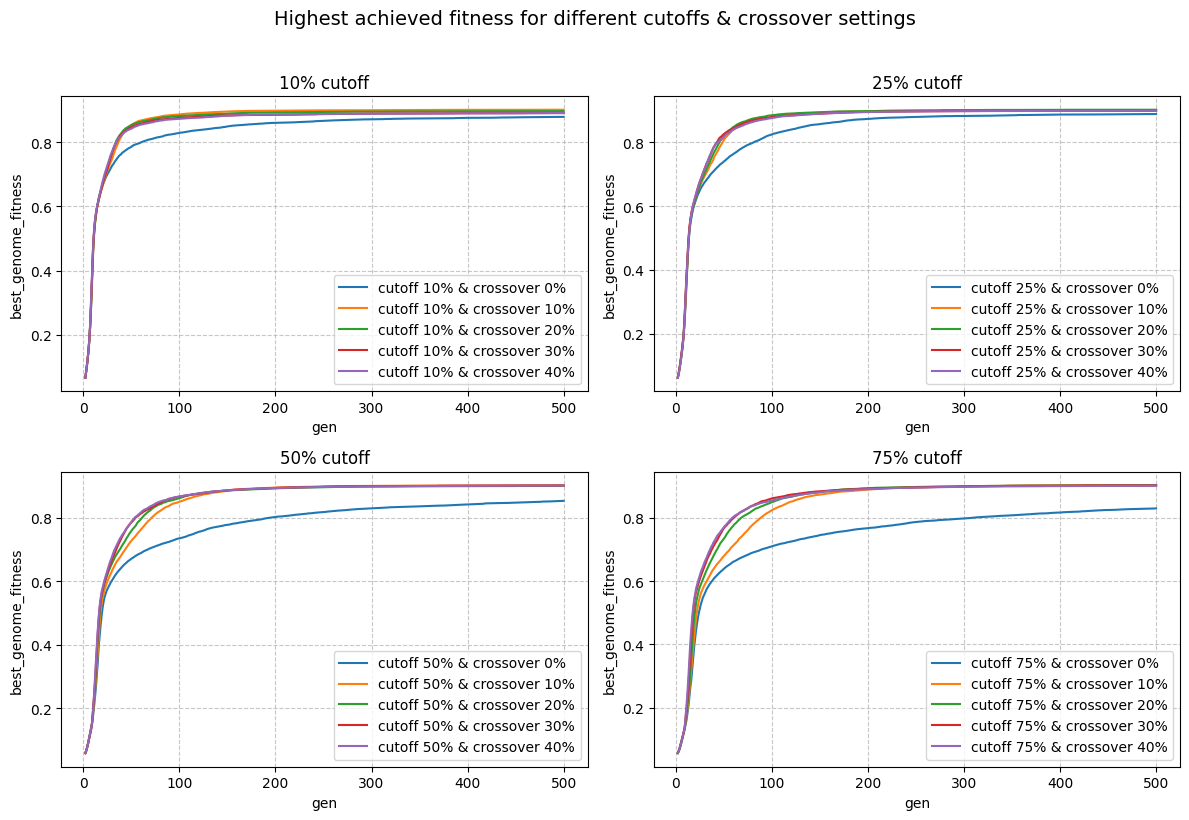

In [31]:
_ = sa.generalized_lineplot(speciation_plt_layout2, speciation_data_sources2, "best_genome_fitness", title="Highest achieved fitness for different cutoffs & crossover settings", subplt_titles=grp_titles2)


 In general, the settings converge similarly, with the exception of 0% crossover.

 The 0% crossover curve flattens out earlier and fails to reach the curves using crossover.

 There is not a big difference between the different crossover rates in terms of max fitness performance, but it is important to have crossover.



 Next, lets look again at component convergence graphs.



 ### Cutoff ~ Crossover - diversity & convergence

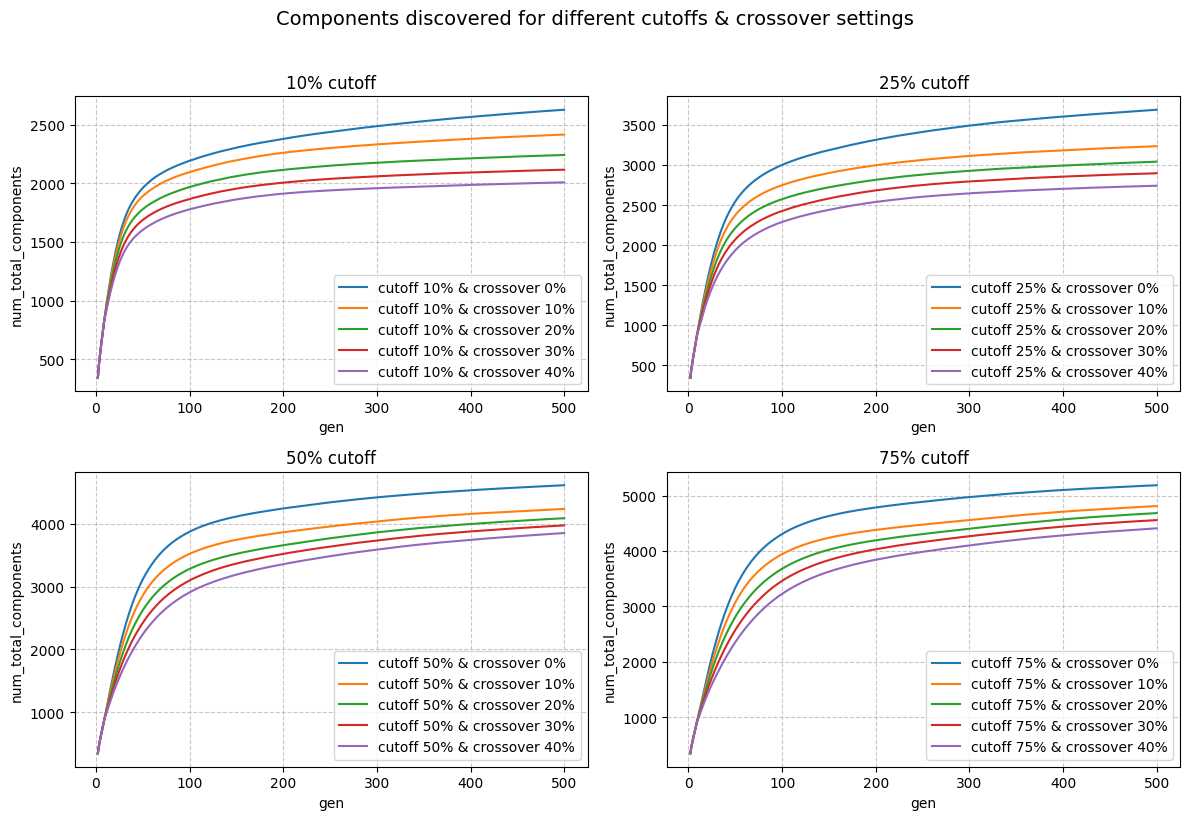

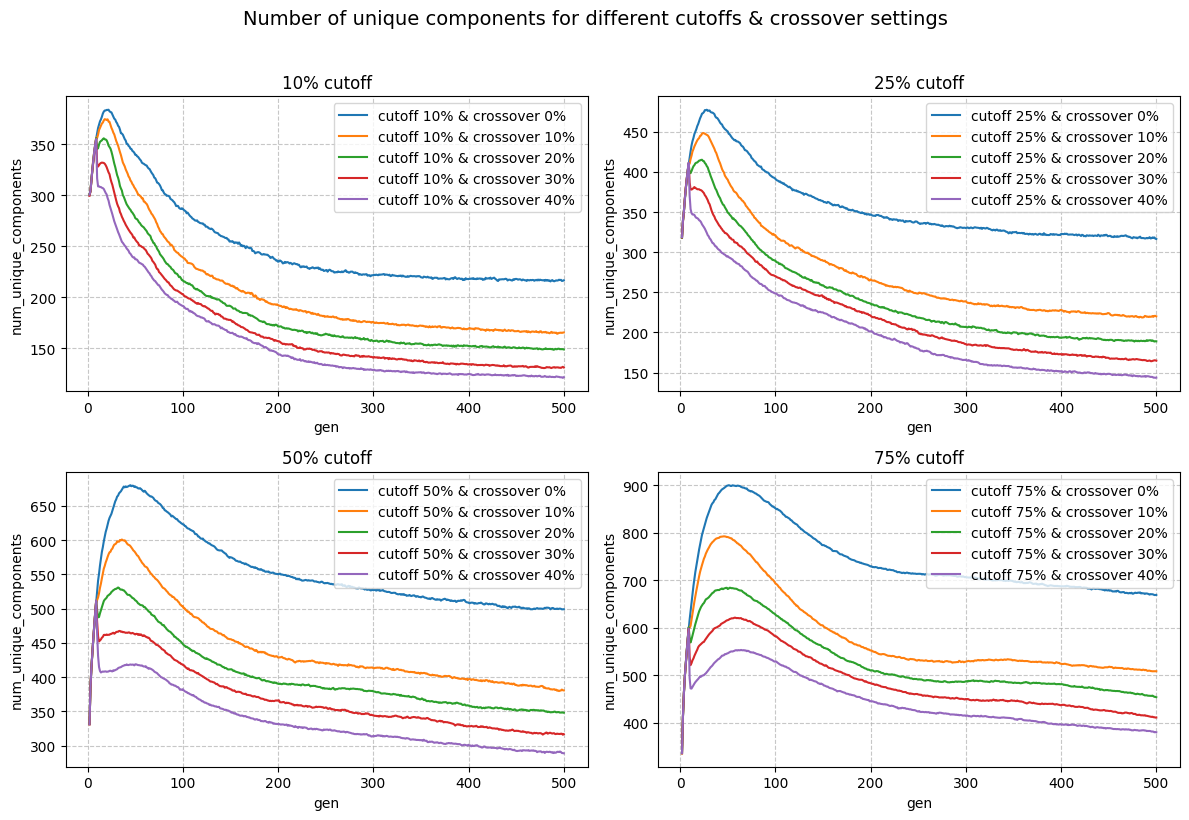

In [32]:
_ = sa.generalized_lineplot(speciation_plt_layout2, speciation_data_sources2, "num_total_components", title="Components discovered for different cutoffs & crossover settings", subplt_titles=grp_titles2)
_ = sa.generalized_lineplot(speciation_plt_layout2, speciation_data_sources2, "num_unique_components", title="Number of unique components for different cutoffs & crossover settings", subplt_titles=grp_titles2, legend_loc="upper right")


 Again, a higher cutoff obviously leads to more components.

 And crossover leads to fewer components.



 ### Effects of species extinction

 The last parameter that was varied and not yet fully visualized here is the species extinction, which happens after 50 generations of no improvements or not at all.



An error occurred: unable to append to a DataFrame of width 47 with a DataFrame of width 50
this was most likely because there are missing columns in one of the dataframes, will use diagonal join
An error occurred: unable to append to a DataFrame of width 47 with a DataFrame of width 50
this was most likely because there are missing columns in one of the dataframes, will use diagonal join


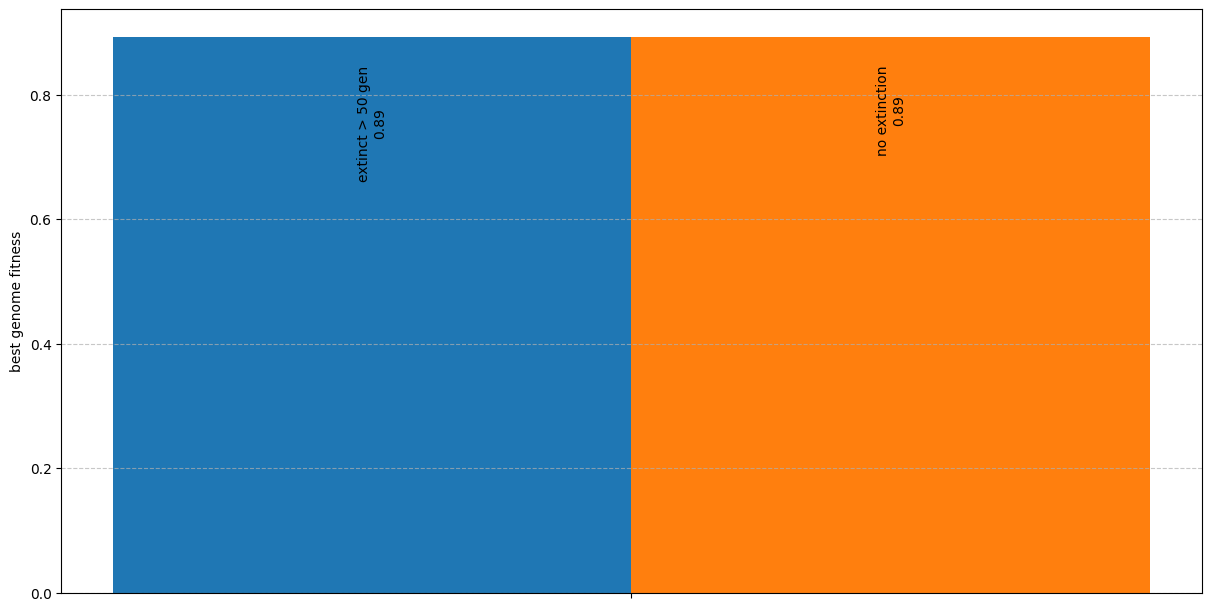

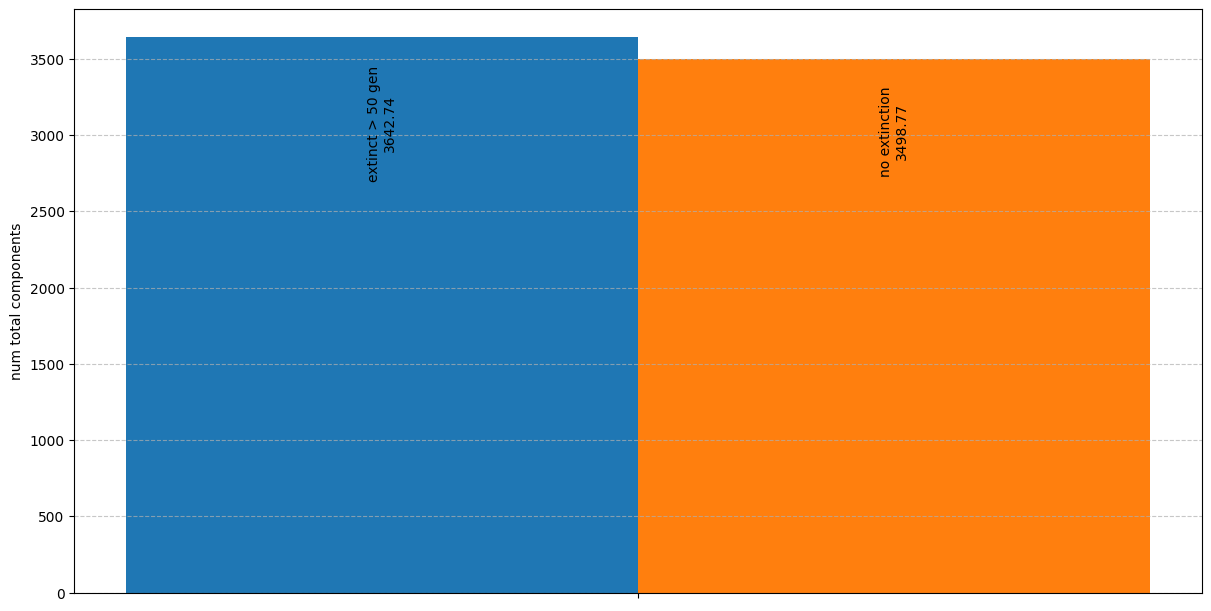

In [33]:
speciation_search3 = {
    "extinct > 50 gen": {"allowed_gens_no_improvement": 50},
    "no extinction": {"allowed_gens_no_improvement": 9999999}
}

speciation_plt_layout3 = [ ["extinct > 50 gen", "no extinction"] ]

 
speciation_data_sources3 = sa.search_and_aggregate_param_results(speciation_res, speciation_search3)
grp_titles3 = [""]
_ = sa.generalized_barplot(speciation_plt_layout3, speciation_data_sources3, "best_genome_fitness", title="", group_titles=grp_titles3)
_ = sa.generalized_barplot(speciation_plt_layout3, speciation_data_sources3, "num_total_components", title="", group_titles=grp_titles3)


 No effect on fitness, super tiny irrelevant effect on num total components

 #### Species extinction - species

 First, lets check how extinction affects the number of species

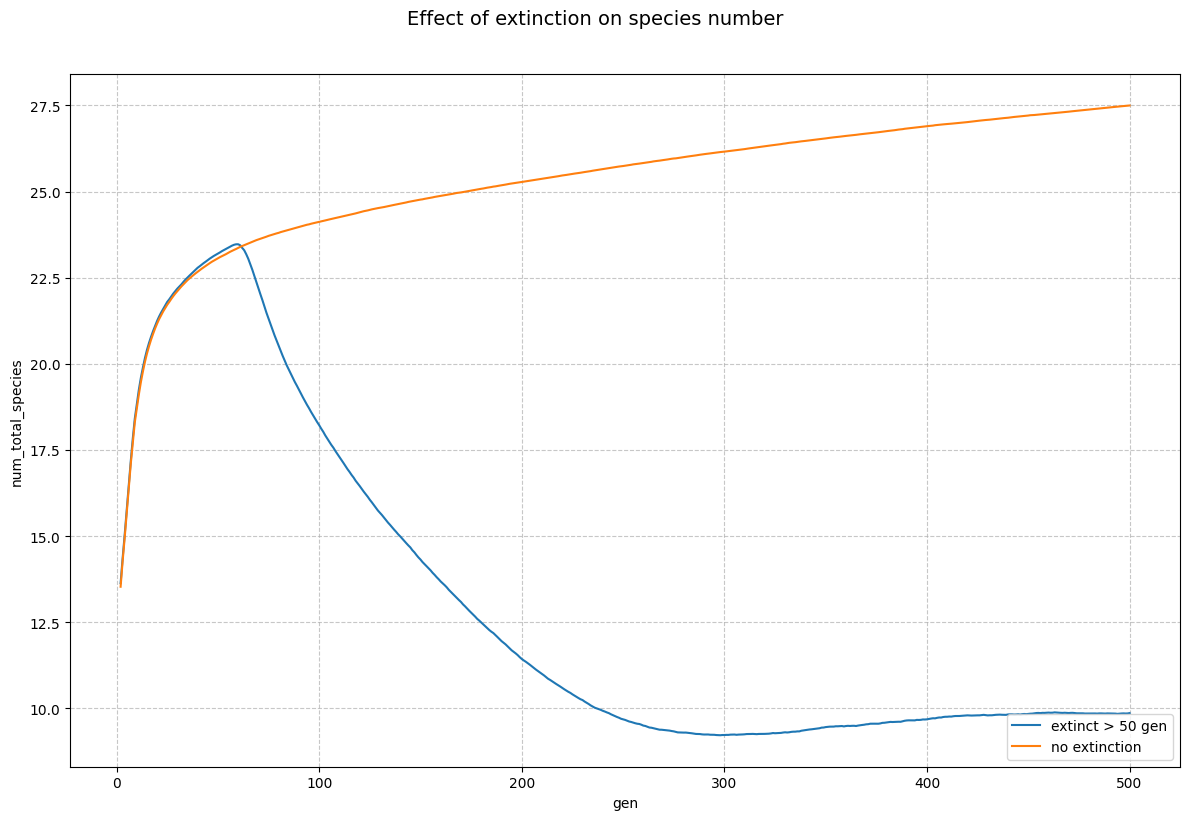

In [34]:
_ = sa.generalized_lineplot(speciation_plt_layout3, speciation_data_sources3, "num_total_species", title="Effect of extinction on species number", subplt_titles=grp_titles3)


 As can be expected, after 50 generations a sharp drop in the number of species starts when species go extinct.

 At around generation 300, the minimum is reached and the number of species starts to approach a kind of equilibrium around ~10 species.



 #### Species extinction - fitness

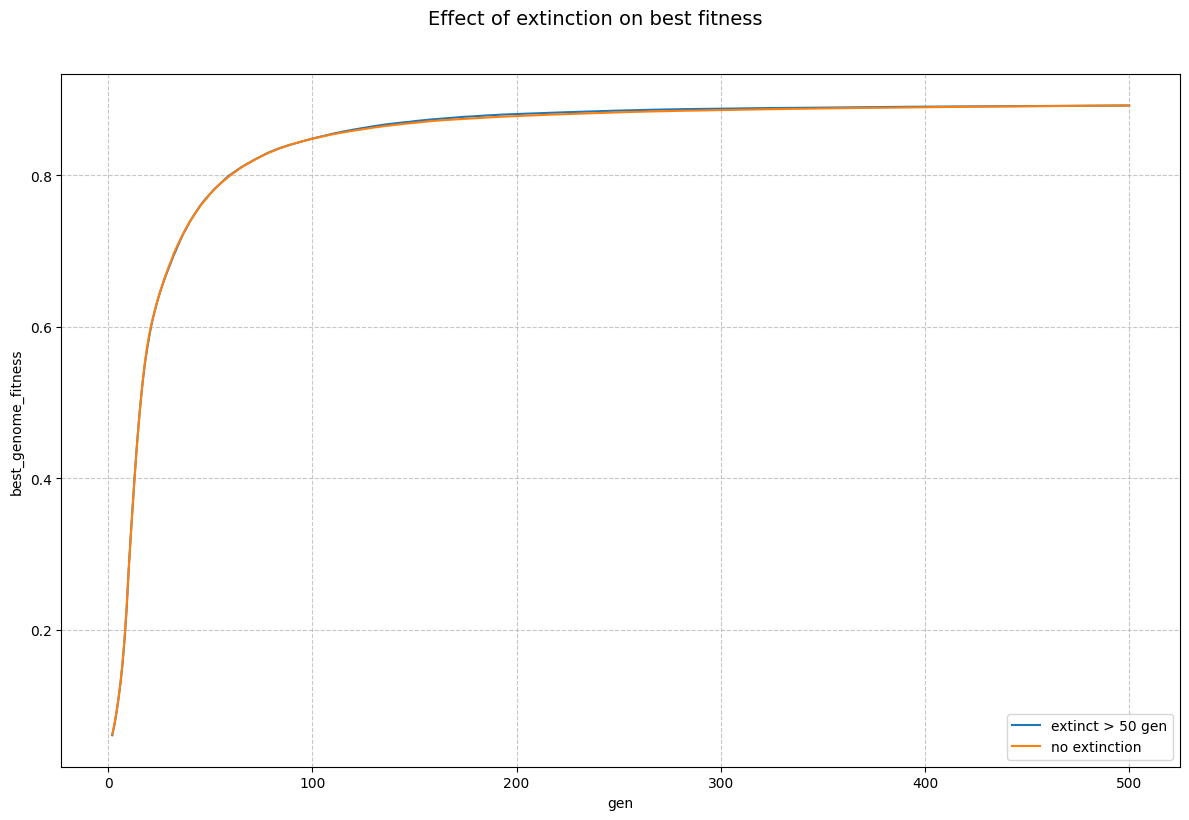

In [35]:
_ = sa.generalized_lineplot(speciation_plt_layout3, speciation_data_sources3, "best_genome_fitness", title="Effect of extinction on best fitness", subplt_titles=grp_titles3)


 No real effect here



 #### Species extinction - components

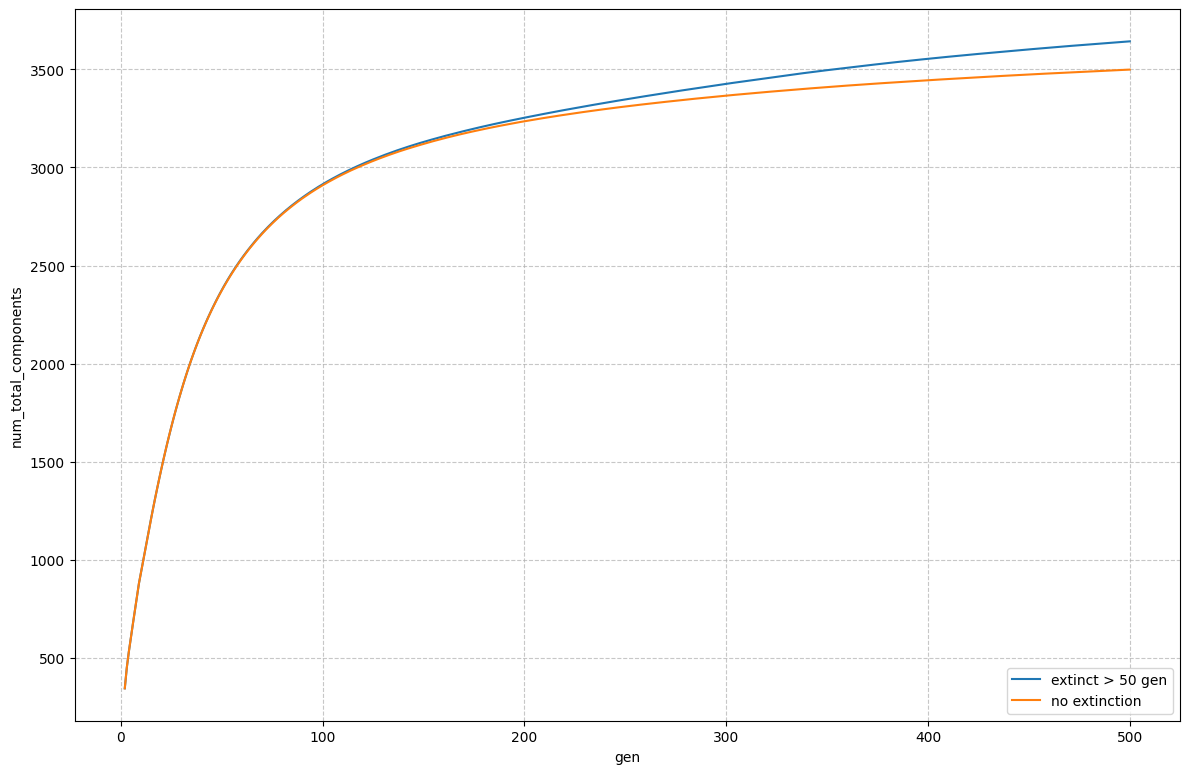

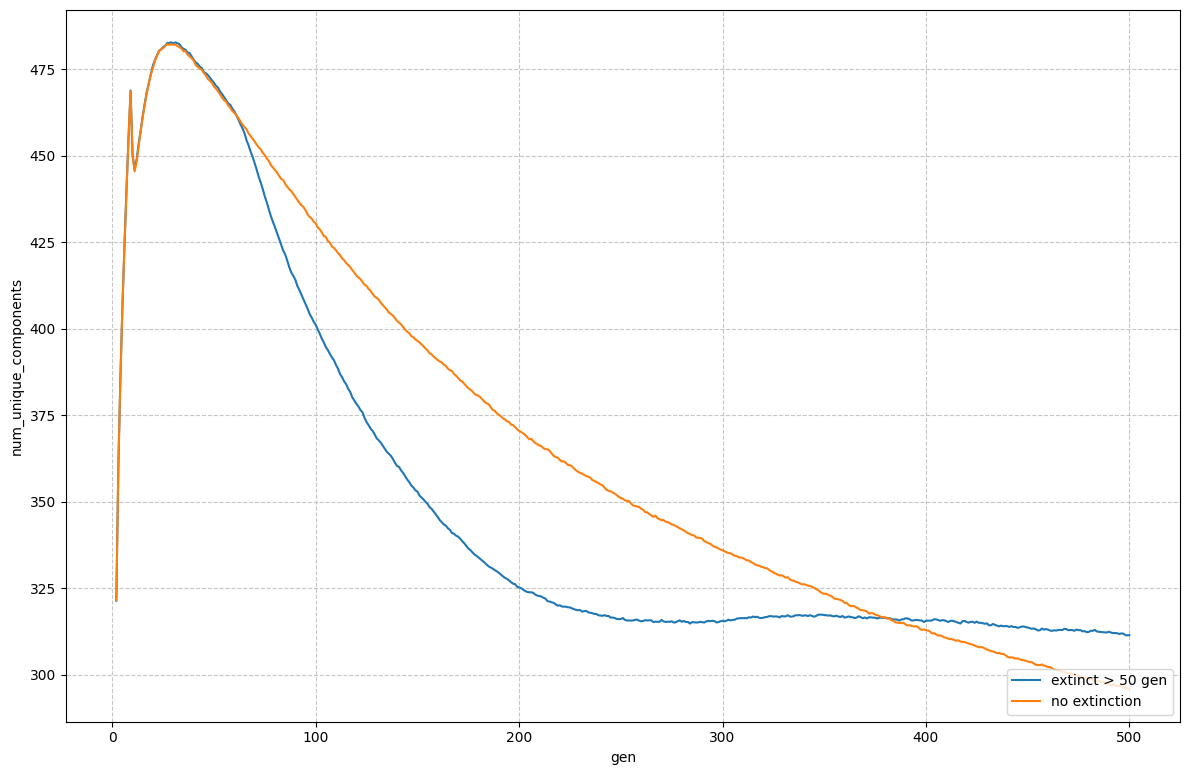

In [36]:
_ = sa.generalized_lineplot(speciation_plt_layout3, speciation_data_sources3, "num_total_components", title="", subplt_titles=grp_titles3)
_ = sa.generalized_lineplot(speciation_plt_layout3, speciation_data_sources3, "num_unique_components", title="", subplt_titles=grp_titles3)


 **total components**

 slightly higher number of total components can be reached when using extinction.



 **unique components**

 While the extinction leads to a sharper drop of unique components, the curve starts to flatten way before the no extinction setup, causing it to preserve more unique components until the end.

 The unique components stop decreasing right around the time when the number of species approaches its minimum.

 At that point, there are fewer species.

 Then, the number of species slowly increases, maybe this is the cause for diversity preservation.

 I stopped my observations after 500 gens, there is a good chance that component reduction will continue until it reaches a level similar to the no-extinction setups.



 ### Speciation Spawn plots

In [37]:
# # speciation_search1 + speciation_search2 + speciation_search3
# speciation_search = speciation_search1 | speciation_search2 | speciation_search3
# print("\n".join(list(speciation_search.keys())))


 #### Boundary & componentpool Speciation Spawn plots

 I will plot one exemplary setup for the different species boundary and component pool sizes.

 I'm using a low spawn cutoff, because this makes the individual species spawn peaks more visible.

 Holding spawn cutoff, crossover and extinction constant

2


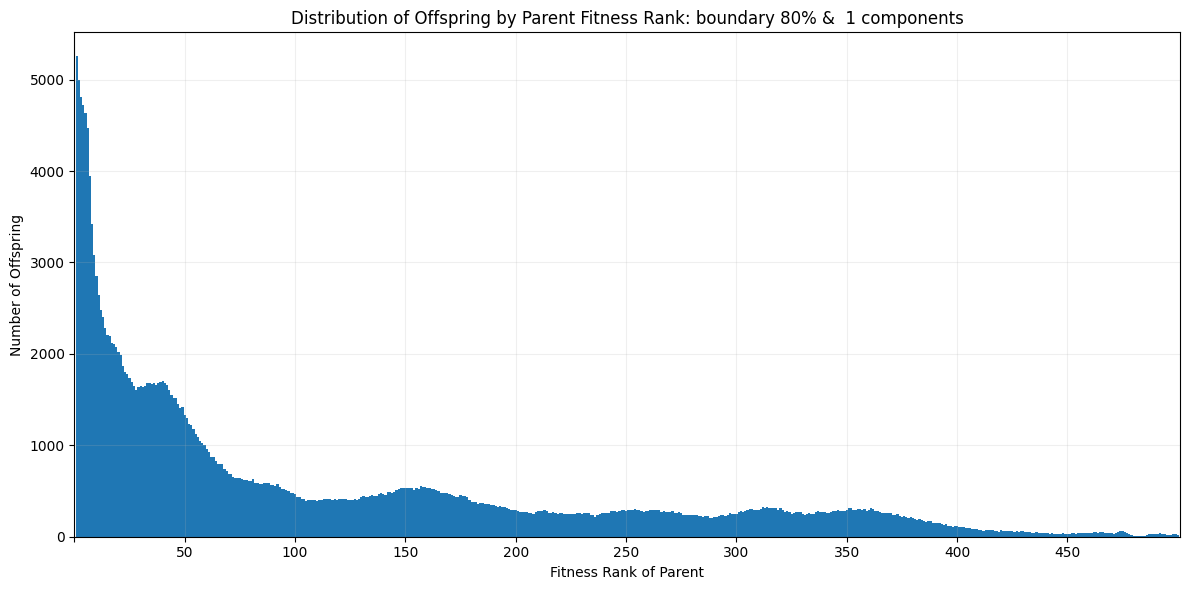

4


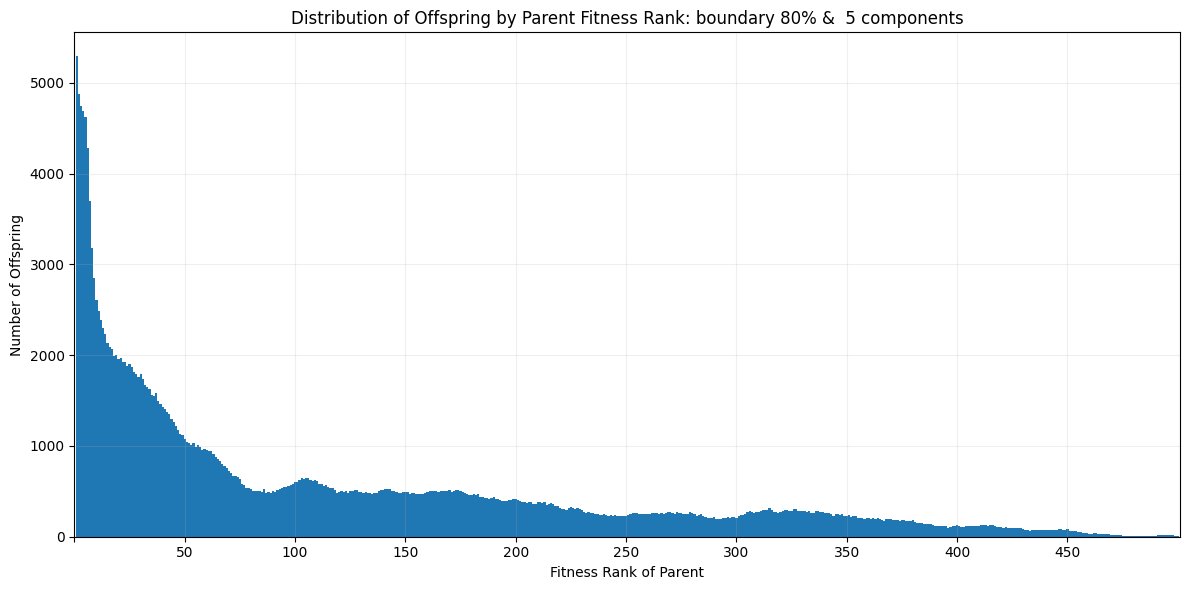

6


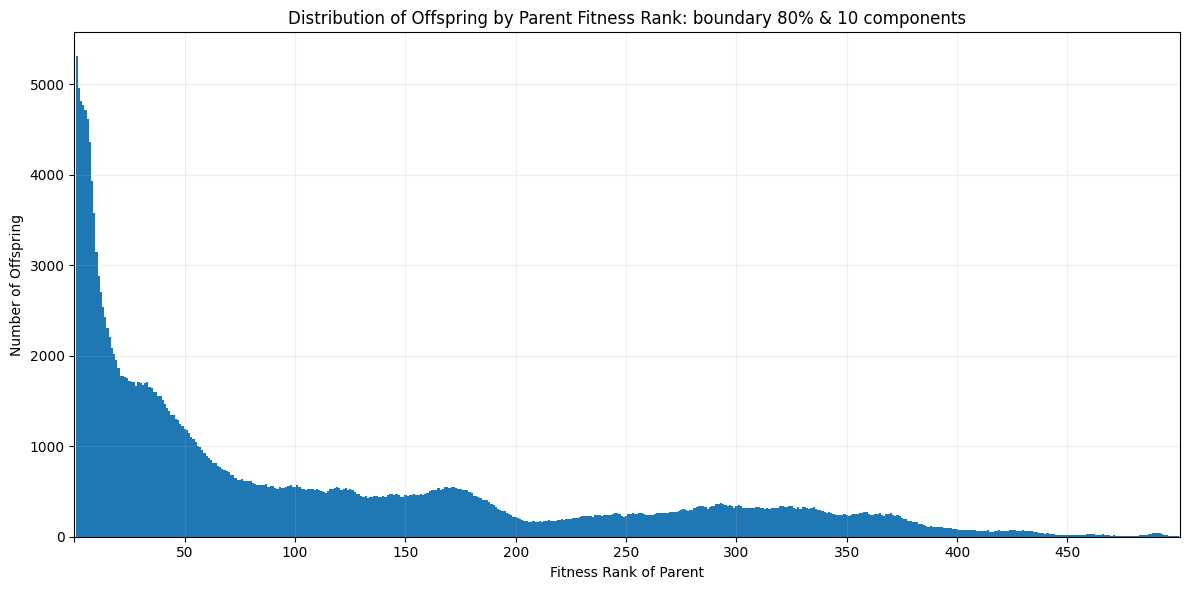

122


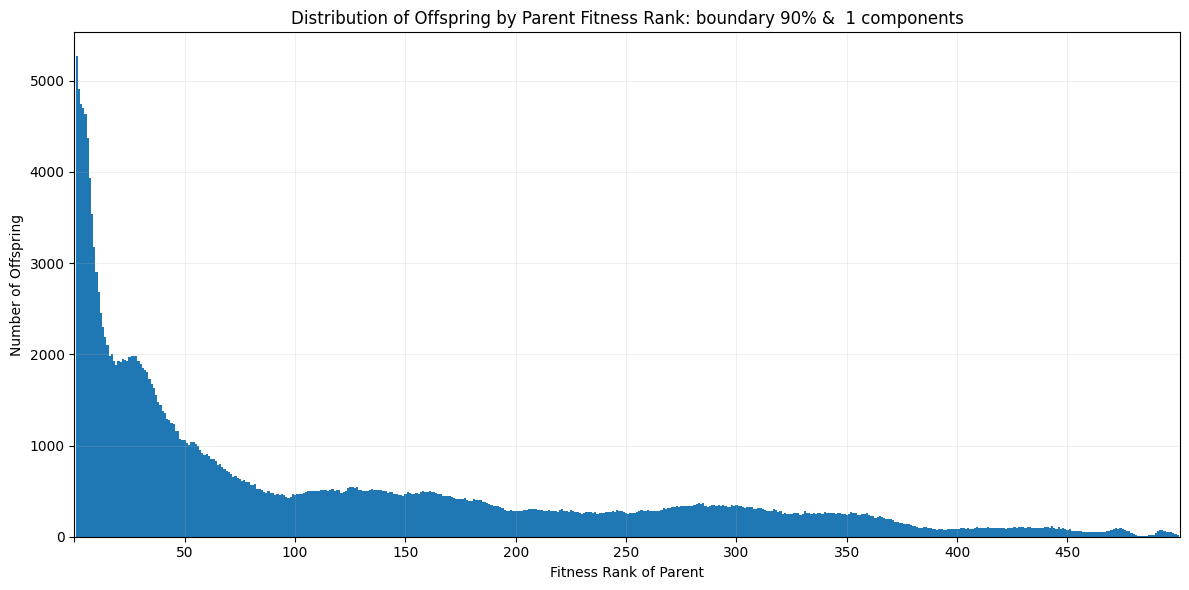

124


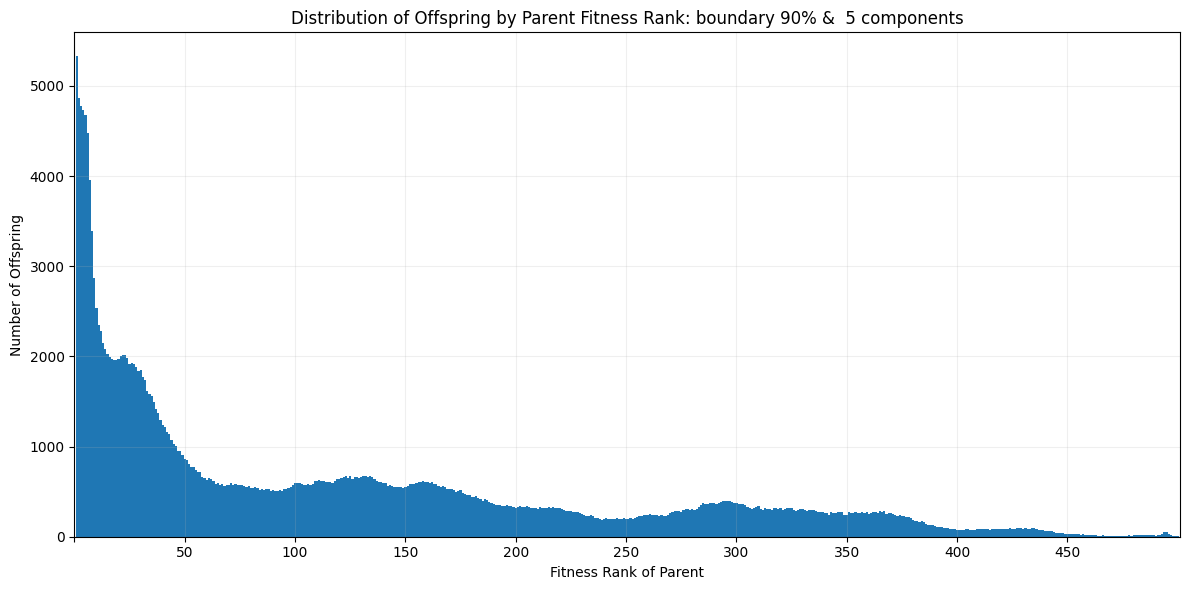

126


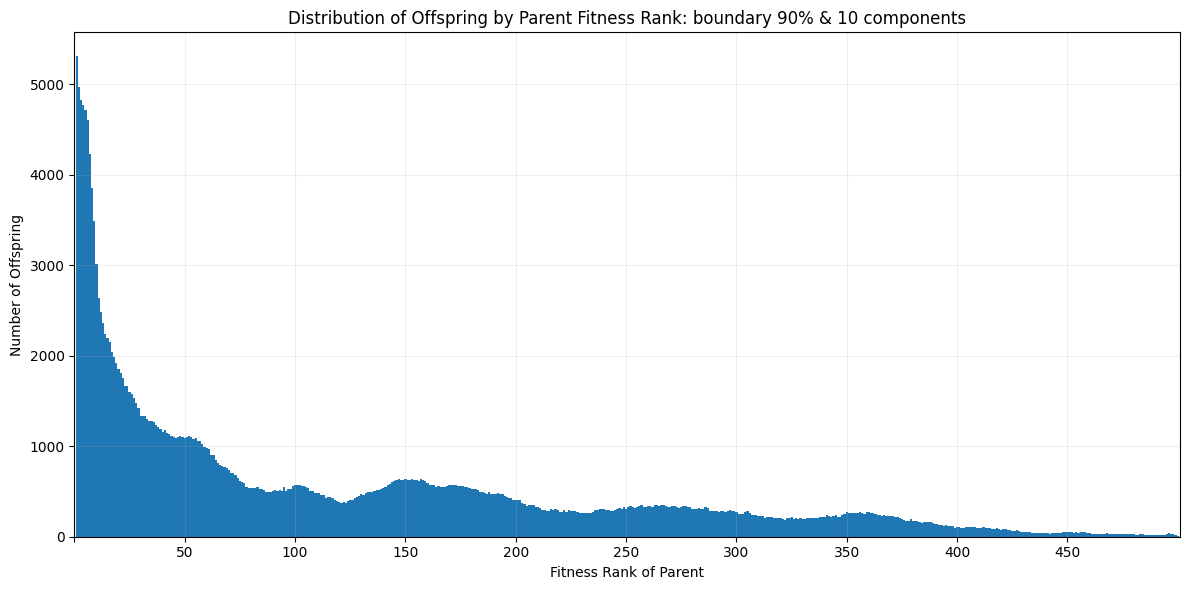

242


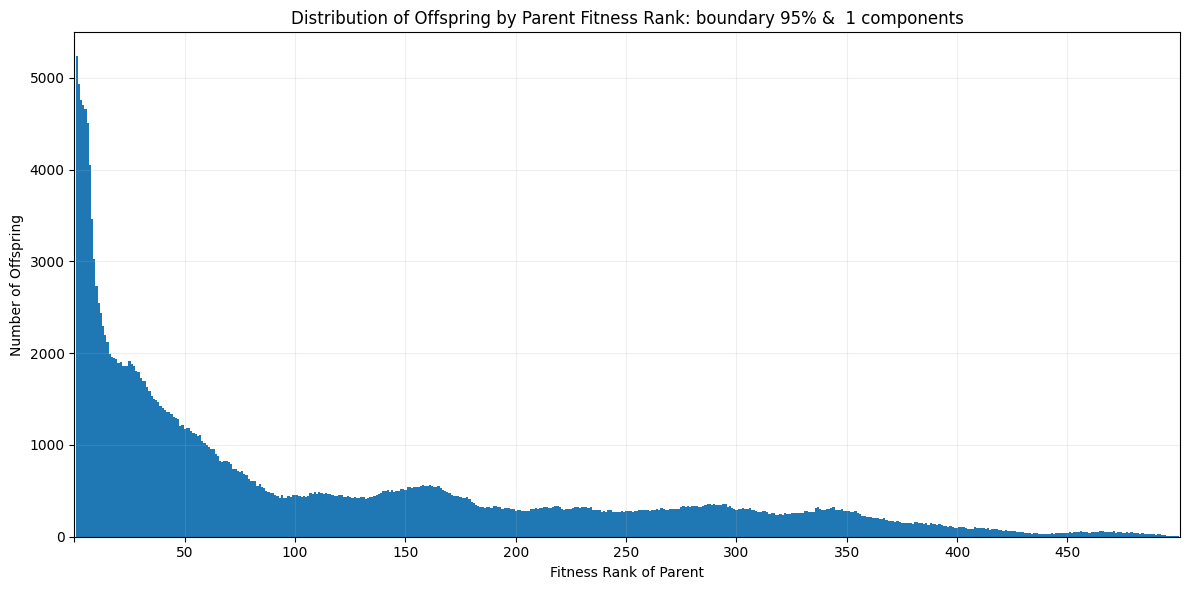

244


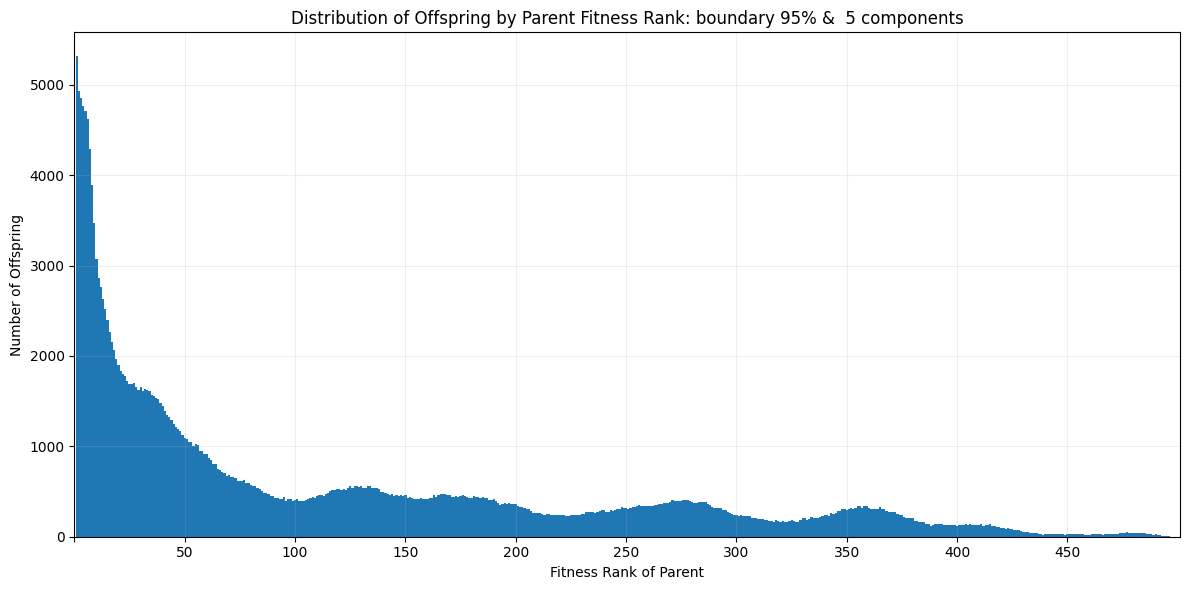

246


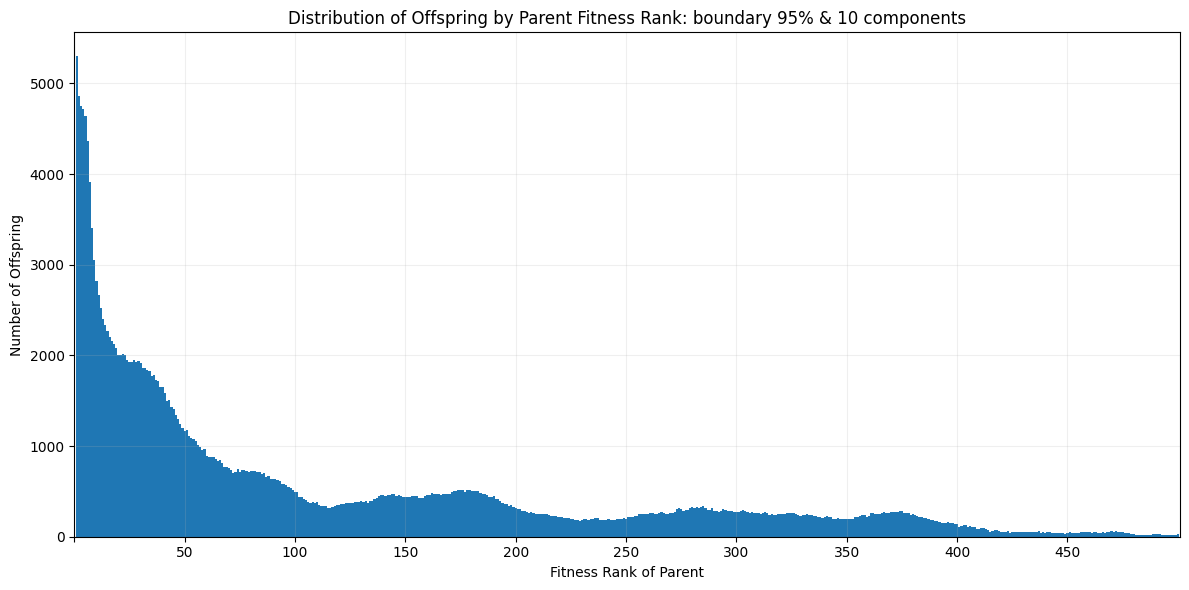

In [38]:
t = 'Distribution of Offspring by Parent Fitness Rank: '
hold_constant1 = {"pop_perc_crossover": 0.0, "spawn_cutoff": 0.1, "allowed_gens_no_improvement": 9999999}
s1 = {k: v | hold_constant1 for k, v in speciation_search1.items()} # use spawn cutoff 0.1 for the search
for s_name, s_id in sorted(sa.search_setups(speciation_res, s1).items(), key= lambda x: x[0]):
    print(s_id[0])
    rs_data = speciation_res["setups"][s_id[0]]['spawn_rank_agg']
    sa.plot_offspring_distribution(rs_data, title=t+s_name)


 Effect of:

 * ~~component pool size: smaller pool -> more species -> distinct peaks become visible for each species~~

     * ~~when there are fewer species, the effect of dominant species is very visible, you can see the cutoff within the species very clearly in those spawn rank plots~~

 * No real visible effect in the aggregated spawn pool when changing boundary and pool size



 #### cutoff & crossover Speciation Spawn plots

 next, I want to look at all the cutoff and crossover settings effect on offspring fitness distribution.

 This time holding boundary, component pool and extinction constant

124


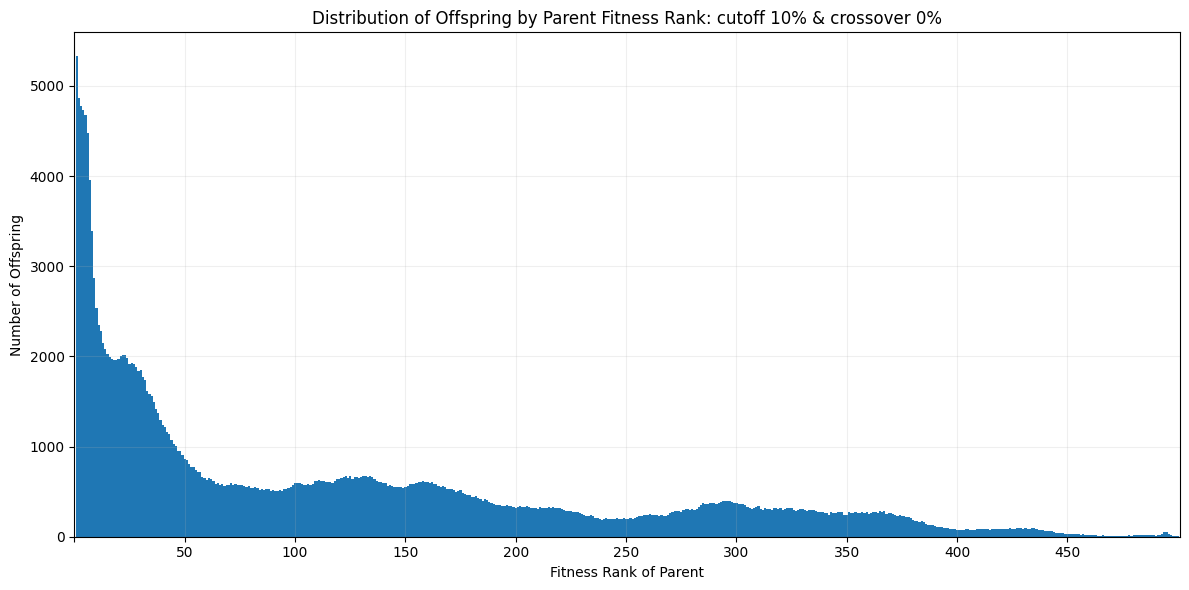

148


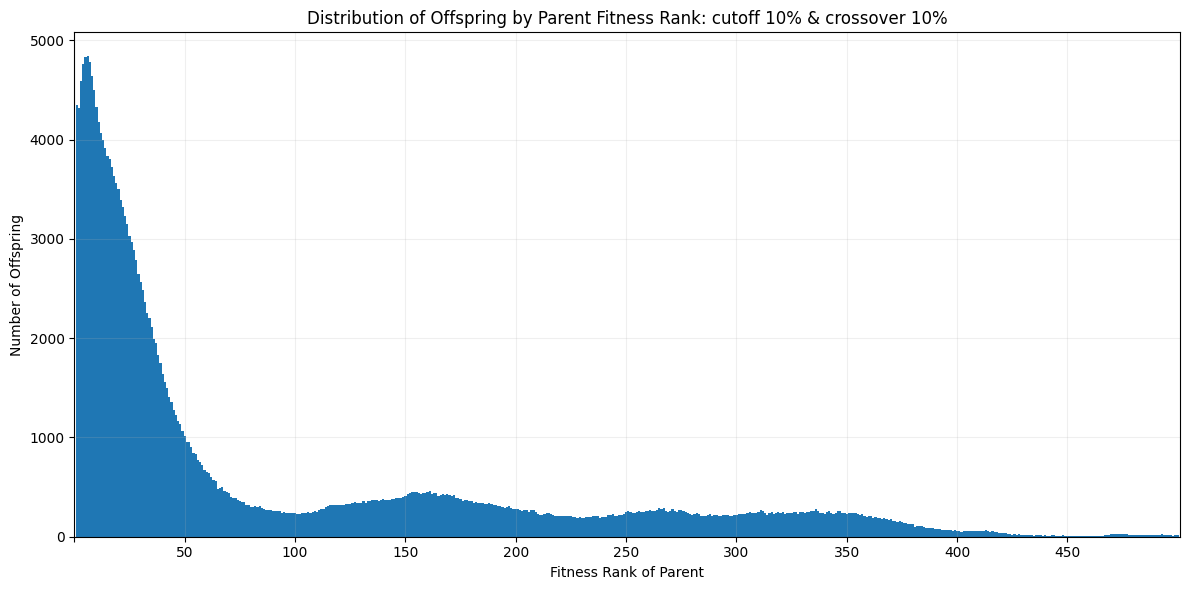

172


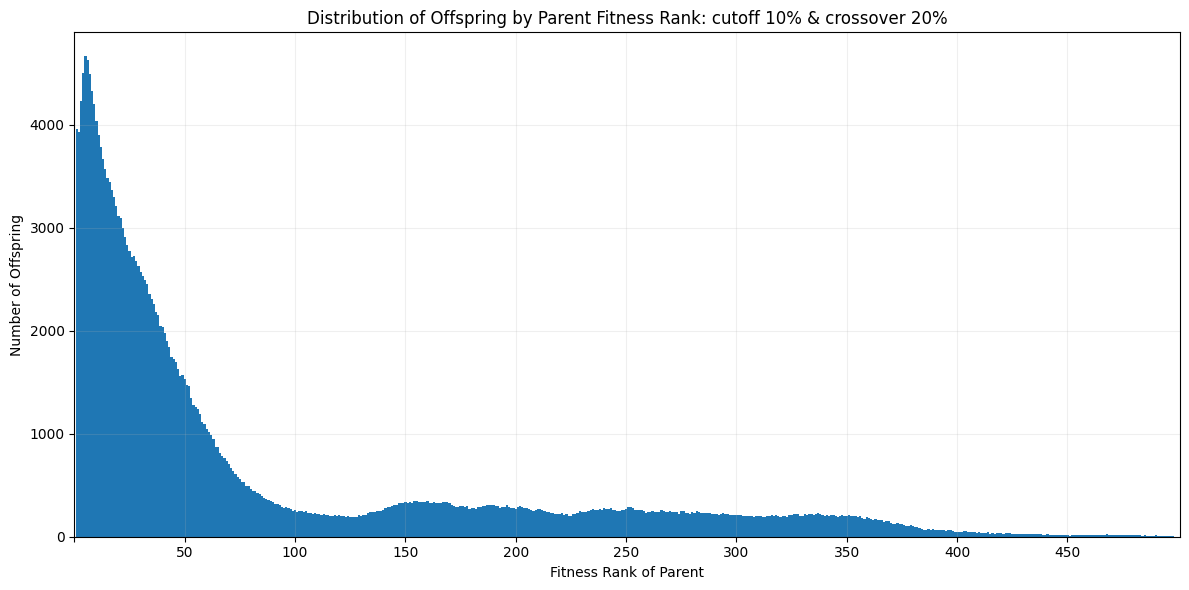

196


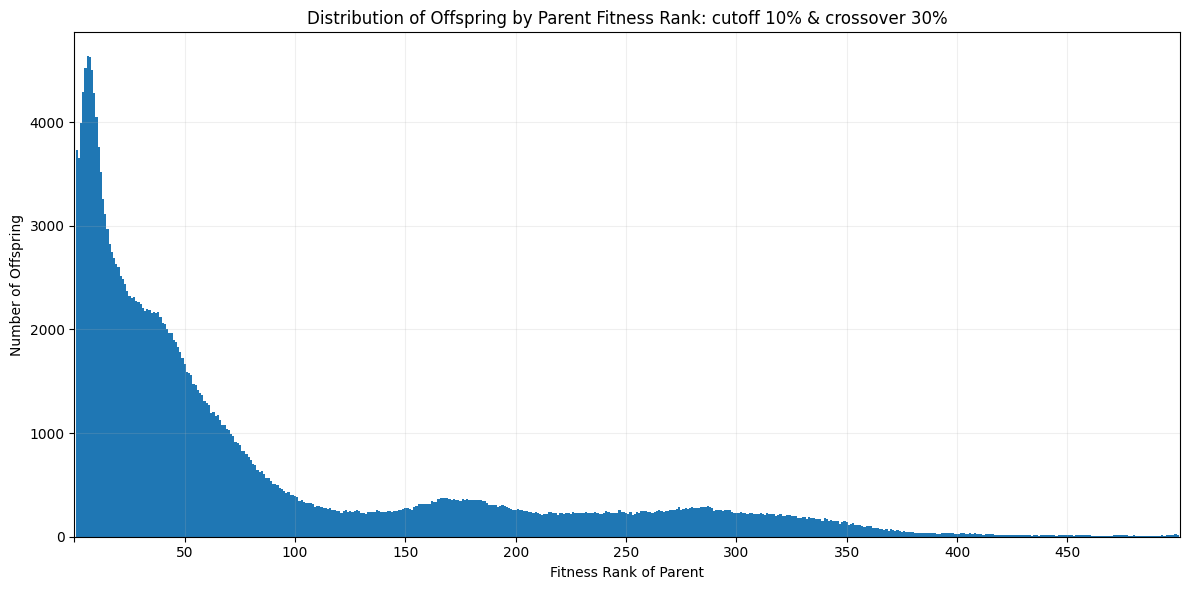

220


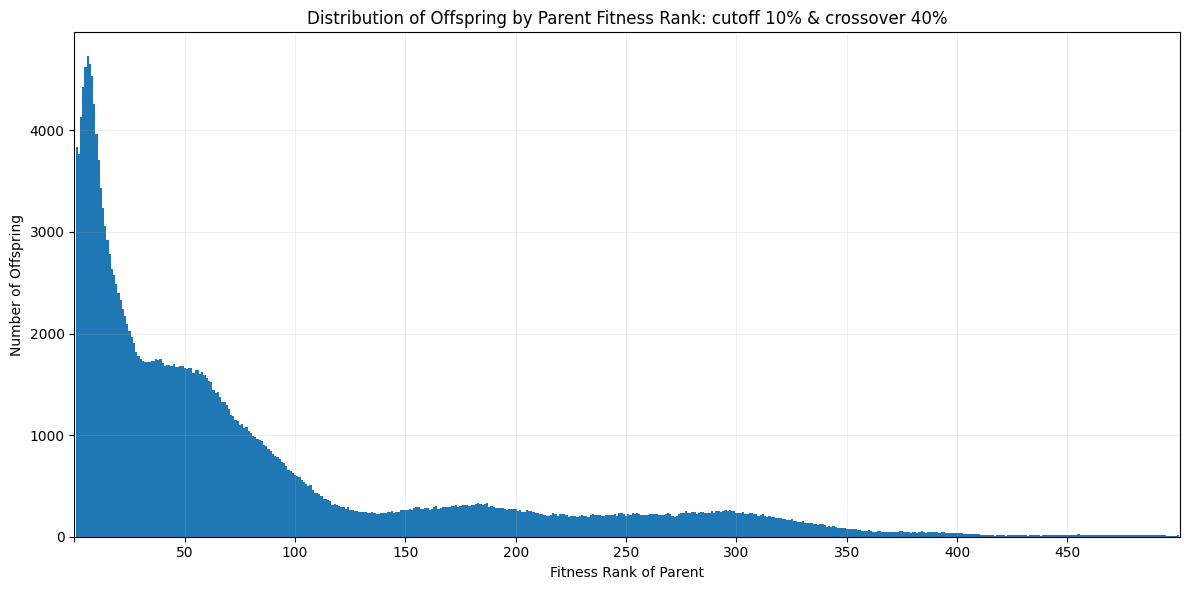

130


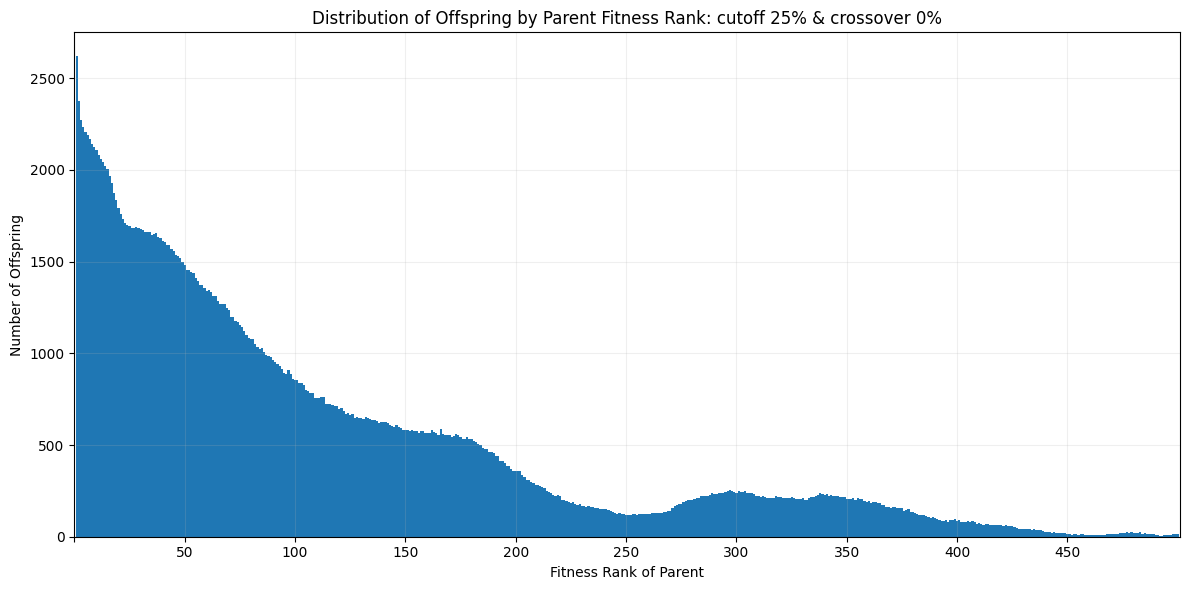

154


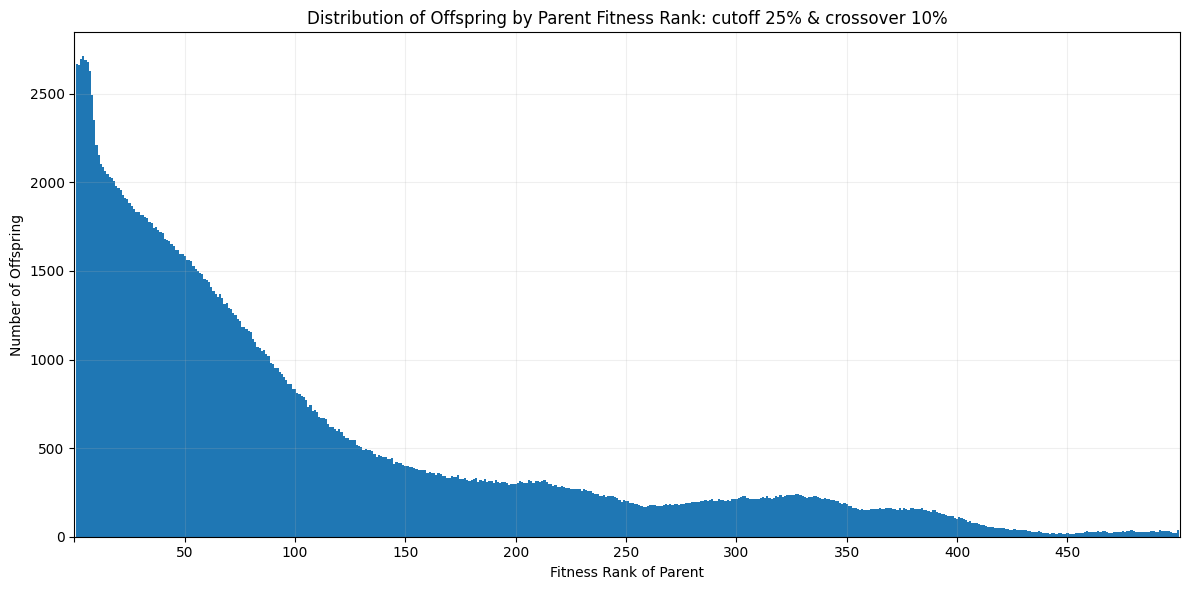

178


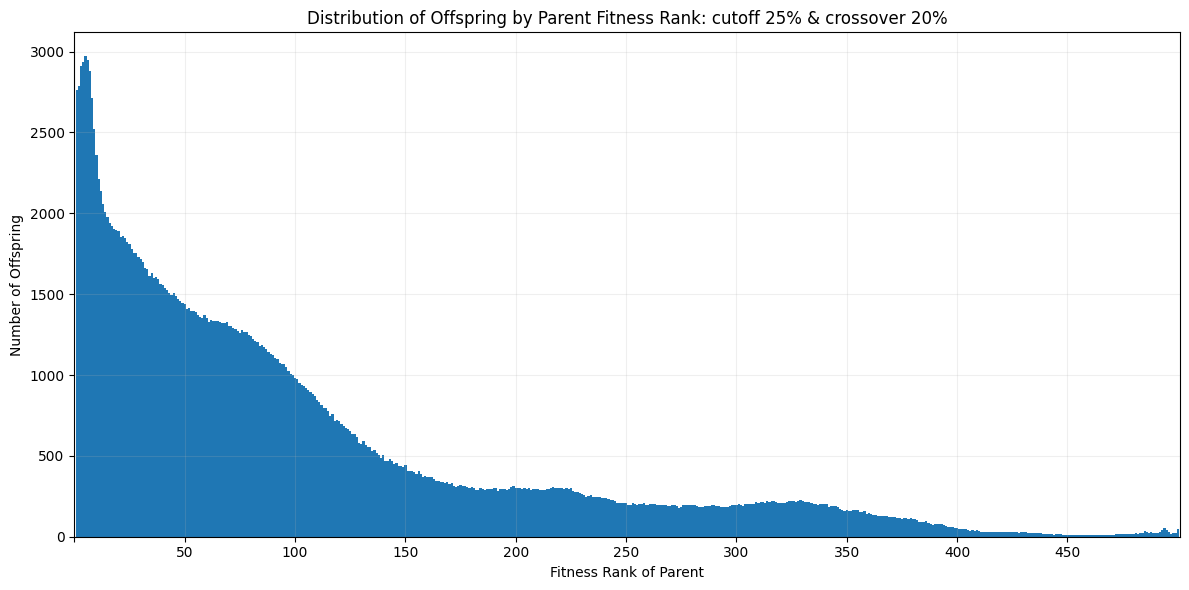

202


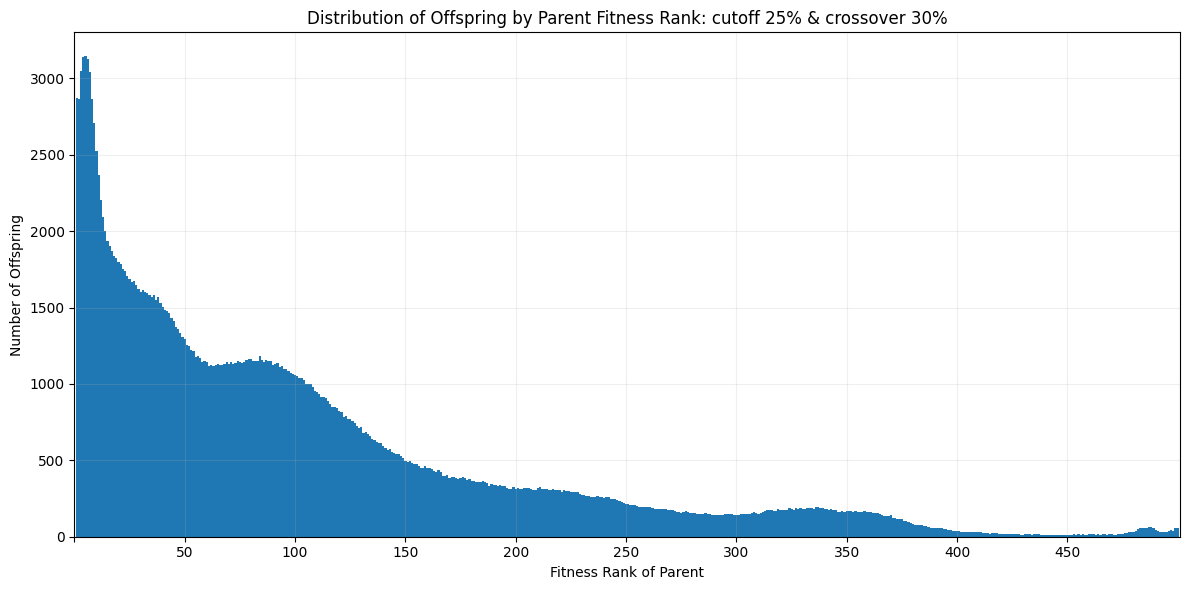

226


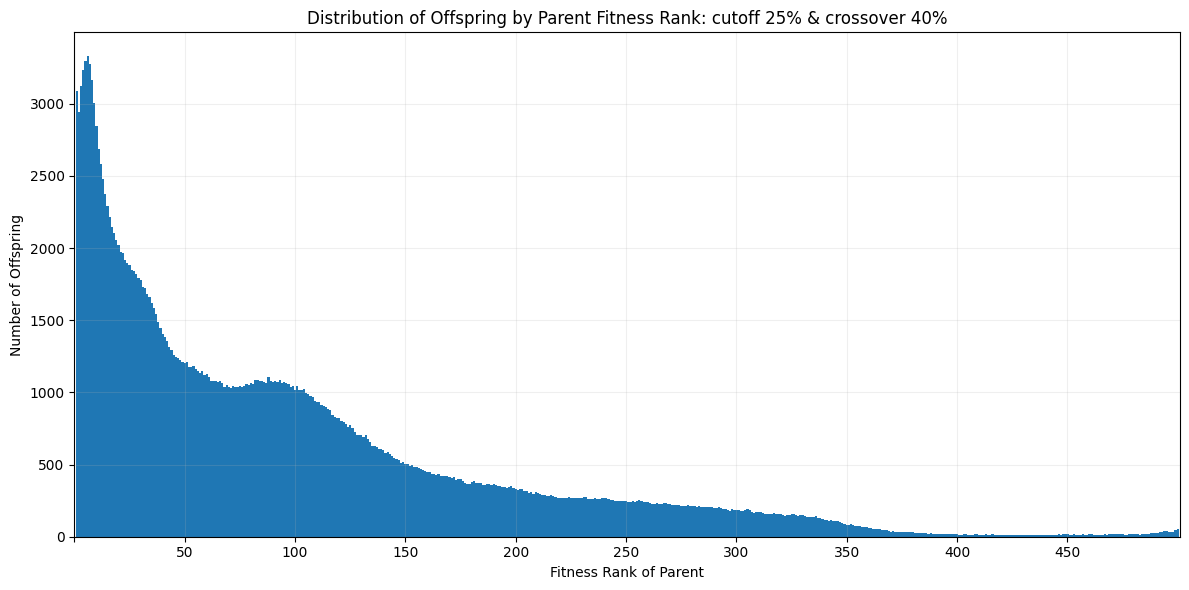

136


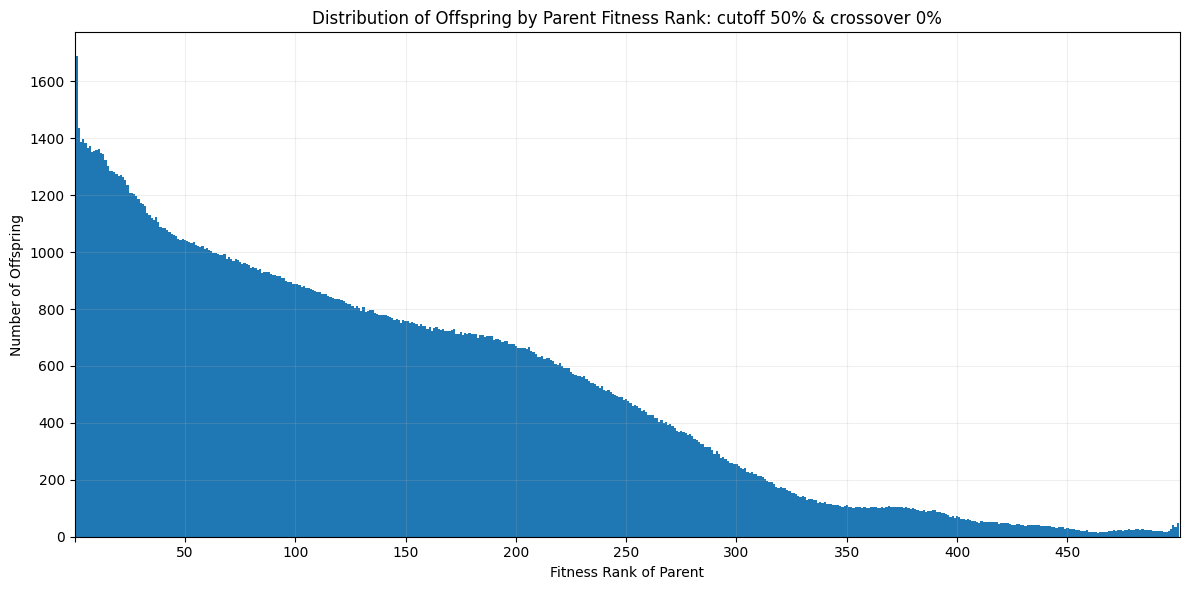

160


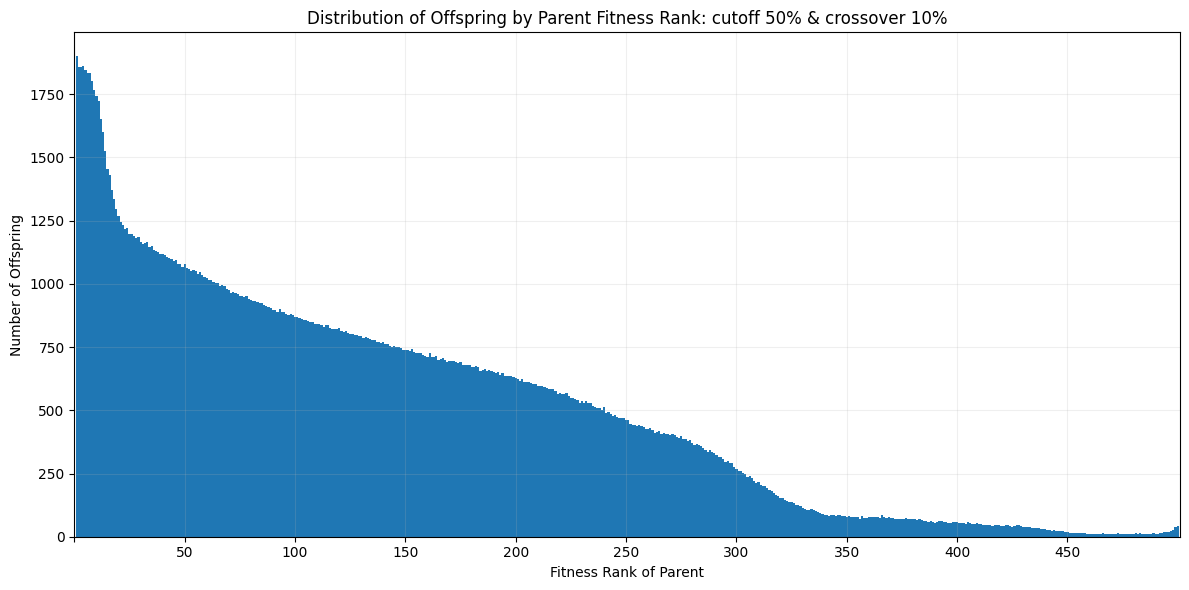

184


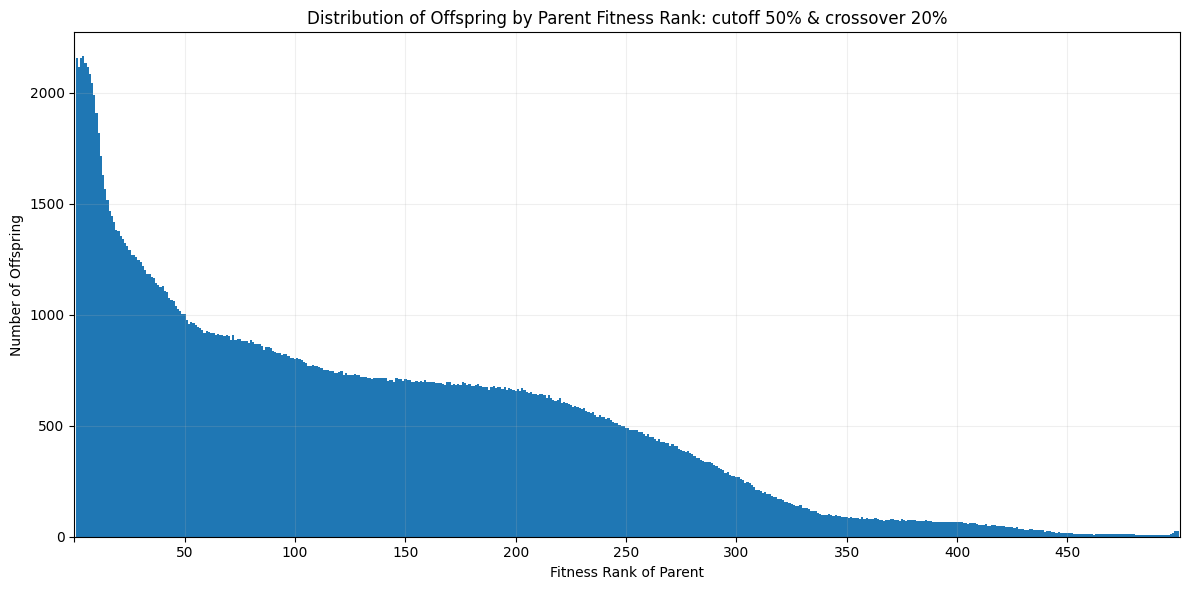

208


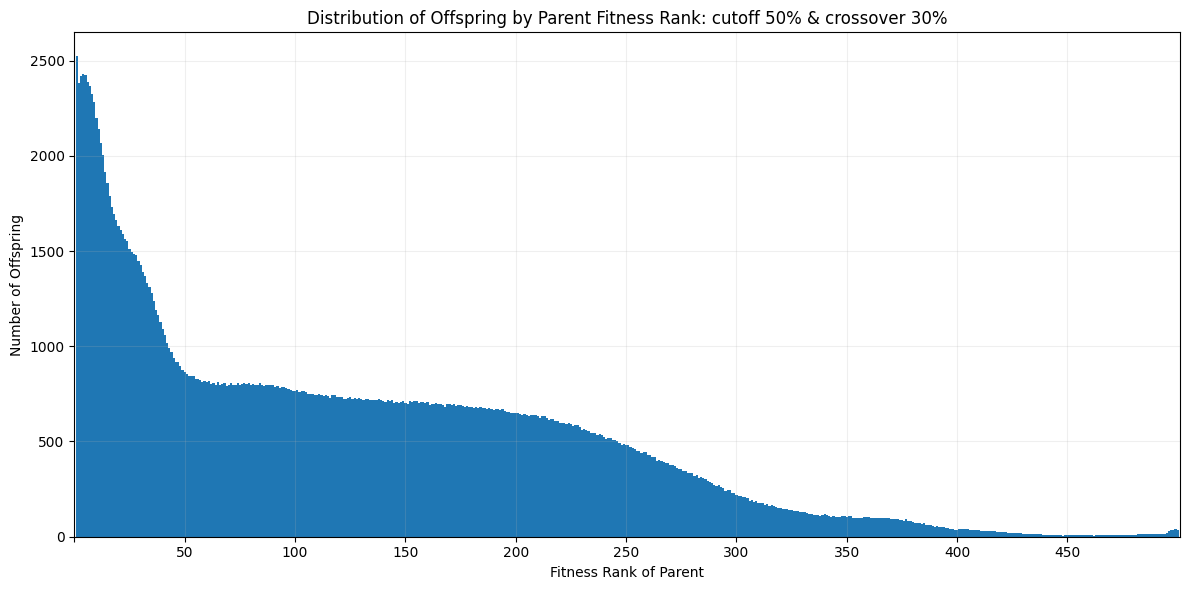

232


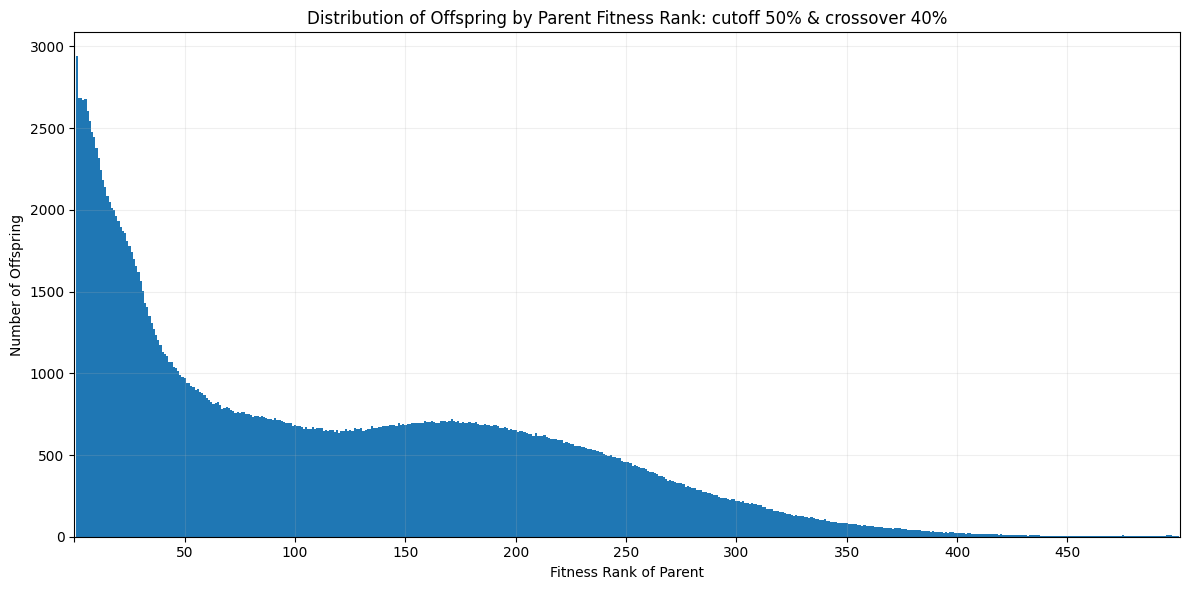

142


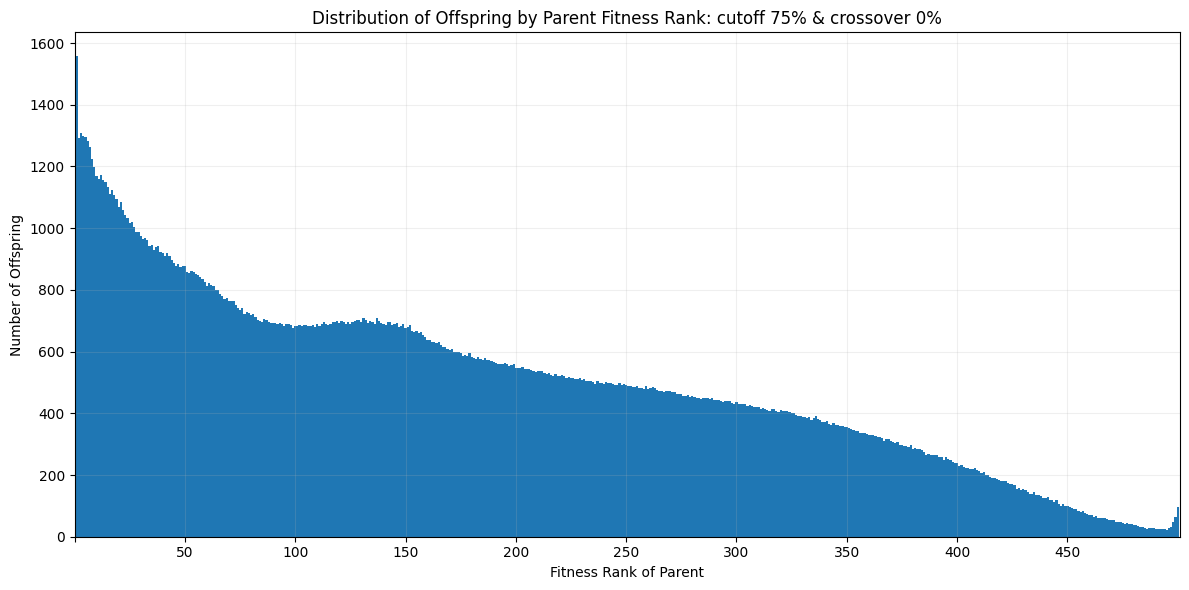

166


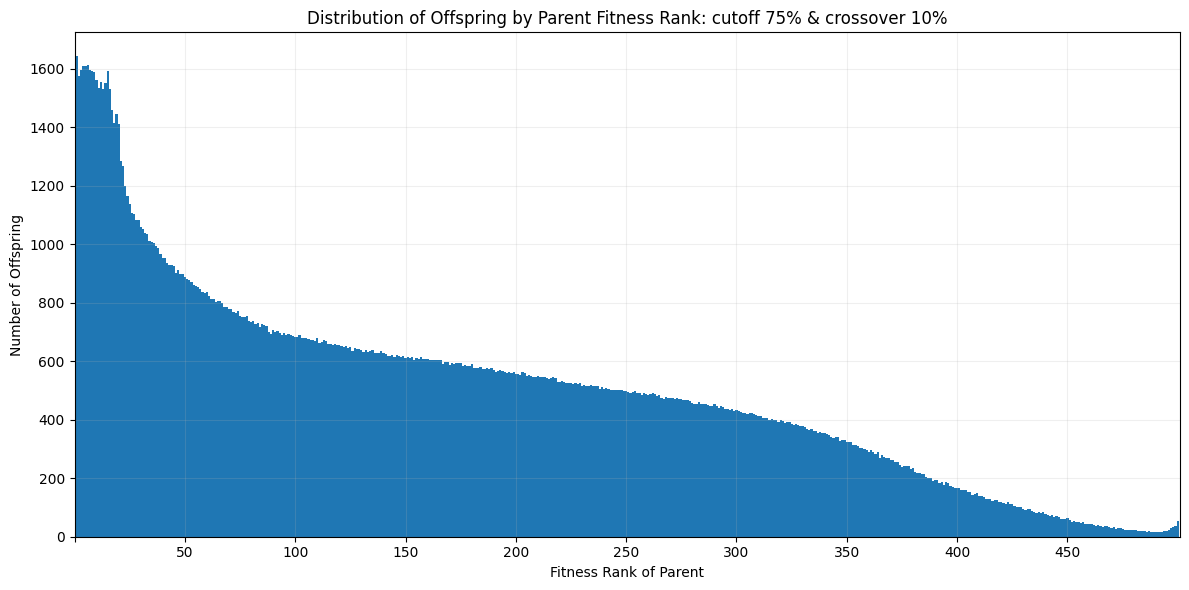

190


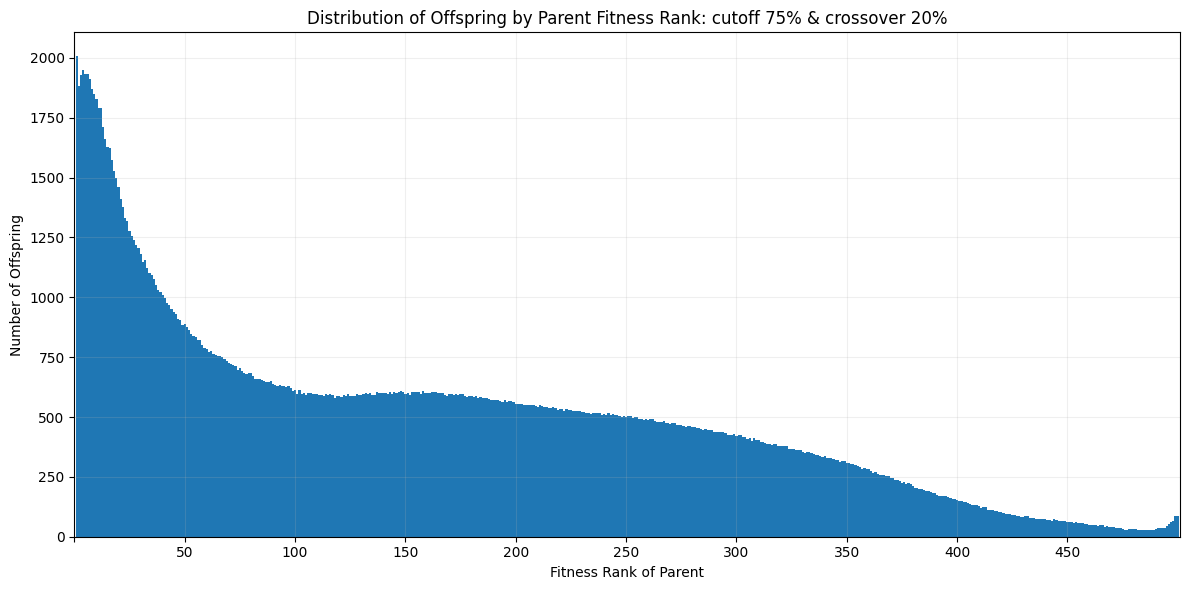

214


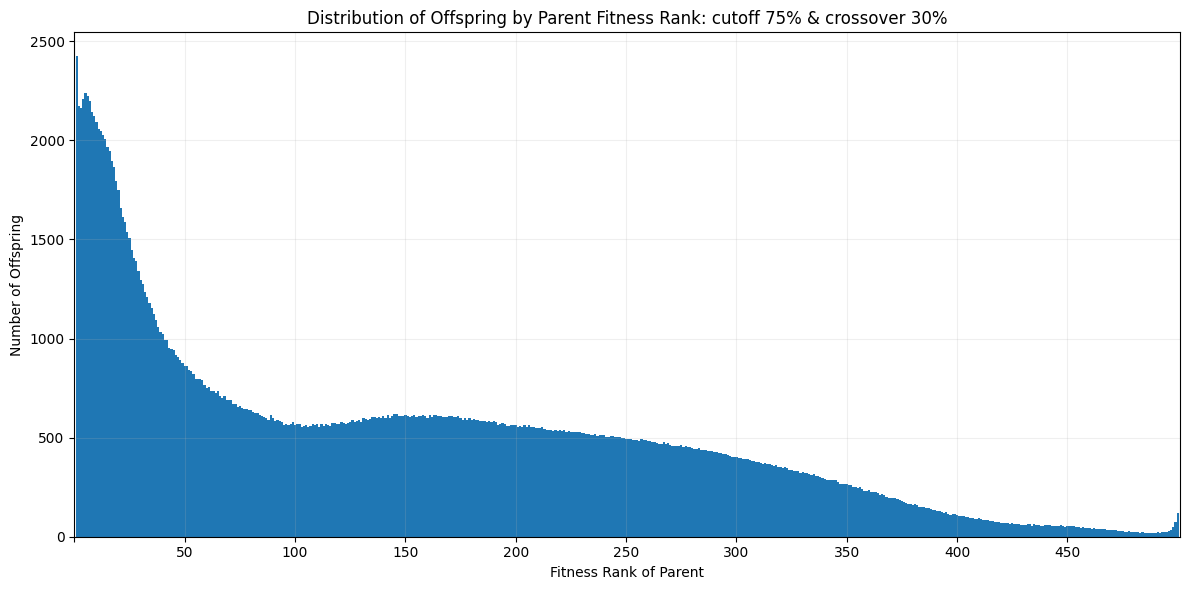

238


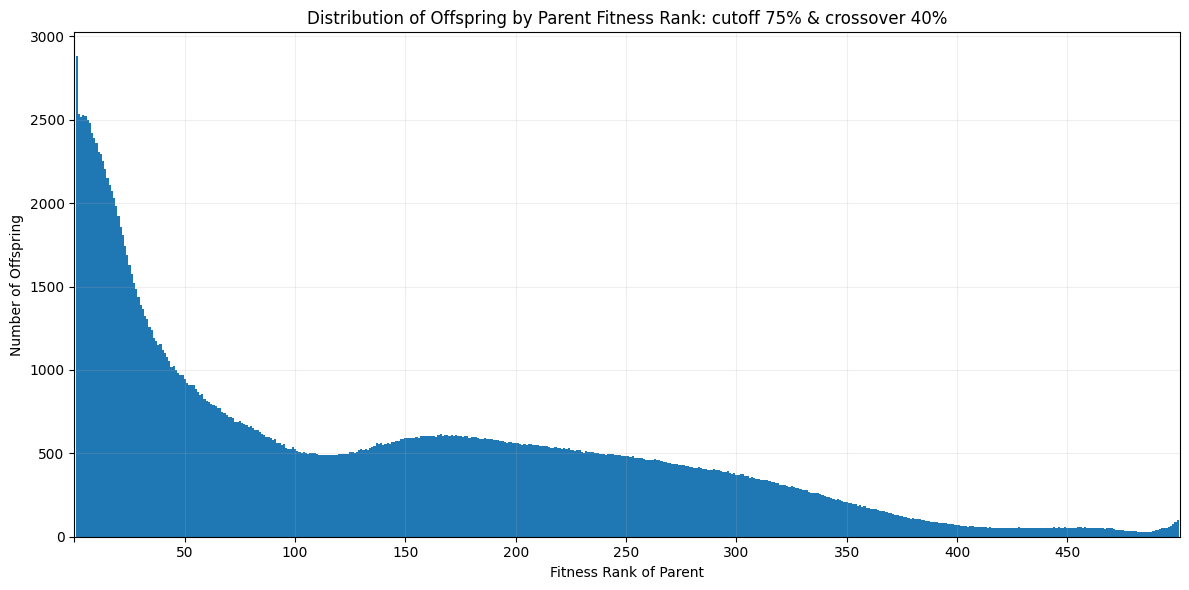

In [39]:
t = 'Distribution of Offspring by Parent Fitness Rank: '

hold_constant2 = {"species_boundary": 0.9, "species_component_pool_size": 5, "allowed_gens_no_improvement": 9999999}
s2 = {k: v | hold_constant2 for k, v in speciation_search2.items()}

for s_name, s_id in sorted(sa.search_setups(speciation_res, s2).items(), key= lambda x: x[0]):
    print(s_id[0])
    rs_data = speciation_res["setups"][s_id[0]]['spawn_rank_agg']
    sa.plot_offspring_distribution(rs_data, title=t+s_name)


 * increasing crossover leads to less pronounced fitness peaks, as the species mix and there are generally more fit genomes in the population, thus shifting the weight of the distribution to the left.

     *  crossover reinforces the left side of the distribution, there are more fit genomes spawned.

     These are often not the elite genomes in the population, it can be seen that the highest peak of the distribution is actually not on the left border of the plot with increasing crossover.

     *  when using a high cutoff, this left-side-reinforcement effect induced by crossover causes a new peak to rise.

     * This supports the idea that crossover is responsible for producing fitter genomes. This could just be an effect of tournament selection for crossover which is a higher selection pressure than the normal speciation spawn loop, in any case, it helps to produce fitter genomes.

 * Increasing the cutoff causes the different peaks between species to become more pronounced, as each species has more "less fit" individuals, including the best species.

     * however this time, it does not appear like the mean shifts left, just every species extends to the right

     * The effect of cutoff seems to be to extend the spawn distribution of each species, thus making them less "peaky" and more flat





 #### Extinction spawn plots

 holding boundary, component pool and crossover constant.

 Varying cutoff extinction and cutoff.

123


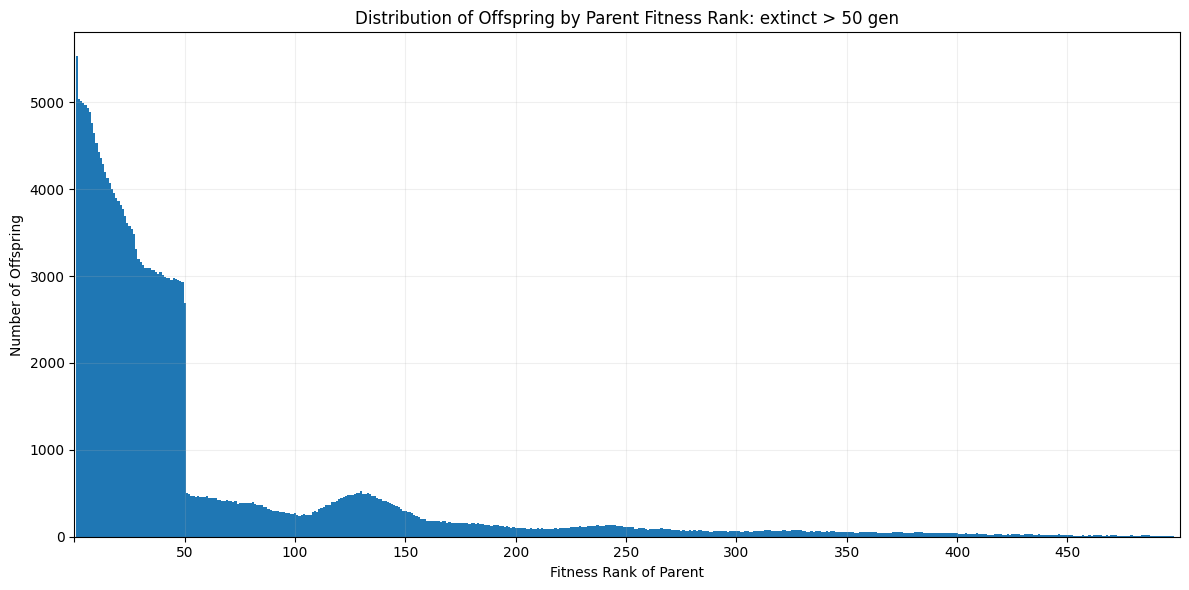

124


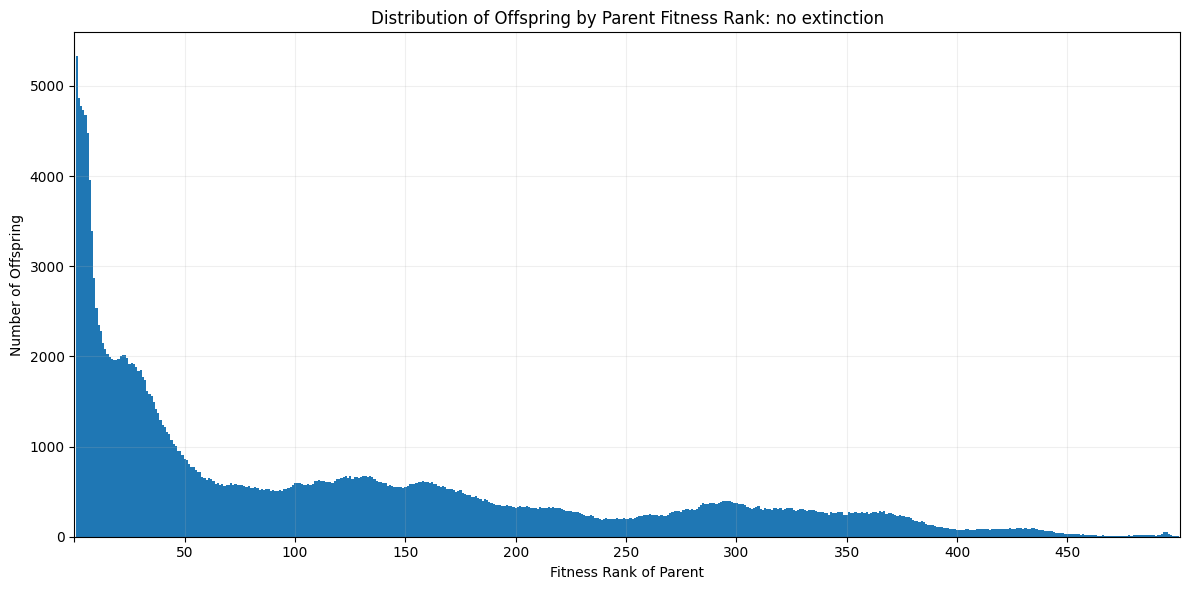

129


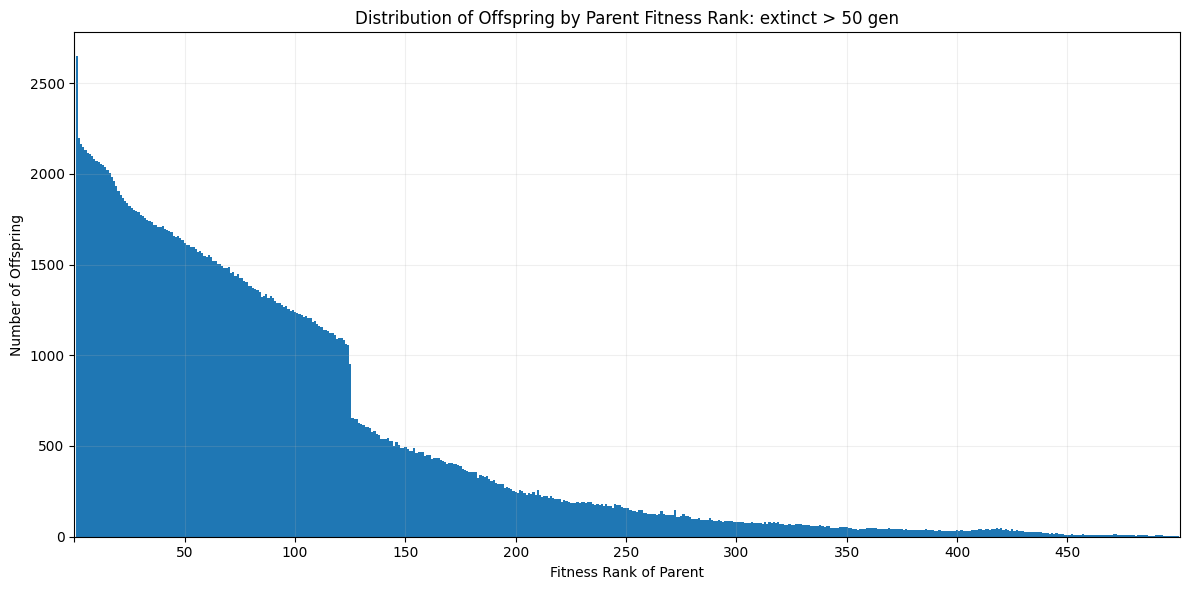

130


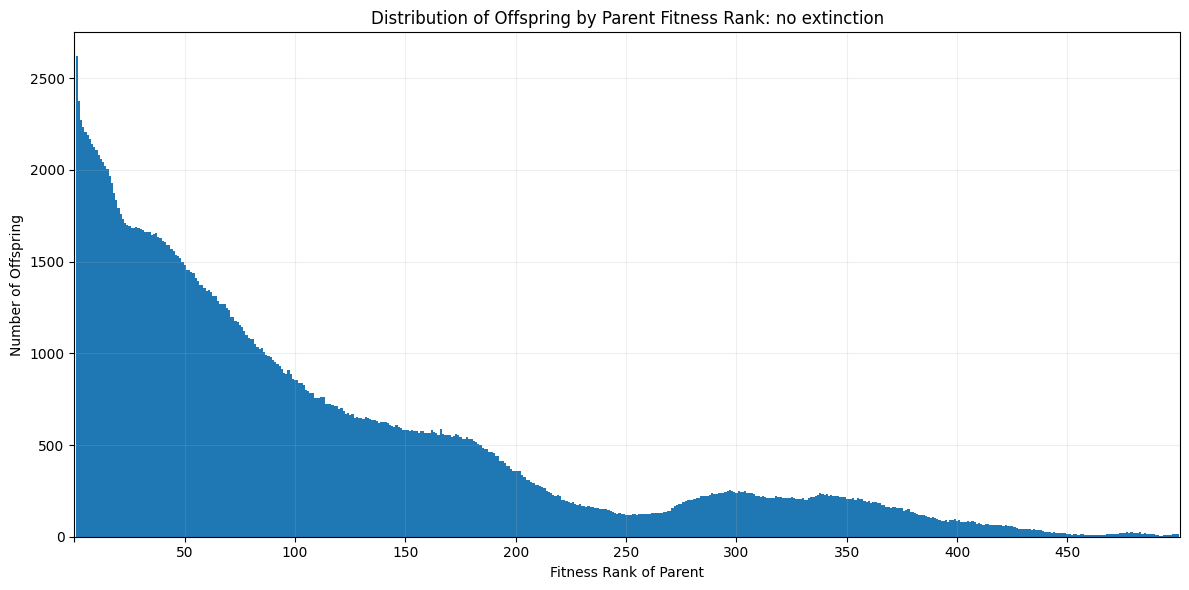

135


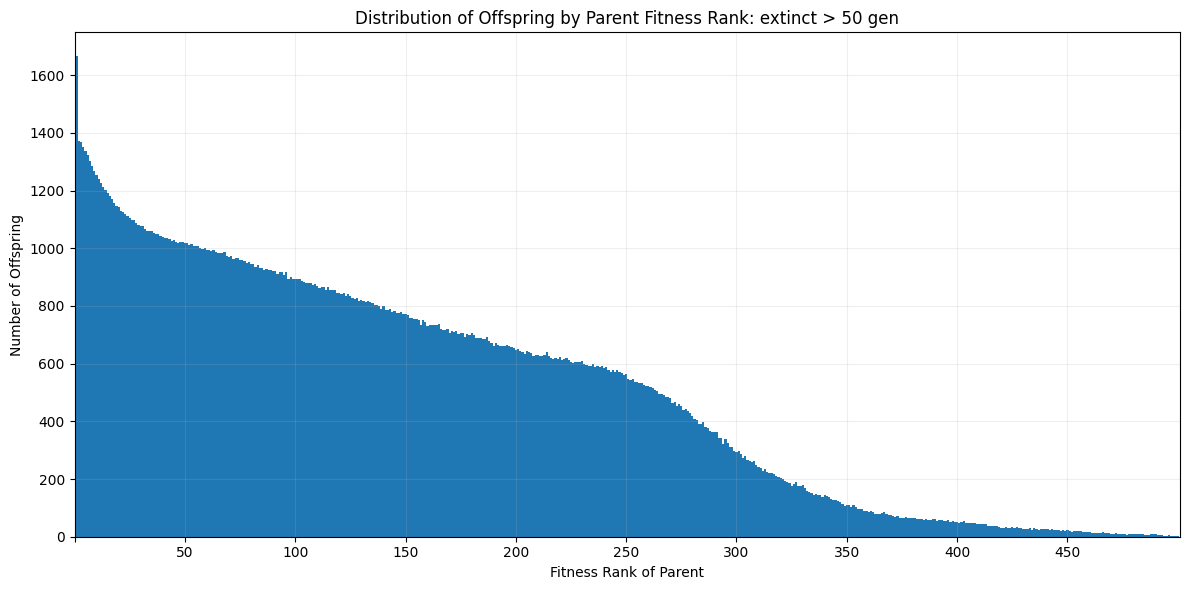

136


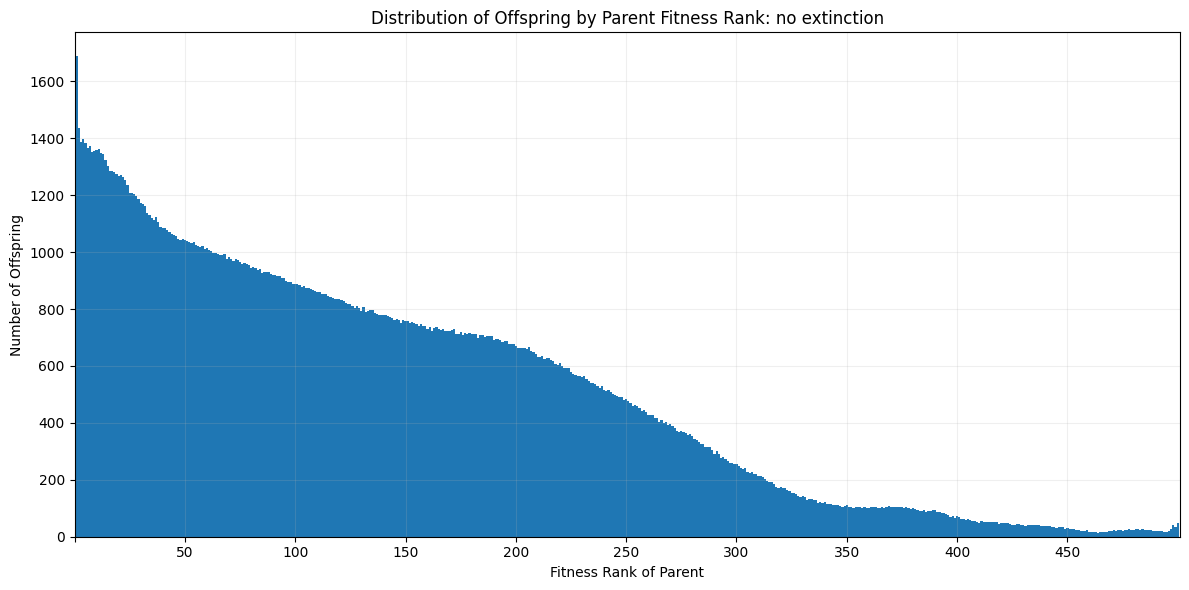

In [40]:
t = 'Distribution of Offspring by Parent Fitness Rank: '

for cu in [0.1, 0.25, 0.5]:
    hold_constant3 = {"species_boundary": 0.9, "pop_perc_crossover": 0.0, "spawn_cutoff": cu, "species_component_pool_size": 5}
    s3 = {k: v | hold_constant3 for k, v in speciation_search3.items()}

    for s_name, s_id in sorted(sa.search_setups(speciation_res, s3).items(), key= lambda x: x[0]):
        print(s_id[0])
        rs_data = speciation_res["setups"][s_id[0]]['spawn_rank_agg']
        sa.plot_offspring_distribution(rs_data, title=t+s_name)


 Extinction looks to have an effect similar to truncation in appearance.

 Compared to using no extinction, the left side of the distribution is heavier, meaning fitter genomes tend to produce more offspring.

 It is also chopped off, there is a visible cliff which is pushed further right with increasing cutoff until it stops being visible.



 I guess extinction has this effect because it kills off stale species, which has the effect of shifting the weight to the left, as unfit species become discarded.

 However after the optimum is reached, it starts killing off other fit species as well, which I think is the cause for the cliff.



 last I want to look at what the "optimum" setup 34 looks like

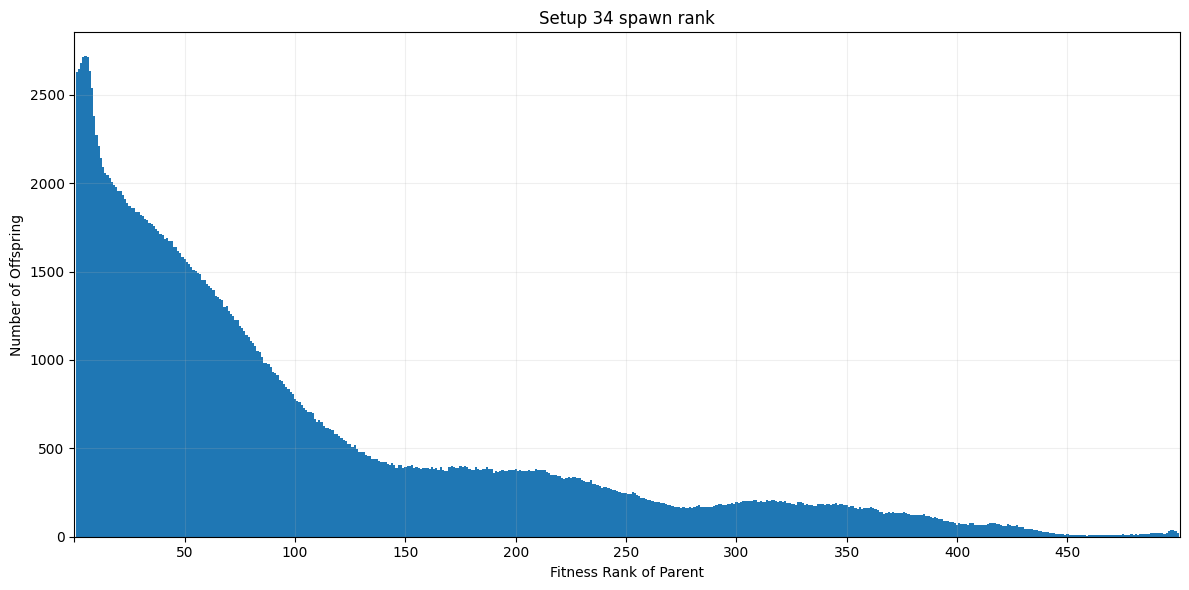

In [41]:
sa.plot_offspring_distribution(speciation_res["setups"][34]['spawn_rank_agg'], title="Setup 34 spawn rank")


okay, seems like a distribution where most of the weight is on the left side, but it is not as concentrated as some of the other extremes.



### Speciation selection summarized

**todo** continue writing here



**would be really interesting to measure similarity of species over time somehow**
Maybe this helps to explain why ridgeline plots indicate very similar species, do species become more similar over time? Is it due to crossover?

* ~~-> maybe use some vector similarity measure and do a lineplot where the horizontal middle of the plot is the mean vector in each generation and the y of each species represents the difference to that mean~~

For every generation, compare every k=2 combination of species for their shared components, aggregate the similarity scores and plot the mean over time
   * -> can plot fitness and num species compared to that
   * -> maybe the variance of that would be interesting as well

**speciation todos**

[ ] maybe some speciation plots, but honestly better to just move on to fitness func & mutation analysis
[ ] also compare different species fitnesses, look at fluctuation -> probably together with the stackplot



    - maybe just for the optimal setup according to convergence chart

 ## Comparing selection strategies

 Here I compare the three selection strategies using the best parameters I identified on 3 logs of increasing sizes.

 Each selection strategy was run 20 times.

 The logs are not very large, but increase in all size measures (num events, unique variants, activities).

 This is to test if the current best selection strategy (speciation) maintains its edge when scaling up the log.



 ### Selection strategy params

 #### Truncation selection

 * 10% crossover

 * 1% elites

 * 25% cutoff



 #### Roulette selection

 * 30% crossover

 * 5% elites



 #### Speciation selection

 * 10% crossover

 * 25% cutoff

 * 80% species boundary

 * 5 component pool size

 * inf gens allowed no improvement



 ### Used logs

 For both the medium and big log, I used the following PDC properties:

 * Dependent tasks: True

 * Loops: Simple

 * OR constructs: True

 * Routing constructs: False

 * Optional tasks: False

 * Duplicate tasks: False

 * Noise: False



 #### Small log

 The running example log

 * path `I:/EvolvePetriNets/pm_data/running_example.xes`

 * unique activities: 8

 * total events: 42

 * total variants: 6



 #### Medium log

 Log from the 2022 process discover contest (PDC).

 * path `I:/EvolvePetriNets/pm_data/pdc_logs/2022/Training Logs/pdc2022_1110000.xes`

 * unique activities: 16

 * total events: 6280

 * total variants: 95



 #### Big log

 Log from the 2024 process discover contest (PDC).

 * path `I:/EvolvePetriNets/pm_data/pdc_logs/2024/Training Logs/pdc2024_11100000.xes`

 * unique activities: 27

 * total events: 14529

 * total variants: 734

In [2]:
from importlib import reload # TODO: remove this later
import scripts.helper_scripts.setup_analysis as sa # helper module for fetching setup analysis
reload(sa)
# crawl the results data and load it into a dict
comparison_res = sa.exec_results_crawler("../analysis/data/selection_comparison", use_setup_num=False)


Processing setup directories: 0it [00:00, ?it/s]

Processing setup directories: 4it [00:14,  3.68s/it]


Saved aggregated results for roulette_big_log


Processing setup directories: 5it [00:27,  6.15s/it]


Saved aggregated results for roulette_medium_log


Processing setup directories: 6it [00:39,  7.77s/it]


Saved aggregated results for roulette_small_log


Processing setup directories: 7it [00:57, 10.62s/it]


Saved aggregated results for speciation_big_log


Processing setup directories: 8it [01:12, 11.70s/it]


Saved aggregated results for speciation_medium_log


Processing setup directories: 9it [01:23, 11.66s/it]


Saved aggregated results for speciation_small_log


Processing setup directories: 10it [01:37, 12.15s/it]


Saved aggregated results for truncation_big_log


Processing setup directories: 11it [01:49, 12.17s/it]


Saved aggregated results for truncation_medium_log


Processing setup directories: 12it [02:00, 10.06s/it]


Saved aggregated results for truncation_small_log


 This time I did not change any params except for the selection strategy, thus I won't do regression.



 ### Comparing fitness

 **TODO** the plots below should be boxplot

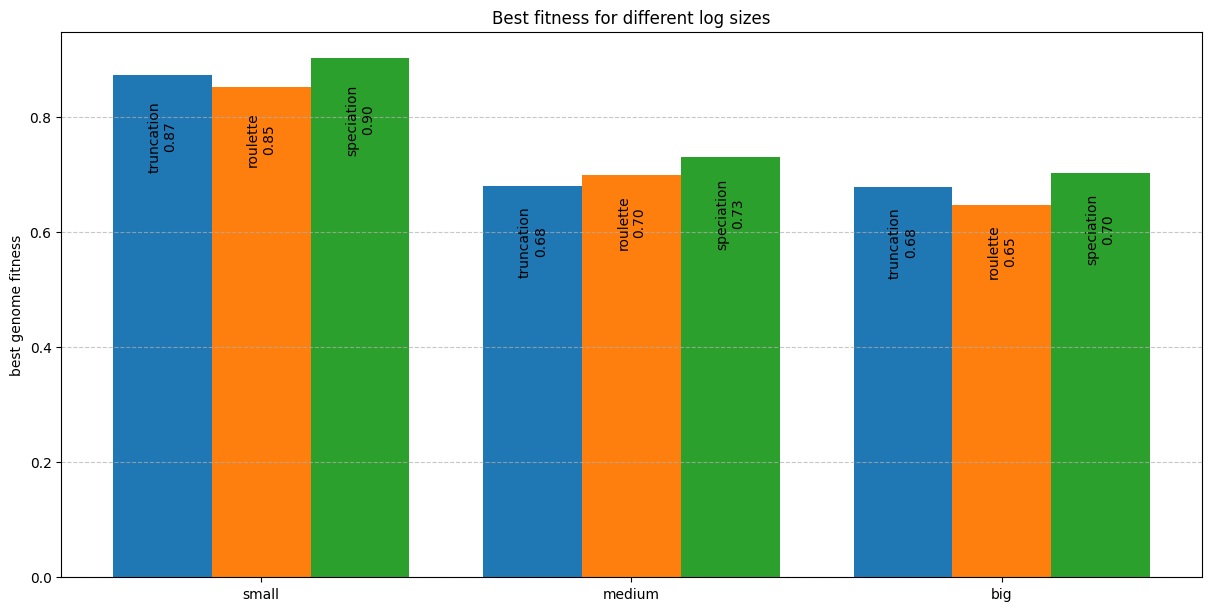

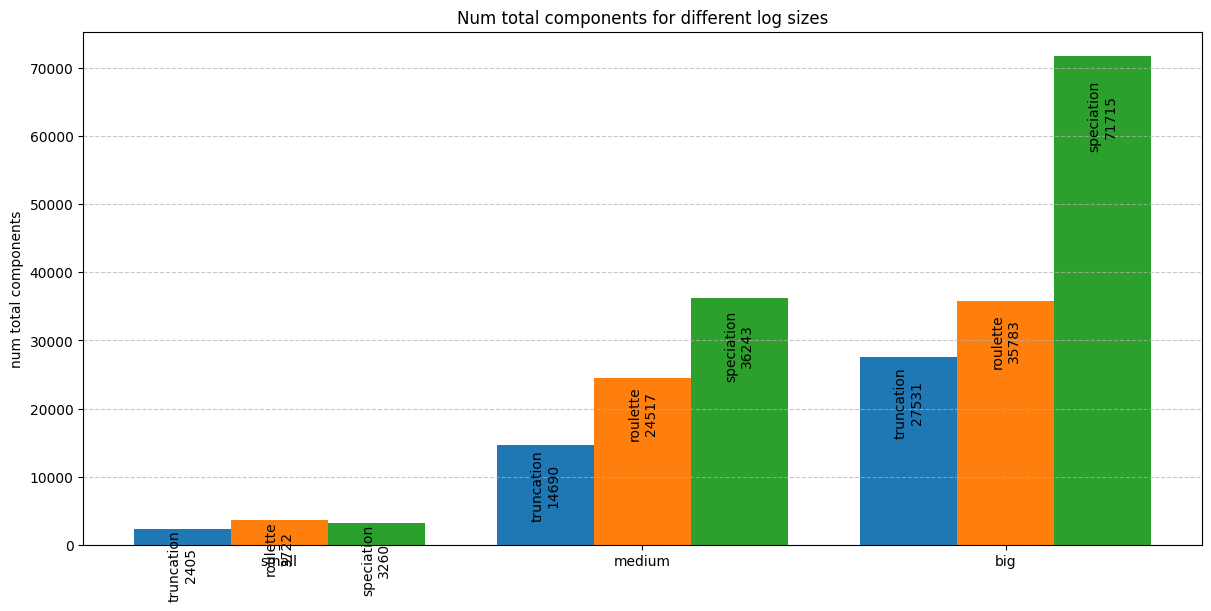

In [3]:
reload(sa)
comparison_search = {}
for k in comparison_res["setups"]:
    comparison_search[k.replace("_", " ")] = [k]

comparison_plt_layout = [
    ["truncation small log", "roulette small log", "speciation small log"],
    ["truncation medium log", "roulette medium log", "speciation medium log"],
    ["truncation big log", "roulette big log", "speciation big log"]
]

 
# strip_second_param = lambda l: l.split('&')[0].strip().split('\n')[0] # lambda to be applied on labels

comparison_data_sources = sa.search_and_aggregate_param_results(comparison_res, search_dict=dict(), search_res=comparison_search)
comparison_groups = ["small", "medium", "big"]
only_selec_strat = lambda l: l.split()[0] +"\n"+ l.split("\n")[1] # lambda to be applied on labels
_ = sa.generalized_barplot(comparison_plt_layout, comparison_data_sources, "best_genome_fitness", title="Best fitness for different log sizes", group_titles=comparison_groups, label_lambda=only_selec_strat)
only_selec_strat_strip_fp = lambda l: l.split()[0] +"\n"+ l.split("\n")[1].split(".")[0] # lambda to be applied on labels
_ = sa.generalized_barplot(comparison_plt_layout, comparison_data_sources, "num_total_components", title="Num total components for different log sizes", group_titles=comparison_groups, label_lambda=only_selec_strat_strip_fp)

# comparison_res["final_report"]


 speciation is still the best selection strat, with roulette and truncation trading places

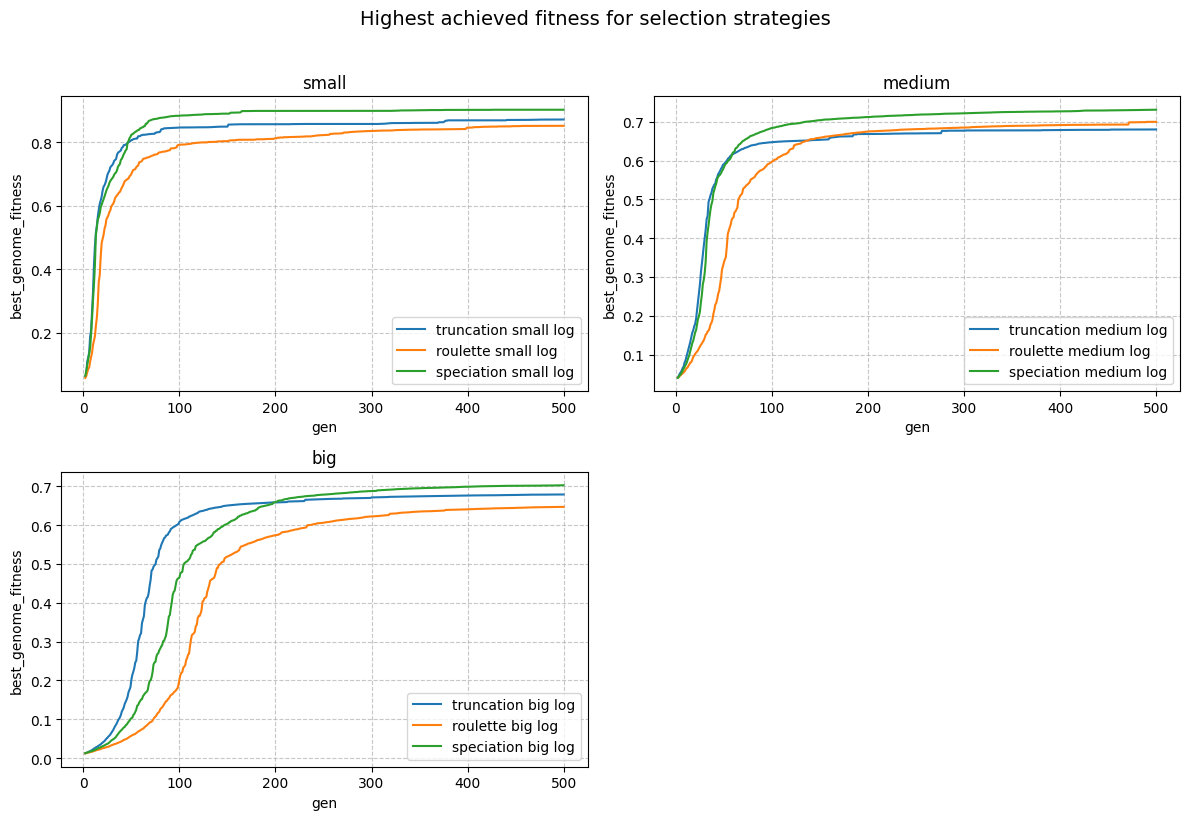

In [4]:
_ = sa.generalized_lineplot(comparison_plt_layout, comparison_data_sources, "best_genome_fitness", title="Highest achieved fitness for selection strategies", subplt_titles=comparison_groups)


speciation reaches the best fitness results about as quickly as truncation in all runs but the big log, but surpasses it in max fitness every time.

I also want to look at the variance of fitness over time.
This could also be an indicator if a selection strategy converges faster/makes a more greedy selection of high-fitness individuals (i.e. it takes bigger steps in fitness and sacrifices diversity).
A higher variance in the fitnesses of each generation could correspond to more diversity, because the algorithm also selects less fit individuals.
This is kinda similar to the information from the spawn rank plots.

I am also curious how the fitness variance evolves over time. will it increase and reduce at some point?

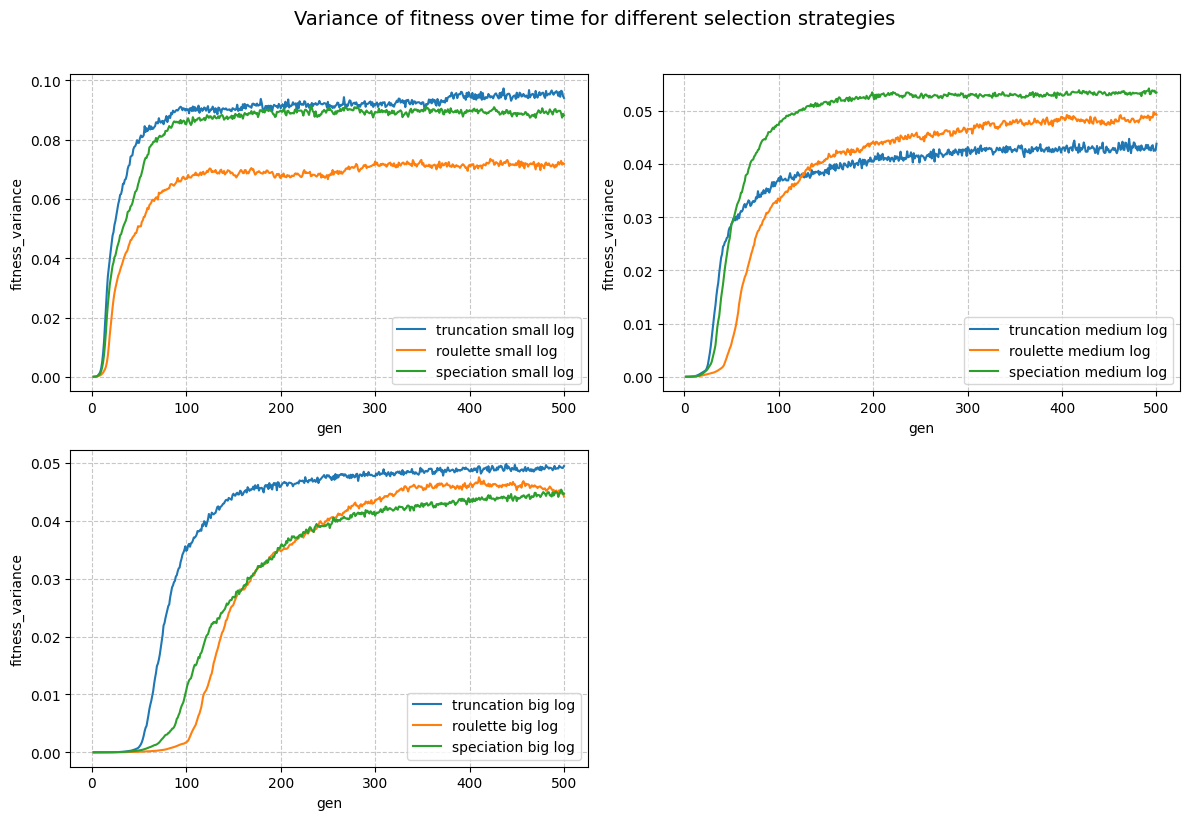

In [13]:
_ = sa.generalized_lineplot(comparison_plt_layout, comparison_data_sources, "fitness_variance", title="Variance of fitness over time for different selection strategies")

The variance of all selection strategies increases over time and does not decrease.
For all selection strategies this indicates that as time increases, the best genomes in the population become much better than the population average (which remains pretty low due to negative effect of random mutations), thus increasing the variance.
After the best fitness starts stagnating, the variance remains constant and does not decrease (which would be the case if the rest of the population aligns with the best solution).

relevant quote from melanie mitchell:
"""Typically, early in the search the fitness variance in the population is high and a small number of individuals are much fitter than the others. Under fitness−proportionate selection, they and their descendents will multiply quickly in the population, in effect preventing the GA from doing any further exploration. This is known as "premature convergence.""""

 ### Comparing total components

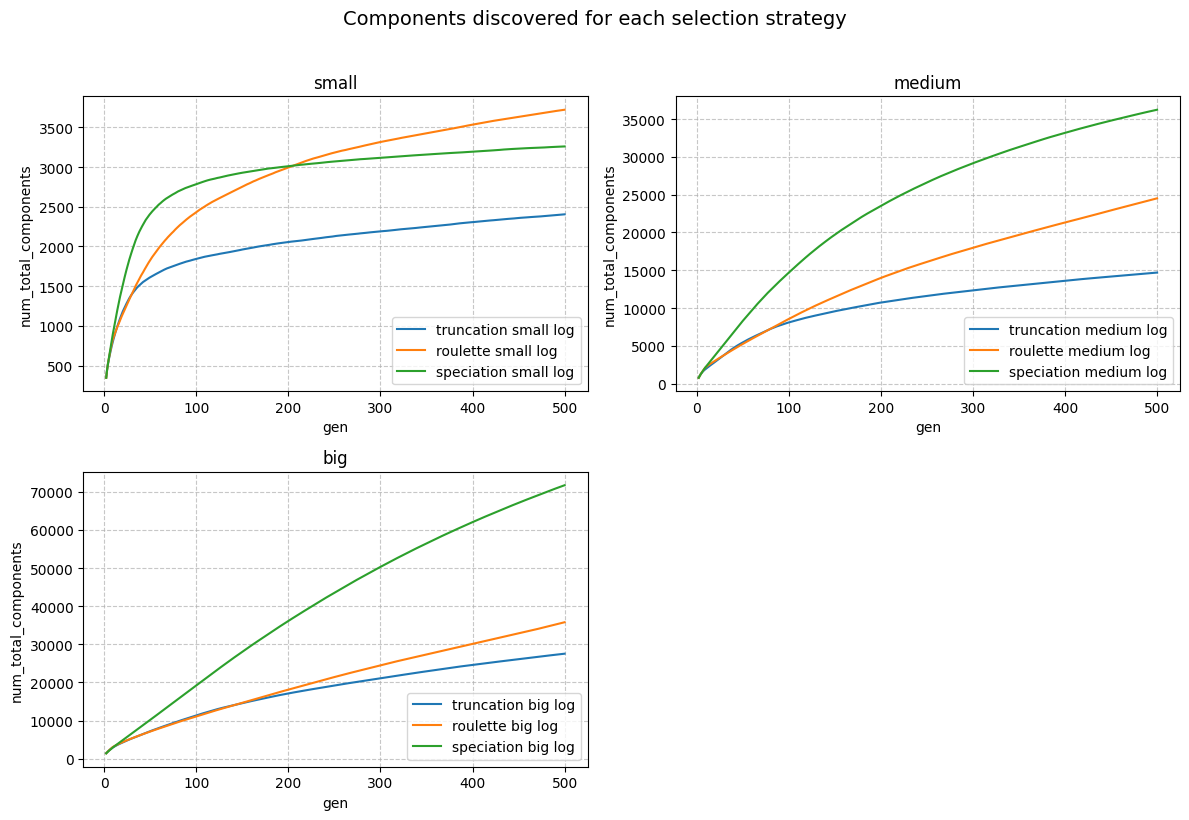

In [45]:
_ = sa.generalized_lineplot(comparison_plt_layout, comparison_data_sources, "num_total_components", title="Components discovered for each selection strategy", subplt_titles=comparison_groups)


 ### Comparing unique components

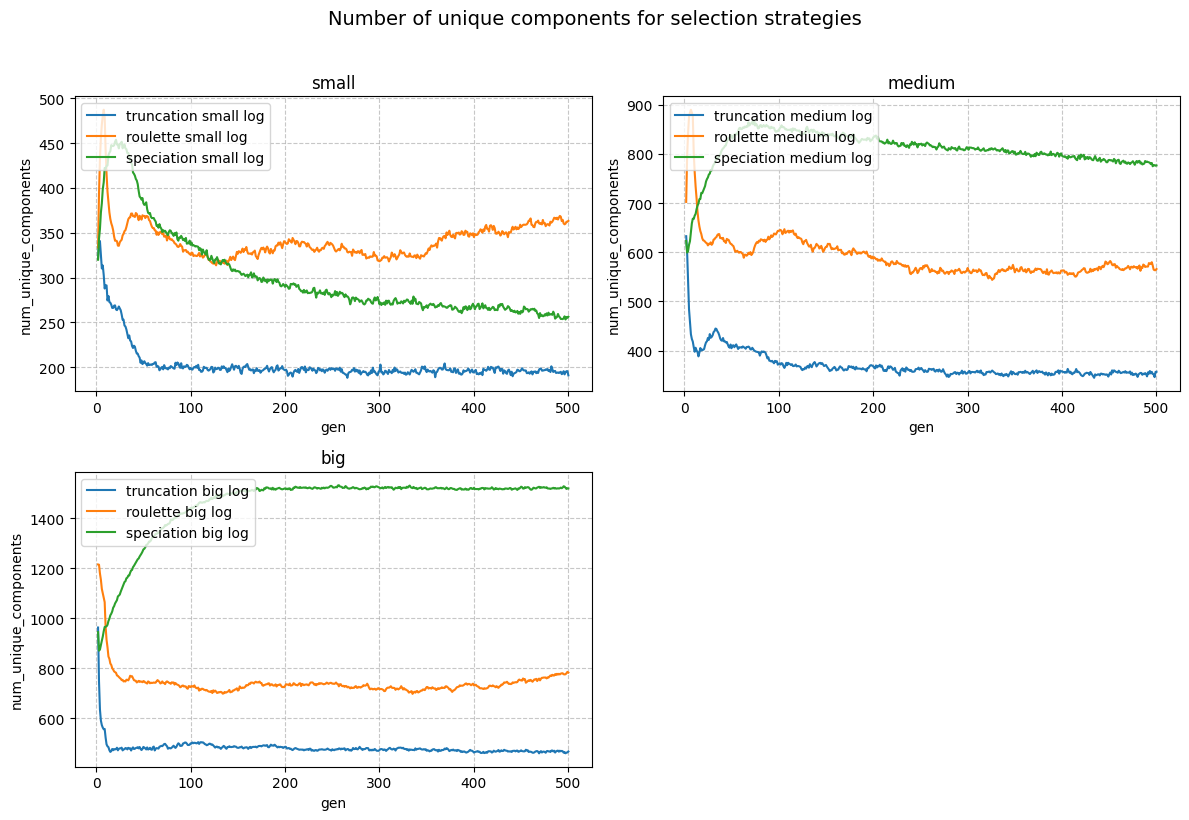

In [46]:
_ = sa.generalized_lineplot(comparison_plt_layout, comparison_data_sources, "num_unique_components", title="Number of unique components for selection strategies", subplt_titles=comparison_groups, legend_loc="upper left")


 # Scaling tests



 ## Scaling popsize

 How does performance change as popsize increases?



 ### Small log

 I tested this using speciation selection with the same parameters as used in the selection strat comparison.

 The test was conducted on the running example log, with a 10 runs of 1000 generations.



 **TODOs**

 * also look at time cost

 * scale up to mid size log

In [47]:
from importlib import reload # TODO: remove this later
import scripts.helper_scripts.setup_analysis as sa # helper module for fetching setup analysis
reload(sa)
# crawl the results data and load it into a dict
small_popsize_res = sa.exec_results_crawler("../analysis/data/popsize_small_log", use_setup_num=False)


Processing setup directories: 18it [00:00, 2763.45it/s]


Found cached results for 100
Successfully loaded cached results for 100

Found cached results for 1000
Successfully loaded cached results for 1000

Found cached results for 150
Successfully loaded cached results for 150

Found cached results for 200
Successfully loaded cached results for 200

Found cached results for 250
Successfully loaded cached results for 250

Found cached results for 300
Successfully loaded cached results for 300

Found cached results for 350
Successfully loaded cached results for 350

Found cached results for 400
Successfully loaded cached results for 400

Found cached results for 450
Successfully loaded cached results for 450

Found cached results for 50
Successfully loaded cached results for 50

Found cached results for 500
Successfully loaded cached results for 500

Found cached results for 600
Successfully loaded cached results for 600

Found cached results for 700
Successfully loaded cached results for 700

Found cached results for 800
Successfully loaded c

 #### comparing fitness curves

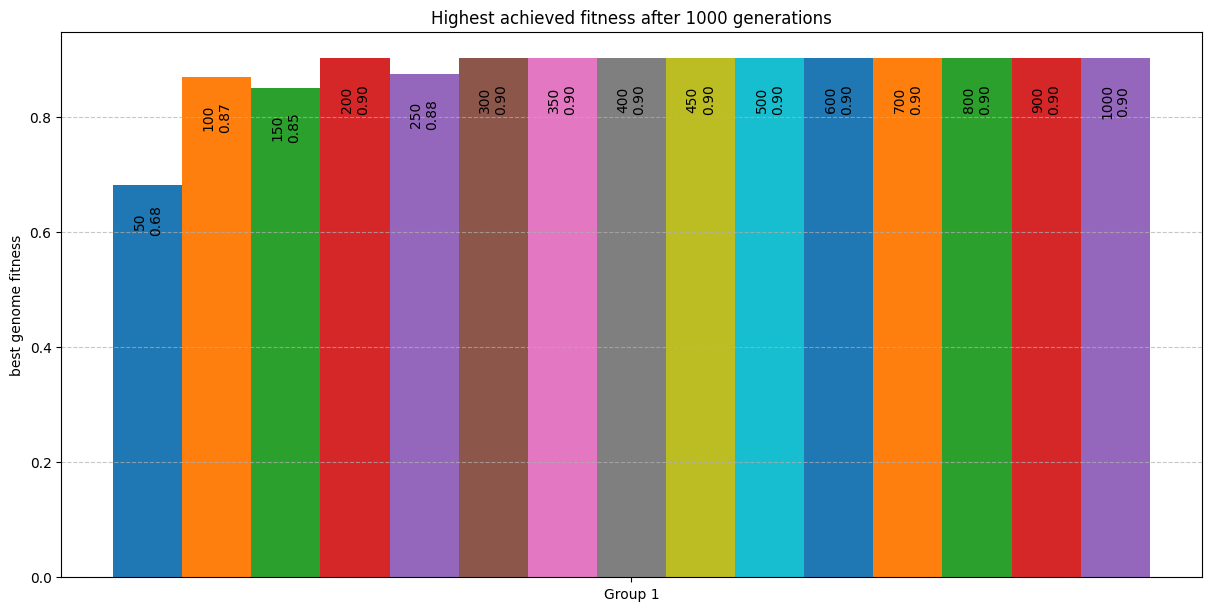

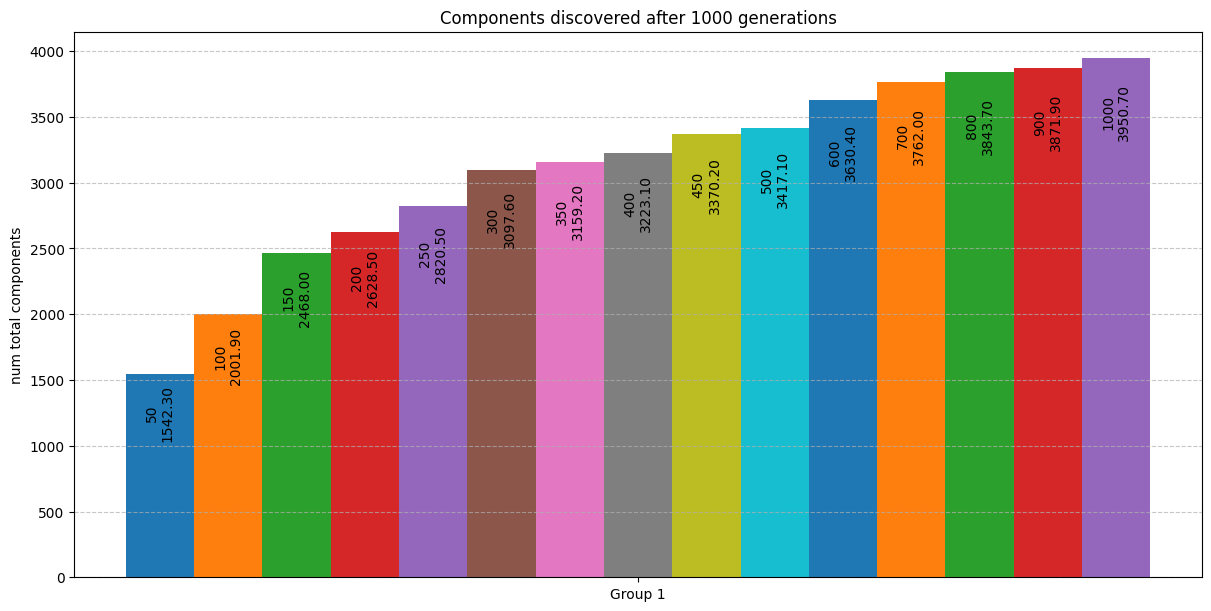

In [48]:
popsize_search = {
    "50":   {"popsize": 50}, "100":  {"popsize": 100}, "150":  {"popsize": 150},
    "200":  {"popsize": 200}, "250":  {"popsize": 250}, "300":  {"popsize": 300},
    "350":  {"popsize": 350}, "400":  {"popsize": 400}, "450":  {"popsize": 450},
    "500":  {"popsize": 500}, "600":  {"popsize": 600}, "700":  {"popsize": 700},
    "800":  {"popsize": 800}, "900":  {"popsize": 900}, "1000": {"popsize": 1000},
}


popsize_plt_layout = [[ "50", "100", "150", "200", "250", "300", "350", "400",
    "450", "500", "600", "700", "800", "900", "1000" ] ]

 
small_popsize_data_sources = sa.search_and_aggregate_param_results(small_popsize_res, popsize_search)
_ = sa.generalized_barplot(popsize_plt_layout, small_popsize_data_sources, "best_genome_fitness", title="Highest achieved fitness after 1000 generations")
_ = sa.generalized_barplot(popsize_plt_layout, small_popsize_data_sources, "num_total_components", title="Components discovered after 1000 generations")



 ### popsize - fitness

 First, lets look at the fitness progression when using the different crossover and fitness settings

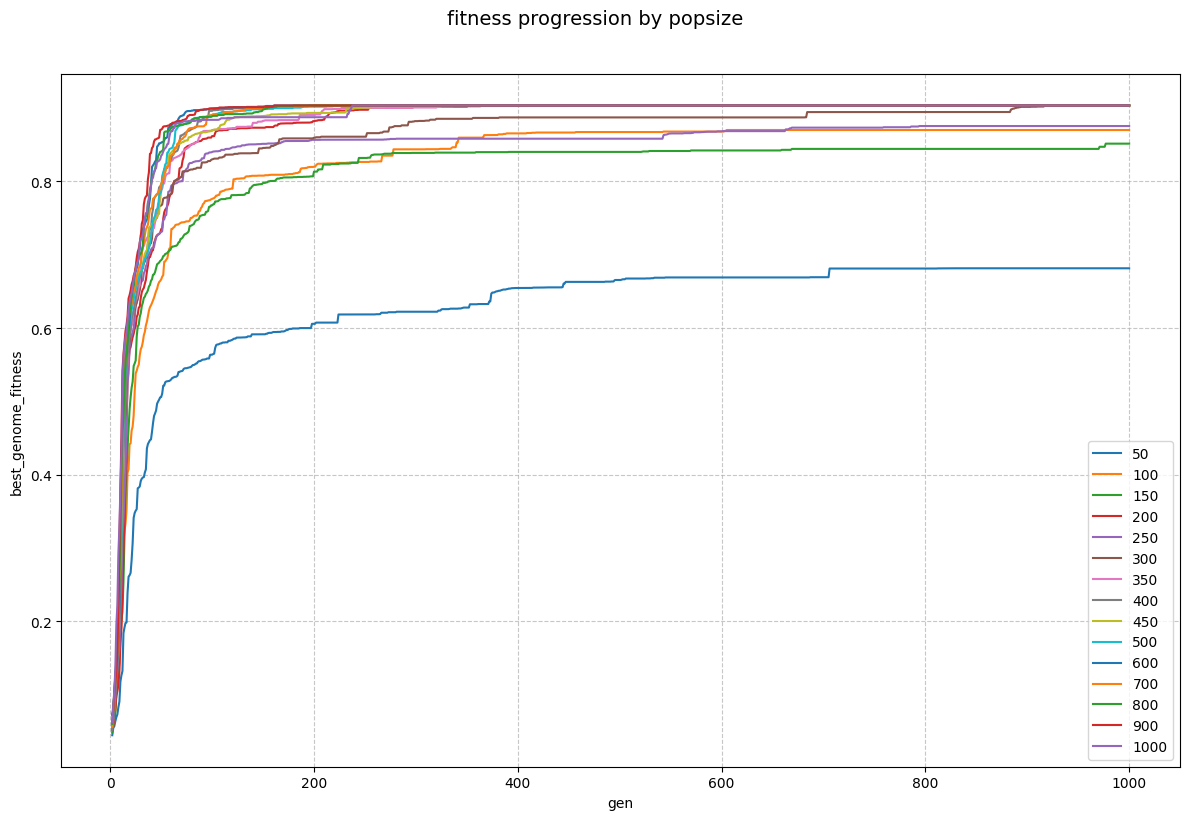

In [49]:
_ = sa.generalized_lineplot(popsize_plt_layout, small_popsize_data_sources, "best_genome_fitness", title="fitness progression by popsize")


 Actually great results, indicating that there is not much of a benefit going higher than 500 gens

 This also shows that you can't directly "bruteforce" better results by simply sampling with a larger population.

 Beyond a certain point, increasing the population size won't result in bigger fitness increases.

 This shows that the search is more sophisticated than just sampling every point in the search space, if that were the case, then there would be a bigger benefit to larger population sizes.

#### comparing gens until max fit
todo

filter each setup for the first generation that achieved that
* runs max fitness (also save that fitness)
* the overall max fitness for the running example log per my definition


### Big log (incomplete run)
This is too inefficient, I had to terminate early, only got 62 runs across a setups up to popsize 400. Num of runs is unevenly distributed across setups

Nonetheless, here is the same analysis for the medium log, 1000 generations per run

Also, I intended to run the medium log but accidentally ran the big log. No wonder it took so long LOL

In [3]:
from importlib import reload # TODO: remove this later
import scripts.helper_scripts.setup_analysis as sa # helper module for fetching setup analysis
reload(sa)
# crawl the results data and load it into a dict
big_popsize_res = sa.exec_results_crawler("../analysis/data/popsize_big_log", use_setup_num=False)

Processing setup directories: 11it [00:00, 1363.40it/s]


Found cached results for 100
Successfully loaded cached results for 100

Found cached results for 150
Successfully loaded cached results for 150

Found cached results for 200
Successfully loaded cached results for 200

Found cached results for 250
Successfully loaded cached results for 250

Found cached results for 300
Successfully loaded cached results for 300

Found cached results for 350
Successfully loaded cached results for 350

Found cached results for 400
Successfully loaded cached results for 400

Found cached results for 50
Successfully loaded cached results for 50


 #### comparing fitness curves

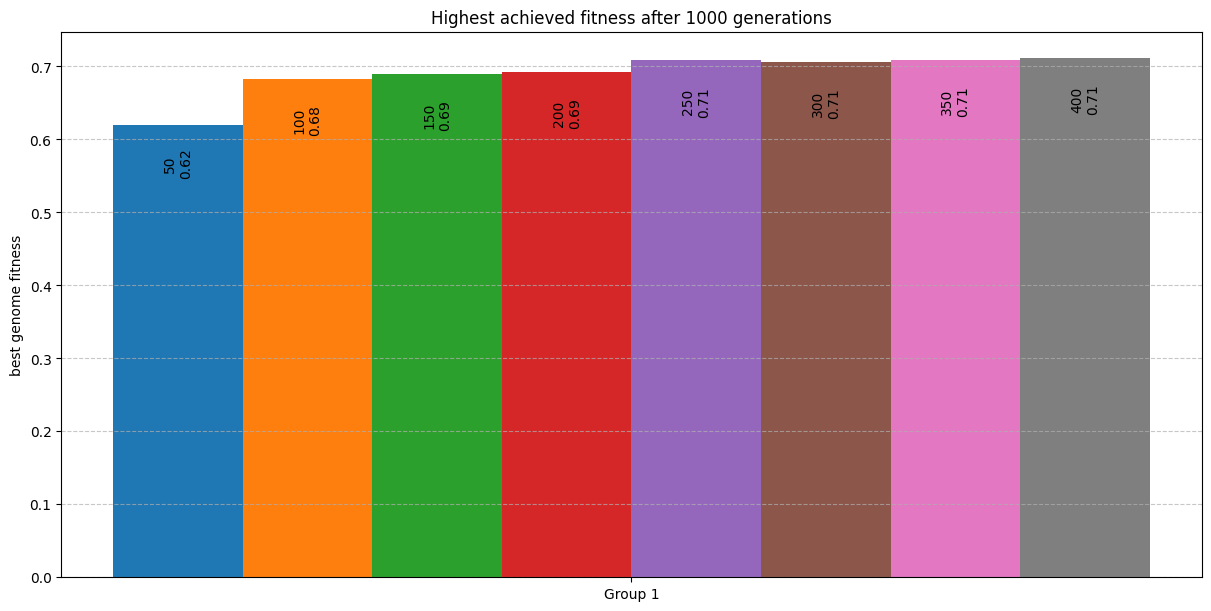

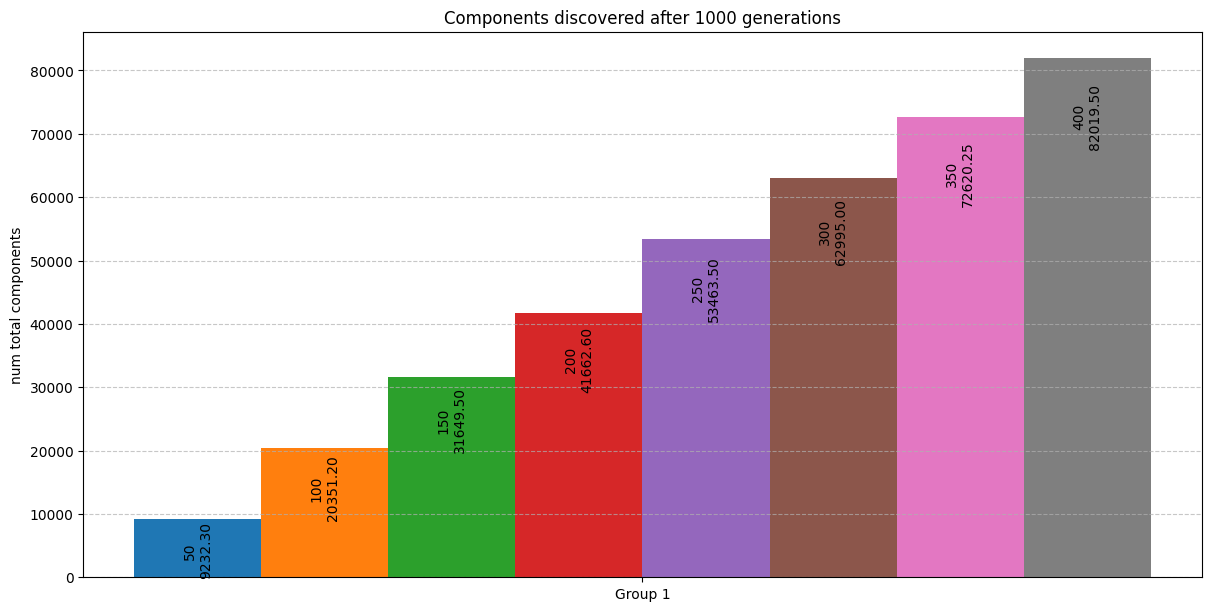

In [4]:
big_popsize_search = {
    "50":   {"popsize": 50}, "100":  {"popsize": 100}, "150":  {"popsize": 150},
    "200":  {"popsize": 200}, "250":  {"popsize": 250}, "300":  {"popsize": 300},
    "350":  {"popsize": 350}, "400":  {"popsize": 400}, "450":  {"popsize": 450},
}


big_popsize_plt_layout = [["50", "100", "150", "200", "250", "300", "350", "400"]]

 
big_popsize_data_sources = sa.search_and_aggregate_param_results(big_popsize_res, big_popsize_search)
_ = sa.generalized_barplot(big_popsize_plt_layout, big_popsize_data_sources, "best_genome_fitness", title="Highest achieved fitness after 1000 generations")
_ = sa.generalized_barplot(big_popsize_plt_layout, big_popsize_data_sources, "num_total_components", title="Components discovered after 1000 generations")



 ### popsize - fitness

 First, lets look at the fitness progression when using the different crossover and fitness settings

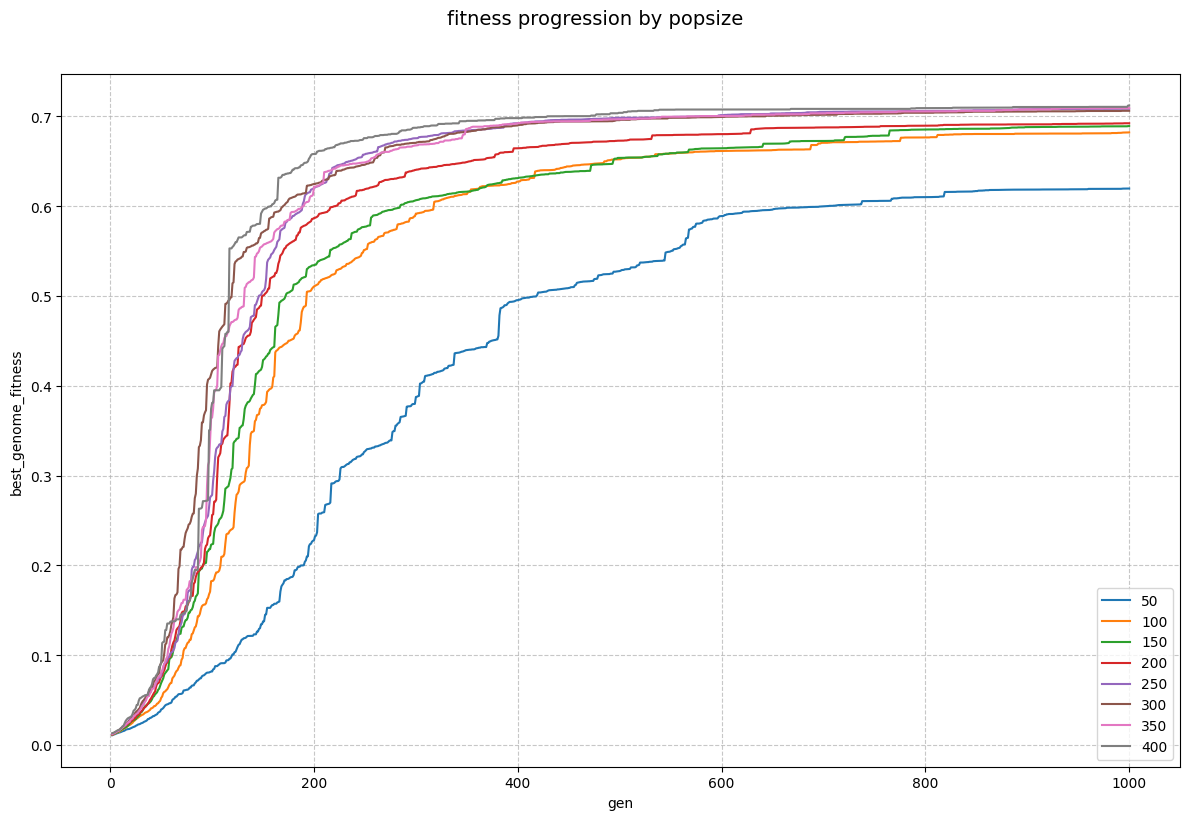

In [6]:
_ = sa.generalized_lineplot(big_popsize_plt_layout, big_popsize_data_sources, "best_genome_fitness", title="fitness progression by popsize")


Even though the data is incomplete, this is extremely reassuring :)
There seem to be similar diminishing returns to increasing the popsize, even though the searchspace is much larger this time.
Best of all, the diminishing returns do not start at much higher population sizes than in the tiny log! In fact, a popsize of 250 seems to yield quite good results

An interesting side observation is also that even though the results are aggregated, and in the case of the popsize 50 run (blue line) there are 10 runs, the aggregate fitness line still has steps.
The aggregate should normally smooth-over such steps, but maybe there are so many really steep steps in the the runs that they still show up a bit in the aggregate.
Would have to look at the individual runs with popsize 50 to see if there are crazy steps that lead to this.

# Mutation Analysis

## T-value distributions


Statistics for random:
Count of non-NA values: 594
Mean: -0.011
Std: 2.482
Min: -3.176
Max: 18.468

Statistics for guided:
Count of non-NA values: 596
Mean: -0.091
Std: 1.954
Min: -6.403
Max: 6.739

Statistics for random:
Count of non-NA values: 704
Mean: -0.614
Std: 1.991
Min: -4.040
Max: 13.840

Statistics for guided:
Count of non-NA values: 693
Mean: -0.592
Std: 1.895
Min: -5.246
Max: 13.863


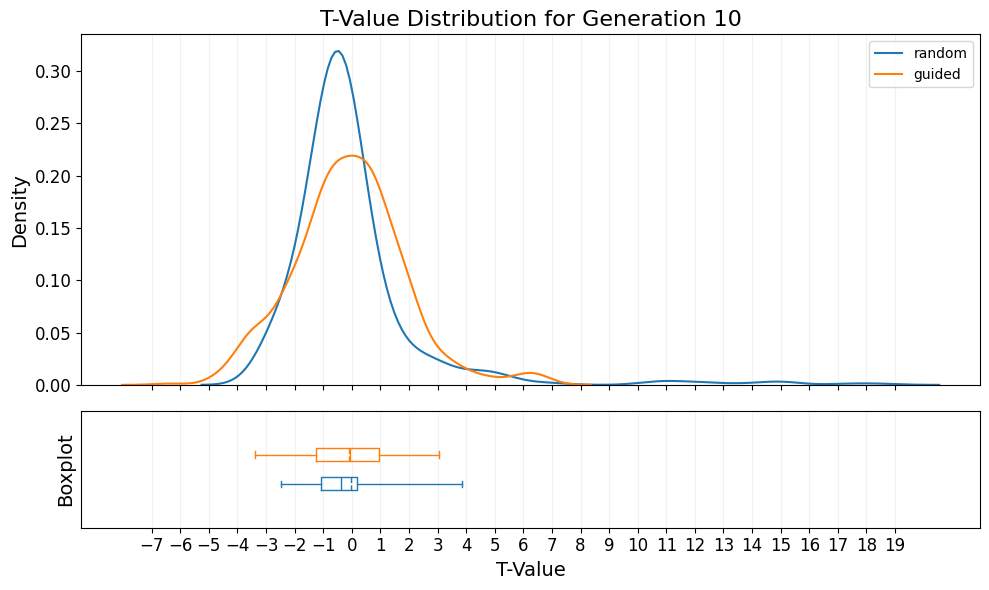

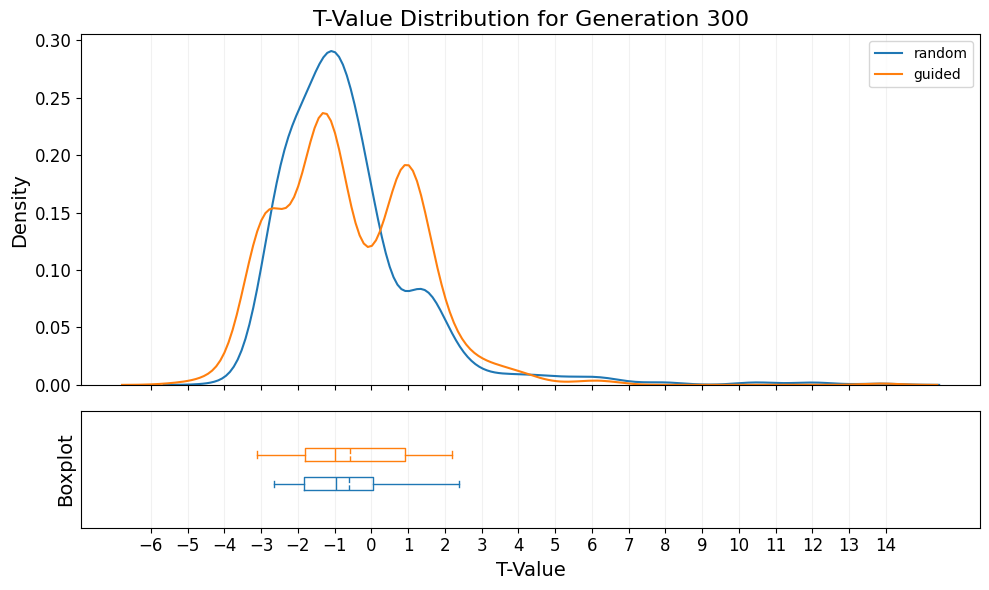

In [22]:
import scripts.helper_scripts.setup_analysis as sa
reload(sa)

fp_dict = {
    'random': "I:/EvolvePetriNets/analysis/data/comparing_t_value_distributions/midlog_no_t.pkl.gz",
    'guided': "I:/EvolvePetriNets/analysis/data/comparing_t_value_distributions/midlog_yes_t.pkl.gz"
}

mutation_t_vals_gen_10 = sa.plot_t_value_distributions(fp_dict, 10)
mutation_t_vals_gen_300 = sa.plot_t_value_distributions(fp_dict, 300)

mutation_t_vals_gen_10.savefig(analysis_plot_fp + "mutation_t_vals_gen_10.pdf")
mutation_t_vals_gen_300.savefig(analysis_plot_fp + "mutation_t_vals_gen_300.pdf")